# Question: Based on NPRI data, which industry is predicted to have the highest growth of releases in 2023? Which will have the largest decline?

Moyosore Akinola - makinola@norquest.ca

Gift Ajayi - gajayi@norquest.ca

Oluwaseun Ademokun - oademokun@norquest.ca

Chioma Ulom - culom@norquest.ca

UNDERSTANDING THE DATA

What is the NPRI?

NPRI (National Pollutant Release Inventory) is Canada's primary source of information on pollutants released to the environment, disposed of, or transferred for recycling. Managed by Environment and Climate Change Canada (ECCC), the NPRI tracks a wide range of substances that are considered harmful to human health or the environment. Industries that meet certain thresholds are required to report their releases, disposals, and transfers of pollutants annually.

The NPRI serves multiple purposes:
Environmental Protection: Helps monitor pollution and supports the development of policies to reduce environmental harm. Public Right-to-Know: Provides transparency on what pollutants are being emitted and by whom, enabling citizens and stakeholders to hold industries accountable. Tracking Progress: Allows the government to track trends in pollution and assess the effectiveness of environmental regulations and programs. Research and Decision-Making: Used by researchers, non-governmental organizations, and policymakers to inform decisions on environmental health.

DATA RELEVANCE
This dataset includes data reported to the NPRI by various industries over two decades (2000–2020). It provides details about pollutants released into air, water, and land, as well as waste disposal and transfers for recycling. This data is critical for understanding:

Industry-Specific Environmental Impact: By analyzing the releases and disposals, one can identify which industries (e.g., chemical manufacturing, mining, pulp mills) are responsible for the highest pollutant emissions and track their trends over time.

Geographic Distribution of Pollution: The data includes information on the locations of the facilities (e.g., city, province), which helps map pollution hotspots across Canada and see which regions are most affected.

Compliance and Regulatory Insight: The NPRI data helps track whether companies are complying with environmental regulations or if additional enforcement is needed to mitigate pollution in particular areas or industries.

Progress Toward Sustainability Goals: NPRI data allows organizations, including NGOs or government agencies, to evaluate if pollution is being reduced and whether sustainability goals are being met.

INSIGHTS FROM THE DATA
RUNDERSTANDING OF DATASET
1. RELEASES
Dataset contains releases of substances from year 2000 - 2022 from majorly from majorly 5 industries: Conventional oil and gas extraction, oil and gas extraction (except oil sands), fossil fuel electric power generation, chemical pulp mills and petroleum refineries
Substances comprise mostly of Particulate matter <= 2.5 Micrometers, Particulate matter <=10 Micrometers, Nitrogen oxides, Carbon monoxide, Volatile organic compounds.
Contains 737516 rows and 28 columns
Releases are from different provinces in Canada.
The units of these releases vary with tonnes, kg,g TEQ, grams

2. DISPOSALS AND TRANSFERS
Dataset contains releases of substances from year 2000 - 2022 from majorly from majorly 5 industries: Sewage treatment facilities, Conventional oil and gas extraction, Petroleum refineries, Waste disposal treatment and disposal, Chemical pulp mills.
Substances comprise mostly of Lead, Zinc, Manganese, Copper, Xylene
Contains 191645 rows and 41 columns.
Disposal are from different provinces in Canada.
The units of these disposals vary with tonnes, kg,g TEQ, grams

3. COMMENTS
Data contain information of data collected for releases, disposals and transfers between year 2000- 2022 pertaining majorly to these industries: Conventional Oil and Gas Extraction, Oil and gas extraction (except oil sands), Sewage treatment facilities, Conventional oil and gas extraction and Waste treatment and disposal
Comments are mostly about the Substances: Particulate Matter <= 2.5 Micrometers, Particulate Matter <= 10 Micrometers, Nitrogen oxides (expressed as nitrogen dioxide), Carbon monoxide and Lead (and its compounds)
Contains 363310 rows and 14 columns.

In summary, the NPRI data is crucial for environmental accountability, helping various stakeholders—from government agencies to advocacy groups—understand and act upon pollution data for improved environmental management across Canada.

##Issue Detection

**Missing Values:**

Several fields contain blanks especially in the 'releases' columns where the are over 95% missing values in some columns. This could hinder data analysis and interpretation.

**Inconsistent Units:** The units for substances are not standardized (e.g., some are in tonnes, others in kg). Consistency is essential for accurate aggregation and comparison.


**Invalid or Incomplete CAS Numbers:** Some CAS numbers are marked as "NA - xx," which indicates that they might be invalid or improperly formatted, potentially affecting data integrity.

**Sum of Releases to All Media:** The column "Sum of release to all media (<1tonne)" has several blanks. This could indicate that data was not aggregated or reported properly.

**Geographic Coordinates:** While latitude and longitude values are provided, there’s no indication of their accuracy or whether they have been verified. Inaccurate geographic data can lead to misinterpretation in spatial analysis.

**Estimation Method Clarity:**

The terms used for estimation methods (e.g., "M - Monitoring or Direct Measurement", "E - Emission Factor") need clearer definitions for consistency in understanding how releases are reported.

**Inconsistent Naming:** Some substance names are formatted differently (e.g., "Methanol" vs. "Methanol (and its salts)"), which could lead to difficulties in aggregating or comparing substances.

**Formatting Issues:** There may be formatting inconsistencies, such as varying decimal places in the release quantities, which could complicate data analysis.

# DATA EXPLORATION


Each sheet of the NPRI dataset saved into separate csv files and loaded into notebook to explore feature names, data types and shape

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA




In [2]:
# Load the dataset, specifying the encoding as 'latin-1'
df_releases = pd.read_csv('NPRI_Releases.csv',encoding='latin-1')
#Setting up notebook so that all columns are displayed
pd.set_option('display.max_columns', None)

# Preview the dataset
df_releases.head()


<ipython-input-2-4d93456941be>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_releases = pd.read_csv('NPRI_Releases.csv',encoding='latin-1')


Reporting_Year / Année  NPRI_ID / No_INRP Number of employees  \
0                    2000                  1                 440   
1                    2000                  1                 440   
2                    2000                  1                 440   
3                    2000                  1                 440   
4                    2000                  1                 440   

  Company_Name / Dénomination_sociale_de_l'entreprise  \
0             Alberta-Pacific Forest Industries Inc.    
1             Alberta-Pacific Forest Industries Inc.    
2             Alberta-Pacific Forest Industries Inc.    
3             Alberta-Pacific Forest Industries Inc.    
4             Alberta-Pacific Forest Industries Inc.    

  Facility_Name / Installation  NAICS / Code_SCIAN  \
0                      (blank)              322112   
1                      (blank)              322112   
2                      (blank)              322112   
3                      (blank)              322112   
4                      (blank)              322112   

  NAICS Title / Titre Code_SCIAN PROVINCE                 City   Latitude  \
0            Chemical pulp mills       AB  County of Athabasca  54.923116   
1            Chemical pulp mills       AB  County of Athabasca  54.923116   
2            Chemical pulp mills       AB  County of Athabasca  54.923116   
3            Chemical pulp mills       AB  County of Athabasca  54.923116   
4            Chemical pulp mills       AB  County of Athabasca  54.923116   

    Longitude CAS_Number / No_CAS  \
0 -112.861867          10049-04-4   
1 -112.861867             67-56-1   
2 -112.861867             67-66-3   
3 -112.861867             75-07-0   
4 -112.861867           7647-01-0   

  Substance Name (English) / Nom de substance (Anglais) Units / Unités  \
0                                   Chlorine dioxide            tonnes   
1                                           Methanol            tonnes   
2                                         Chloroform            tonnes   
3                                       Acetaldehyde            tonnes   
4                                  Hydrochloric acid            tonnes   

  Estimation_Method / Méthode_destimation  Release to Air - Fugitive  \
0     M - Monitoring or Direct Measurement                        NaN   
1                      E - Emission Factor                        NaN   
2     M - Monitoring or Direct Measurement                        NaN   
3                      E - Emission Factor                        NaN   
4     M - Monitoring or Direct Measurement                        NaN   

   Release to Air - Other Non-Point   Release to Air - Road dust    \
0                                NaN                           NaN   
1                                NaN                           NaN   
2                                NaN                           NaN   
3                                NaN                           NaN   
4                                NaN                           NaN   

   Release to Air - Spills   Release to Air - Stack / Point    \
0                       NaN                             5.200   
1                       NaN                           113.000   
2                       NaN                               NaN   
3                       NaN                             7.670   
4                       NaN                             0.665   

   Release to Air - Storage / Handling   Releases to Land - Leaks  \
0                                   NaN                       NaN   
1                                   NaN                       NaN   
2                                   NaN                       NaN   
3                                   NaN                       NaN   
4                                   NaN                       NaN   

   Releases to Land - Other   Releases to Land - Spills   \
0                        NaN                         NaN   
1        

In [3]:
#shape of dataset
df_releases.shape

(737516, 28)

In [4]:
#feature names
df_releases.columns

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_destimation',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point ',
       'Release to Air - Road dust  ', 'Release to Air - Spills ',
       'Release to Air - Stack / Point  ',
       'Release to Air - Storage / Handling ', 'Releases to Land - Leaks',
       'Releases to Land - Other ', 'Releases to Land - Spills ',
       'Releases to Water Bodies - Direct Discharges ',
       'Releases to Water Bodies - Leaks',
       'Releases to Water Bodies - Spills ',
       'Sum of release to all media (<1tonne)'],
      dtype='object')

In [5]:
#dataypes
df_releases.dtypes

Reporting_Year / Année                                     int64
NPRI_ID / No_INRP                                          int64
Number of employees                                       object
Company_Name / Dénomination_sociale_de_l'entreprise       object
Facility_Name / Installation                              object
NAICS / Code_SCIAN                                         int64
NAICS Title / Titre Code_SCIAN                            object
PROVINCE                                                  object
City                                                      object
Latitude                                                 float64
Longitude                                                float64
CAS_Number / No_CAS                                       object
Substance Name (English) / Nom de substance (Anglais)     object
Units / Unités                                            object
Estimation_Method / Méthode_destimation                  object
Release to Air - Fugitive                                float64
Release to Air - Other Non-Point                         float64
Release to Air - Road dust                               float64
Release to Air - Spills                                  float64
Release to Air - Stack / Point                           float64
Release to Air - Storage / Handling                      float64
Releases to Land - Leaks                                 float64
Releases to Land - Other                                 float64
Releases to Land - Spills                                float64
Releases to Water Bodies - Direct Discharges             float64
Releases to Water Bodies - Leaks                         float64
Releases to Water Bodies - Spills                        float64
Sum of release to all media (<1tonne)                    float64
dtype: object

In [6]:
df_releases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Reporting_Year / Année                                 737516 non-null  int64  
 1   NPRI_ID / No_INRP                                      737516 non-null  int64  
 2   Number of employees                                    736900 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise    737516 non-null  object 
 4   Facility_Name / Installation                           736340 non-null  object 
 5   NAICS / Code_SCIAN                                     737516 non-null  int64  
 6   NAICS Title / Titre Code_SCIAN                         737516 non-null  object 
 7   PROVINCE                                               737516 non-null  object 
 8   City                              

In [7]:
#Check for duplicates
print(f"Number of duplicate rows: {df_releases.duplicated().sum()}")  #Count duplicates

Number of duplicate rows: 0


In [8]:
# Summary statistics
df_releases.describe()

Reporting_Year / Année  NPRI_ID / No_INRP  NAICS / Code_SCIAN  \
count           737516.000000      737516.000000       737516.000000   
mean              2012.267601       11248.268386       289175.551820   
std                  6.400156        9352.868266        94788.542197   
min               2000.000000           1.000000       111120.000000   
25%               2007.000000        3775.000000       211113.000000   
50%               2012.000000        7114.000000       312140.000000   
75%               2018.000000       18093.000000       327120.000000   
max               2022.000000      306556.000000       913910.000000   

            Latitude      Longitude  Release to Air - Fugitive  \
count  733434.000000  733434.000000              125032.000000   
mean       49.644636     -97.375436                  61.156824   
std         5.155658      20.184399                 797.572502   
min         0.000000    -140.883600                   0.000000   
25%        45.431000    -114.767700                   0.051000   
50%        49.795100    -104.630100                   0.796000   
75%        53.508500     -79.540060                   7.582000   
max        82.498758       0.000000               58433.900000   

       Release to Air - Other Non-Point   Release to Air - Road dust    \
count                       30880.000000                  29861.000000   
mean                           91.455034                    117.236013   
std                          1628.905004                    856.012131   
min                             0.000000                      0.000000   
25%                             0.013000                      0.505400   
50%                             0.490000                      3.561900   
75%                             7.458500                     22.000000   
max                         91138.200000                  39992.961050   

       Release to Air - Spills   Release to Air - Stack / Point    \
count               9181.000000                     513282.000000   
mean                   1.742604                        144.203321   
std                   22.223163                       2014.861249   
min                    0.000000                          0.000000   
25%                    0.000000                          0.429000   
50%                    0.000300                          4.037595   
75%                    0.040000                         37.389000   
max                 1554.400000                     235907.000000   

       Release to Air - Storage / Handling   Releases to Land - Leaks  \
count                          80004.000000                910.000000   
mean                              23.462437                  0.356315   
std                              218.305058                  2.586239   
min                                0.000000                  0.000000   
25%                                0.015000                  0.000000   
50%                                0.358000                  0.000000   
75%                                3.953000                  0.000000   
max                            17883.110000                 39.058000   

       Releases to Land - Other   Releases to Land - Spills   \
count                5668.000000                 4470.000000   
mean                  515.614162                    5.090716   
std                  3181.280880                   93.378082   
min                     0.000000                    0.000000   
25%                     0.001000                    0.000000   
50%                     5.000000                    0.002000   
75%                    47.000000                    0.030000   
max                152270.000000                 4500.100000   

       Releases to Water Bodies - Direct Discharges   \
count                                   53188.000000   
mean                                       79.052084   
std                                       577.693253   
min            

In [9]:
#Check for missing values
missing_values = df_releases.isnull().sum()
missing_values[missing_values > 0] # Display columns with missing values

Number of employees                                 616
Facility_Name / Installation                       1176
City                                              90764
Latitude                                           4082
Longitude                                          4082
Release to Air - Fugitive                        612484
Release to Air - Other Non-Point                 706636
Release to Air - Road dust                       707655
Release to Air - Spills                          728335
Release to Air - Stack / Point                   224234
Release to Air - Storage / Handling              657512
Releases to Land - Leaks                         736606
Releases to Land - Other                         731848
Releases to Land - Spills                        733046
Releases to Water Bodies - Direct Discharges     684328
Releases to Water Bodies - Leaks                 736774
Releases to Water Bodies - Spills                734436
Sum of release to all media (<1tonne)            687331
dtype: int64

In [10]:
df_releases['Reporting_Year / Année'].value_counts().sort_index()

Reporting_Year / Année
2000     9285
2001    10751
2002    23867
2003    32605
2004    33508
2005    33324
2006    34413
2007    34302
2008    34023
2009    32495
2010    31292
2011    30845
2012    30062
2013    30646
2014    30801
2015    30197
2016    30123
2017    30315
2018    44553
2019    44180
2020    42047
2021    41198
2022    42684
Name: count, dtype: int64

In [11]:
df_releases['PROVINCE'].value_counts()

PROVINCE
AB    248830
ON    196937
QC     91065
BC     81635
SK     60245
MB     16215
NS     12661
NB     12272
NL      9495
NT      3681
NU      3106
PE      1092
YT       282
Name: count, dtype: int64

In [12]:
df_releases['Substance Name (English) / Nom de substance (Anglais)'].value_counts()

Substance Name (English) / Nom de substance (Anglais)
PM2.5 - Particulate Matter <= 2.5 Micrometers      88440
PM10 - Particulate Matter <= 10 Micrometers        83139
Nitrogen oxides (expressed as nitrogen dioxide)    73198
Carbon monoxide                                    60232
Volatile Organic Compounds (VOCs)                  58988
                                                   ...  
m-Cresol (and its salts)                               1
o-Cresol (and its salts)                               1
p-Nonylphenol polyethylene glycol ether                1
p-Cresol (and its salts)                               1
Potassium bromate                                      1
Name: count, Length: 261, dtype: int64

In [13]:
df_releases['Substance Name (English) / Nom de substance (Anglais)'].value_counts()

Substance Name (English) / Nom de substance (Anglais)
PM2.5 - Particulate Matter <= 2.5 Micrometers      88440
PM10 - Particulate Matter <= 10 Micrometers        83139
Nitrogen oxides (expressed as nitrogen dioxide)    73198
Carbon monoxide                                    60232
Volatile Organic Compounds (VOCs)                  58988
                                                   ...  
m-Cresol (and its salts)                               1
o-Cresol (and its salts)                               1
p-Nonylphenol polyethylene glycol ether                1
p-Cresol (and its salts)                               1
Potassium bromate                                      1
Name: count, Length: 261, dtype: int64

In [14]:
df_releases['Estimation_Method / Méthode_destimation'].value_counts()

Estimation_Method / Méthode_destimation
E2 - Published Emission Factors         374255
O - Engineering Estimates               148851
M3 - Source Testing                      79821
C - Mass Balance                         51845
E1 - Site Specific Emission Factors      37258
E - Emission Factor                      15709
M1 - Continuous Emission Monitoring      13433
M - Monitoring or Direct Measurement      7952
M2 - Predictive Emission Monitoring       4353
(blank)                                   3679
SP - Speciation profile                    262
NI - No Information Available               63
RQ - Remote Quantification                  33
NA - Not Applicable                          2
Name: count, dtype: int64

In [15]:
#Load the dataset, specifying the encoding as 'latin-1'
df_disposalsandtransfers = pd.read_csv('NPRI_Disposals and Transfers .csv', encoding='latin-1')

#Setting up notebook so that all columns are displayed
pd.set_option('display.max_columns', None)

# Preview the dataset
df_disposalsandtransfers.head()


<ipython-input-15-9268811b47dd>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_disposalsandtransfers = pd.read_csv('NPRI_Disposals and Transfers .csv', encoding='latin-1')


Reporting_Year / Année  NPRI_ID / No_INRP Number of employees  \
0                    2000                  1                 440   
1                    2000                  1                 440   
2                    2000                  4                 500   
3                    2000                  4                 500   
4                    2000                  4                 500   

  Company_Name / Dénomination_sociale_de_l'entreprise  \
0             Alberta-Pacific Forest Industries Inc.    
1             Alberta-Pacific Forest Industries Inc.    
2                           Pine Falls Paper Company    
3                           Pine Falls Paper Company    
4                           Pine Falls Paper Company    

  Facility_Name / Installation  NAICS / Code_SCIAN  \
0                      (blank)              322112   
1                      (blank)              322112   
2                   Pine Falls              322122   
3                   Pine Falls              322122   
4                   Pine Falls              322122   

  NAICS Title / Titre Code_SCIAN PROVINCE                 City   Latitude  \
0            Chemical pulp mills       AB  County of Athabasca  54.923116   
1            Chemical pulp mills       AB  County of Athabasca  54.923116   
2                Newsprint mills       MB           PINE FALLS  50.568600   
3                Newsprint mills       MB           PINE FALLS  50.568600   
4                Newsprint mills       MB           PINE FALLS  50.568600   

    Longitude CAS_Number / No_CAS  \
0 -112.861867             NA - 09   
1 -112.861867             NA - 14   
2  -96.226700             NA - 09   
3  -96.226700             NA - 10   
4  -96.226700             NA - 16   

  Substance Name (English) / Nom de substance (Anglais) Units / Unités  \
0                      Manganese (and its compounds)            tonnes   
1                           Zinc (and its compounds)            tonnes   
2                      Manganese (and its compounds)            tonnes   
3                        Mercury (and its compounds)                kg   
4                                    Ammonia (total)            tonnes   

  Estimation_Method / Méthode_destimation  \
0     M - Monitoring or Direct Measurement   
1     M - Monitoring or Direct Measurement   
2     M - Monitoring or Direct Measurement   
3     M - Monitoring or Direct Measurement   
4     M - Monitoring or Direct Measurement   

   Off-site Disposal - Land Treatment  Off-site Disposal - Landfill  \
0                                 NaN                           NaN   
1                                 NaN                           NaN   
2                                 NaN                           NaN   
3                                 NaN                           NaN   
4                                 NaN                           NaN   

   Off-site Disposal - Storage  Off-site Disposal - Tailings Management  \
0                          NaN                                      NaN   
1                          NaN                                      NaN   
2                          NaN                                      NaN   
3                          NaN                                      NaN   
4                          NaN                                      NaN   

   Off-site Disposal - Underground Injection  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Off-site Disposal - Waste Rock management  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Off-site Transfers for Recycling - Energy Recovery  \
0    

In [16]:
df_disposalsandtransfers.shape

(191645, 41)

In [17]:
df_disposalsandtransfers.columns

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_destimation',
       'Off-site Disposal - Land Treatment', 'Off-site Disposal - Landfill',
       'Off-site Disposal - Storage',
       'Off-site Disposal - Tailings Management',
       'Off-site Disposal - Underground Injection',
       'Off-site Disposal - Waste Rock management',
       'Off-site Transfers for Recycling - Energy Recovery',
       'Off-site Transfers for Recycling - Other',
       'Off-site Transfers for Recycling - Recovery of Acids and Bases',
       'Off-site Transfers for Recycling - Recovery of Catalysts',
       'Off-site Transfers for

In [18]:
df_disposalsandtransfers.dtypes

Reporting_Year / Année                                                                           int64
NPRI_ID / No_INRP                                                                                int64
Number of employees                                                                             object
Company_Name / Dénomination_sociale_de_l'entreprise                                             object
Facility_Name / Installation                                                                    object
NAICS / Code_SCIAN                                                                               int64
NAICS Title / Titre Code_SCIAN                                                                  object
PROVINCE                                                                                        object
City                                                                                            object
Latitude                                                                                       float64
Longitude                                                                                      float64
CAS_Number / No_CAS                                                                             object
Substance Name (English) / Nom de substance (Anglais)                                           object
Units / Unités                                                                                  object
Estimation_Method / Méthode_destimation                                                        object
Off-site Disposal - Land Treatment                                                             float64
Off-site Disposal - Landfill                                                                   float64
Off-site Disposal - Storage                                                                    float64
Off-site Disposal - Tailings Management                                                        float64
Off-site Disposal - Underground Injection                                                      float64
Off-site Disposal - Waste Rock management                                                      float64
Off-site Transfers for Recycling - Energy Recovery                                             float64
Off-site Transfers for Recycling - Other                                                       float64
Off-site Transfers for Recycling - Recovery of Acids and Bases                                 float64
Off-site Transfers for Recycling - Recovery of Catalysts                                       float64
Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)                float64
Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds                      float64
Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)               float64
Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues                    float64
Off-site Transfers for Recycling - Recovery of Solvents                                        float64
Off-site Transfers for Recycling - Refining or Re-use of Used Oil                              float64
Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment                float64
Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment                  float64
Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal              float64
Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant    float64
Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment                  float64
On-site Disposal - Land Treatment                                                              float64
On-site Disposal - Landfill                                                                    float64
On-site Disposal - Tailings Management                                                

In [19]:
df_disposalsandtransfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191645 entries, 0 to 191644
Data columns (total 41 columns):
 #   Column                                                                                       Non-Null Count   Dtype  
---  ------                                                                                       --------------   -----  
 0   Reporting_Year / Année                                                                       191645 non-null  int64  
 1   NPRI_ID / No_INRP                                                                            191645 non-null  int64  
 2   Number of employees                                                                          191551 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise                                          191645 non-null  object 
 4   Facility_Name / Installation                                                                 191019 non-null  object 
 5   NAICS / Code_SCIAN     

In [20]:
#Check for duplicates
print(f"Number of duplicate rows: {df_disposalsandtransfers.duplicated().sum()}")  #Count duplicates

Number of duplicate rows: 0


In [21]:
# Summary statistics
print(df_disposalsandtransfers.describe(include='all'))

        Reporting_Year / Année  NPRI_ID / No_INRP  Number of employees  \
count            191645.000000      191645.000000             191551.0   
unique                     NaN                NaN               2379.0   
top                        NaN                NaN                 20.0   
freq                       NaN                NaN               2576.0   
mean               2011.289958        6494.859626                  NaN   
std                   6.513027        6824.137165                  NaN   
min                2000.000000           1.000000                  NaN   
25%                2006.000000        2451.000000                  NaN   
50%                2011.000000        4540.000000                  NaN   
75%                2017.000000        6926.000000                  NaN   
max                2022.000000       33869.000000                  NaN   

       Company_Name / Dénomination_sociale_de_l'entreprise  \
count                                            

In [22]:
df_disposalsandtransfers.select_dtypes(exclude=["object"]).corr()

Reporting_Year / Année  \
Reporting_Year / Année                                            1.000000   
NPRI_ID / No_INRP                                                 0.292043   
NAICS / Code_SCIAN                                               -0.011820   
Latitude                                                          0.134977   
Longitude                                                        -0.083992   
Off-site Disposal - Land Treatment                                0.023535   
Off-site Disposal - Landfill                                      0.006895   
Off-site Disposal - Storage                                       0.002511   
Off-site Disposal - Tailings Management                           0.112947   
Off-site Disposal - Underground Injection                        -0.035441   
Off-site Disposal - Waste Rock management                        -0.102884   
Off-site Transfers for Recycling - Energy Recovery                0.021128   
Off-site Transfers for Recycling - Other                         -0.035874   
Off-site Transfers for Recycling - Recovery of ...                0.087360   
Off-site Transfers for Recycling - Recovery of ...                0.067227   
Off-site Transfers for Recycling - Recovery of ...                0.051565   
Off-site Transfers for Recycling - Recovery of ...                0.004068   
Off-site Transfers for Recycling - Recovery of ...                0.060091   
Off-site Transfers for Recycling - Recovery of ...               -0.060731   
Off-site Transfers for Recycling - Recovery of ...               -0.003389   
Off-site Transfers for Recycling - Refining or ...                0.021078   
Off-site Transfers for Treatment Prior to Final...                0.003984   
Off-site Transfers for Treatment Prior to Final...               -0.019985   
Off-site Transfers for Treatment Prior to Final...                0.024111   
Off-site Transfers for Treatment Prior to Final...                0.037018   
Off-site Transfers for Treatment Prior to Final...               -0.009904   
On-site Disposal - Land Treatment                                 0.067948   
On-site Disposal - Landfill                                       0.008307   
On-site Disposal - Tailings Management                           -0.001769   
On-site Disposal - Underground Injection                         -0.010534   
On-site Disposal - Waste Rock management                          0.053180   

                                                    NPRI_ID / No_INRP  \
Reporting_Year / Année                                       0.292043   
NPRI_ID / No_INRP                                            1.000000   
NAICS / Code_SCIAN                                           0.051594   
Latitude                                                     0.201675   
Longitude                                                   -0.149724   
Off-site Disposal - Land Treatment                          -0.032635   
Off-site Disposal - Landfill                                -0.012908   
Off-site Disposal - Storage                                 -0.017330   
Off-site Disposal - Tailings Management                     -0.089537   
Off-site Disposal - Underground Injection                   -0.024046   
Off-site Disposal - Waste Rock management                   -0.133431   
Off-site Transfers for Recycling - Energy Recovery          -0.030647   
Off-site Transfers for Recycling - Other                    -0.009777   
Off-site Transfers for Recycling - Recovery of ...          -0.046807   
Off-site Transfers for Recycling - Recovery of ...          -0.019435   
Off-site Transfers for Recycling - Recovery of ...           0.181069   
Off-site Transfers for Recycling - Recovery of ...          -0.000967   
Off-site Transfers for Recycling - Recovery of ...           0.029582   
Off-site Transfers for Recycling - Recovery of ...          -0.044263   
Off-site Transfers for Recycling - Recovery of ...          -0.004920   
Off-site Transfers for

In [23]:
#Check for missing values
missing_values = df_disposalsandtransfers.isnull().sum()
missing_values[missing_values > 0]  # Display columns with missing values

Number of employees                                                                                94
Facility_Name / Installation                                                                      626
City                                                                                             3739
Latitude                                                                                         1171
Longitude                                                                                        1171
Off-site Disposal - Land Treatment                                                             180724
Off-site Disposal - Landfill                                                                   135916
Off-site Disposal - Storage                                                                    185711
Off-site Disposal - Tailings Management                                                        191304
Off-site Disposal - Underground Injection                                                      183415
Off-site Disposal - Waste Rock management                                                      191507
Off-site Transfers for Recycling - Energy Recovery                                             181878
Off-site Transfers for Recycling - Other                                                       181224
Off-site Transfers for Recycling - Recovery of Acids and Bases                                 190801
Off-site Transfers for Recycling - Recovery of Catalysts                                       190208
Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)                189898
Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds                      161717
Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)               183080
Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues                    189496
Off-site Transfers for Recycling - Recovery of Solvents                                        181281
Off-site Transfers for Recycling - Refining or Re-use of Used Oil                              187652
Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment                188516
Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment                  179013
Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal              166954
Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant    175238
Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment                  181681
On-site Disposal - Land Treatment                                                              187774
On-site Disposal - Landfill                                                                    173375
On-site Disposal - Tailings Management                                                         175573
On-site Disposal - Underground Injection                                                       182316
On-site Disposal - Waste Rock management                                                       187263
dtype: int64

In [24]:
df_disposalsandtransfers['Reporting_Year / Année'].value_counts().sort_index()

Reporting_Year / Année
2000    6006
2001    6296
2002    8079
2003    8435
2004    8618
2005    8434
2006    9169
2007    9047
2008    8633
2009    8358
2010    8391
2011    8231
2012    8418
2013    8243
2014    8319
2015    8267
2016    8452
2017    8523
2018    8906
2019    8873
2020    8846
2021    8623
2022    8478
Name: count, dtype: int64

In [25]:
df_disposalsandtransfers['NAICS Title / Titre Code_SCIAN'].value_counts()

NAICS Title / Titre Code_SCIAN
Sewage treatment facilities                                                              10333
Conventional oil and gas extraction                                                       9661
Petroleum refineries                                                                      9584
Waste treatment and disposal                                                              9464
Chemical pulp mills                                                                       7322
                                                                                         ...  
Other sport facilities                                                                       1
Technical and trade schools                                                                  1
Plumbing, Heating and Air-Conditioning Equipment and Supplies Wholesaler-Distributors        1
Other Provincial and Territorial Public Administration                                       1
Provincial police services                                                                   1
Name: count, Length: 341, dtype: int64

In [26]:
df_disposalsandtransfers['PROVINCE'].value_counts()

PROVINCE
ON    78443
AB    39625
QC    32192
BC    18587
SK     6491
MB     5463
NS     3755
NB     3443
NL     1933
NT      937
NU      381
PE      363
YT       32
Name: count, dtype: int64

In [27]:
df_disposalsandtransfers['Substance Name (English) / Nom de substance (Anglais)'].value_counts()

Substance Name (English) / Nom de substance (Anglais)
Lead (and its compounds)              12080
Zinc (and its compounds)              10860
Manganese (and its compounds)         10442
Copper (and its compounds)             9245
Xylene (all isomers)                   7839
                                      ...  
Hexachlorophene                           1
2,4-Dichlorophenol (and its salts)        1
Paraldehyde                               1
Butyraldehyde                             1
Chlorhexidine (and its salts)             1
Name: count, Length: 241, dtype: int64

In [28]:
df_disposalsandtransfers['Units / Unités'].value_counts()

Units / Unités
tonnes    136551
kg         53364
g TEQ       1278
grams        452
Name: count, dtype: int64

In [29]:
df_disposalsandtransfers['Estimation_Method / Méthode_destimation'].value_counts()


Estimation_Method / Méthode_destimation
O - Engineering Estimates               66563
C - Mass Balance                        50414
M3 - Source Testing                     44960
E2 - Published Emission Factors         10365
M - Monitoring or Direct Measurement     6492
E1 - Site Specific Emission Factors      4478
(blank)                                  2814
M1 - Continuous Emission Monitoring      2352
E - Emission Factor                      2084
M2 - Predictive Emission Monitoring      1053
SP - Speciation profile                    61
RQ - Remote Quantification                  6
NA - Not Applicable                         3
Name: count, dtype: int64

In [30]:
#Load the dataset, specifying the encoding as 'latin-1'
df_comments = pd.read_csv('NPRI_Comments.csv', encoding='latin-1')

#Setting up notebook so that all columns are displayed
pd.set_option('display.max_columns', None)

# Preview the dataset
df_comments.head(10)


Reporting_Year / Année  NPRI_ID / No_INRP  \
0                    2022                  1   
1                    2022                  1   
2                    2022                  1   
3                    2022                  1   
4                    2022                  1   
5                    2022                  1   
6                    2022                  1   
7                    2022                  1   
8                    2022                  1   
9                    2022                  1   

  Company_Name / Dénomination_sociale_de_l'entreprise  \
0             Alberta-Pacific Forest Industries Inc.    
1             Alberta-Pacific Forest Industries Inc.    
2             Alberta-Pacific Forest Industries Inc.    
3             Alberta-Pacific Forest Industries Inc.    
4             Alberta-Pacific Forest Industries Inc.    
5             Alberta-Pacific Forest Industries Inc.    
6             Alberta-Pacific Forest Industries Inc.    
7             Alberta-Pacific Forest Industries Inc.    
8             Alberta-Pacific Forest Industries Inc.    
9             Alberta-Pacific Forest Industries Inc.    

             Facility_Name / Installation  NAICS / Code_SCIAN  \
0  Alberta-Pacific Forest Industries Inc.              322112   
1  Alberta-Pacific Forest Industries Inc.              322112   
2  Alberta-Pacific Forest Industries Inc.              322112   
3  Alberta-Pacific Forest Industries Inc.              322112   
4  Alberta-Pacific Forest Industries Inc.              322112   
5  Alberta-Pacific Forest Industries Inc.              322112   
6  Alberta-Pacific Forest Industries Inc.              322112   
7  Alberta-Pacific Forest Industries Inc.              322112   
8  Alberta-Pacific Forest Industries Inc.              322112   
9  Alberta-Pacific Forest Industries Inc.              322112   

  NAICS Title EN / Titre Code SCIAN EN NAICS Title FR / Titre Code SCIAN FR  \
0                  Chemical pulp mills              Usines de pâte chimique   
1                  Chemical pulp mills              Usines de pâte chimique   
2                  Chemical pulp mills              Usines de pâte chimique   
3                  Chemical pulp mills              Usines de pâte chimique   
4                  Chemical pulp mills              Usines de pâte chimique   
5                  Chemical pulp mills              Usines de pâte chimique   
6                  Chemical pulp mills              Usines de pâte chimique   
7                  Chemical pulp mills              Usines de pâte chimique   
8                  Chemical pulp mills              Usines de pâte chimique   
9                  Chemical pulp mills              Usines de pâte chimique   

  PROVINCE CAS_Number / No_CAS  \
0       AB            100-42-5   
1       AB            108-10-1   
2       AB            108-95-2   
3       AB            118-74-1   
4       AB            120-12-7   
5       AB            120-80-9   
6       AB            129-00-0   
7       AB            206-44-0   
8       AB            208-96-8   
9       AB            218-01-9   

  Substance Name (English) / Nom de substance (Anglais)  \
0                                            Styrene      
1                             Methyl isobutyl ketone      
2                             Phenol (and its salts)      
3                                  Hexachlorobenzene      
4                                         Anthracene      
5                                           Catechol      
6                                             Pyrene      
7                                       Fluoranthene      
8                                     Acenaphthylene      
9                                           Chrysene      

  Substance Name (French) / Nom de substance (Français)  \
0                                            Styrène      
1                               Méthylisobutylcétone      
2                               Phénol (et ses sels)      

In [31]:
df_comments.shape

(363310, 14)

In [32]:
df_comments.dtypes

Reporting_Year / Année                                        int64
NPRI_ID / No_INRP                                             int64
Company_Name / Dénomination_sociale_de_l'entreprise          object
Facility_Name / Installation                                 object
NAICS / Code_SCIAN                                            int64
NAICS Title EN / Titre Code SCIAN EN                         object
NAICS Title FR / Titre Code SCIAN FR                         object
PROVINCE                                                     object
CAS_Number / No_CAS                                          object
Substance Name (English) / Nom de substance (Anglais)        object
Substance Name (French) / Nom de substance (Français)        object
Comment_Type_Name (English) Type_de_commentaire (Anglais)    object
Comment_Type_Name (French) Type_de_commentaire (Français)    object
Comment / Commentaires                                       object
dtype: object

In [33]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363310 entries, 0 to 363309
Data columns (total 14 columns):
 #   Column                                                     Non-Null Count   Dtype 
---  ------                                                     --------------   ----- 
 0   Reporting_Year / Année                                     363310 non-null  int64 
 1   NPRI_ID / No_INRP                                          363310 non-null  int64 
 2   Company_Name / Dénomination_sociale_de_l'entreprise        363310 non-null  object
 3   Facility_Name / Installation                               359305 non-null  object
 4   NAICS / Code_SCIAN                                         363310 non-null  int64 
 5   NAICS Title EN / Titre Code SCIAN EN                       363294 non-null  object
 6   NAICS Title FR / Titre Code SCIAN FR                       363294 non-null  object
 7   PROVINCE                                                   363310 non-null  object
 8   CAS_

In [34]:
#Check for duplicates
print(f"Number of duplicate rows: {df_comments.duplicated().sum()}")  #Count duplicates

Number of duplicate rows: 0


In [35]:
# Summary statistics
print(df_comments.describe(include='all'))

        Reporting_Year / Année  NPRI_ID / No_INRP  \
count            363310.000000      363310.000000   
unique                     NaN                NaN   
top                        NaN                NaN   
freq                       NaN                NaN   
mean               2013.035980        9138.184889   
std                   6.090426        8506.339604   
min                2000.000000           1.000000   
25%                2008.000000        3062.000000   
50%                2014.000000        5648.000000   
75%                2018.000000       11712.000000   
max                2022.000000      306556.000000   

       Company_Name / Dénomination_sociale_de_l'entreprise  \
count                                              363310    
unique                                               8994    
top                                          IMPERIAL OIL    
freq                                                 4283    
mean                                                 

In [36]:
#Check for missing values
missing_values = df_comments.isnull().sum()
missing_values[missing_values > 0]  # Display columns with missing values

Facility_Name / Installation            4005
NAICS Title EN / Titre Code SCIAN EN      16
NAICS Title FR / Titre Code SCIAN FR      16
Comment / Commentaires                  4275
dtype: int64

In [37]:
df_comments['Reporting_Year / Année'].value_counts().sort_index()

Reporting_Year / Année
2000     4437
2001     4666
2002     7217
2003     8898
2004    12334
2005    14500
2006    16406
2007    17005
2008    15433
2009    14307
2010    16084
2011    14832
2012    14124
2013    16339
2014    17144
2015    17804
2016    18158
2017    19027
2018    26124
2019    25793
2020    23389
2021    20613
2022    18676
Name: count, dtype: int64

In [38]:
df_comments['NAICS Title EN / Titre Code SCIAN EN'].value_counts()

NAICS Title EN / Titre Code SCIAN EN
Conventional Oil and Gas Extraction                         27054
Oil and gas extraction (except oil sands)                   24184
Sewage treatment facilities                                 13551
Conventional oil and gas extraction                         12274
Waste treatment and disposal                                10241
                                                            ...  
Other Support Activities for Mining                             1
Water and Sewer Line and Related Structures Construction        1
Community Colleges and C.E.G.E.P.s                              1
Prefabricated Wood Building Manufacturing                       1
All Other Miscellaneous Animal Production                       1
Name: count, Length: 678, dtype: int64

In [39]:
df_comments['PROVINCE'].value_counts()

PROVINCE
ON    103999
AB    101474
QC     54081
BC     45627
SK     23192
MB     10314
NS      7462
NB      6692
NL      6227
NT      2231
NU      1278
PE       584
YT       149
Name: count, dtype: int64

In [40]:
df_comments['Substance Name (English) / Nom de substance (Anglais)'].value_counts()

Substance Name (English) / Nom de substance (Anglais)
PM2.5 - Particulate Matter <= 2.5 Micrometers      24336
PM10 - Particulate Matter <= 10 Micrometers        22420
Nitrogen oxides (expressed as nitrogen dioxide)    19974
Carbon monoxide                                    16193
Lead (and its compounds)                           13963
                                                   ...  
Alkanes, C10-13, chloro                                2
Potassium bromate                                      1
Paraldehyde                                            1
Boron trifluoride                                      1
2-(p-Nonylphenoxy)ethanol                              1
Name: count, Length: 250, dtype: int64

In [41]:
df_comments['Comment_Type_Name (English) Type_de_commentaire (Anglais)'].value_counts()

Comment_Type_Name (English) Type_de_commentaire (Anglais)
On-site releases comment                                      198782
Disposal comment                                               80481
Recycling comment                                              57169
Substance criteria comment                                     12138
Reason why substance was added to the report                   10447
Reason why substance was removed from the report                2218
Nature of other releases to land                                1745
Reasons for excluding quantities in tailings or waste rock       330
Name: count, dtype: int64

In [42]:
df_comments['Comment / Commentaires'].value_counts()

Comment / Commentaires
Due to the system used at Univar Canada, the waste that can be recycled is shown in sales figures and is not available in the data used for waste.                                                  1413
A certain amount of material containing NPRI compounds is sent to off-site disposal and recycling facilities, however, the amount varies from year to year depending on activities at the plant.    1293
Equipment operating details (i.e. load factors and utilization) and emission factors used in the calculation of emission estimates remained unchanged.                                              1279
Not applicable                                                                                                                                                                                      1113
waste quantities & composition received on site vary from year to year                                                                                                                               946
                                                                                                                                                                                                    ... 
Added to the 2014 reporting inventory.                                                                                                                                                                 1
Adjusted 2014 totals. Facility operated 6 months in 2014                                                                                                                                               1
facility expansion                                                                                                                                                                                     1
Mining in different areas. Operated 6 months 2014                                                                                                                                                      1
1999 was affected by a spill\r\n                                                                                                                                                                       1
Name: count, Length: 150698, dtype: int64

# VISUALIZATION AND PATTERN DISCOVERY
1. Releases Trends Over Time by Industry:

Overall Trend: The visualization of total releases
over time by the top 15 industries shows a general downward trend in pollutant releases between 2000 and 2022.

Industry Variation: However, some industries (such as "Oil and gas extraction [except oil sands]") have experienced periods of increase within this overall decline.For instance, the growth of the oil sands sector in recent years might have contributed to increased releases from that industry.

Top Polluters: Industries like "Fossil fuel electric power generation" and "Conventional oil and gas extraction" have historically been the top contributors to pollutant releases, but their releases have generally decreased over the analyzed period. These could be due fluctuations in fuel prices and energy demand which affect the operations of energy-intensive industries, impacting their pollutant releases

Emerging Industries: Some industries (e.g., "Oil sands extraction") show more recent increases in releases, indicating a potential shift in pollution sources.

2. Highest Pollutant Releases by Industry:

Top Contributors: The bar chart for total releases by industry clearly identifies "Fossil fuel electric power generation" and "Conventional oil and gas extraction" as the largest polluters.

Industry Composition: The top 15 industries contributing the most to pollutant releases consist mainly of energy production and resource extraction sectors, highlighting the environmental impact of these activities.

3. Geographic Distribution of Releases:

Provincial Differences: The analysis of pollutant releases by province reveals variations across Canada. Alberta has the highest total releases, followed by Ontario and Quebec.


4. Pollutant Releases by Media:

Air Releases: The majority of pollutant releases are to air, with a declining trend over the years. Specific industries, such as "Fossil fuel electric power generation," dominate releases to air.

Water Releases: Releases to water are significantly lower than air releases but show fluctuations over time. Industries like "Sewage treatment facilities" and "Pulp and paper manufacturing" are significant contributors to water pollution.

Land Releases: Releases to land are the least common among the three media but remain substantial for specific industries like "Waste treatment and disposal."

5. Insights from Other Data Explorations:

Substance Analysis: The dataset reveals the most frequently reported substances, including particulate matter (PM2.5, PM10), nitrogen oxides, and volatile organic compounds.
Estimation Methods: Understanding the estimation methods used for reporting helps assess data accuracy and reliability.
Comments: Comments in the dataset provide contextual information and help interpret reported data.


6. Key Takeaways

Overall decline in releases but variation in specific industries, calling for attention to shifts in pollution patterns and monitoring emerging industries.

Industry concentration: Energy production and resource extraction remain the dominant contributors to releases.

Geographic disparities: Releases vary significantly across provinces, signifying specific regional concerns for environmental management.

Air as the primary medium: Further efforts are needed to reduce emissions to air, mainly from top polluting industries.

Understanding Data Nuances: Missing values, unit inconsistencies, and varying estimation methods require careful consideration during data analysis.

7. Conclusion

The observed patterns in your NPRI data are likely a result of a complex interplay between these factors. Regulatory changes, economic activity, and industry-specific practices all contribute to shaping the trends you've identified. Continued monitoring and analysis of NPRI data are crucial for understanding and addressing pollution in Canada.

Releases

In [43]:
#creating a variable for the total of all releases
total_releases_columns = [
     'Release to Air - Fugitive', 'Release to Air - Other Non-Point ',
       'Release to Air - Road dust  ', 'Release to Air - Spills ',
       'Release to Air - Stack / Point  ',
       'Release to Air - Storage / Handling ', 'Releases to Land - Leaks',
       'Releases to Land - Other ', 'Releases to Land - Spills ',
       'Releases to Water Bodies - Direct Discharges ',
       'Releases to Water Bodies - Leaks',
       'Releases to Water Bodies - Spills ',
       'Sum of release to all media (<1tonne)'
]


In [44]:
df_releases_copy = df_releases.copy()

In [45]:
conversion = {
    "tonnes":1000,
    "kg":1,
    "g TEQ":0.001,
    "grams":0.001
}


df_releases_copy[total_releases_columns] = df_releases_copy[total_releases_columns].mul(df_releases_copy['Units / Unités'].map(conversion),axis=0)

In [46]:

#adding this to the dataframe df_releases
df_releases_copy['total_releases'] = df_releases_copy[total_releases_columns].sum(axis=1)

Time Series Trends by Industry

<Figure size 1400x800 with 0 Axes>

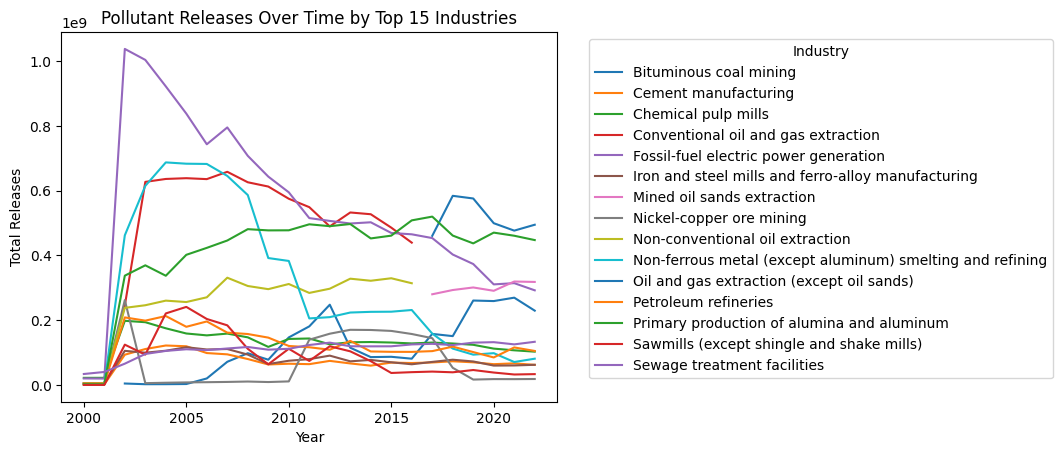

In [47]:
# Calculate total releases per industry and get the top 15 industries
top_industries = df_releases_copy.groupby('NAICS Title / Titre Code_SCIAN')['total_releases'].sum().nlargest(15).index

# Filter the DataFrame to include only the top 15 industries
industry_trends = df_releases_copy[df_releases_copy['NAICS Title / Titre Code_SCIAN'].isin(top_industries)]

# Group by Year and Industry and sum releases
industry_trends = industry_trends.groupby(['Reporting_Year / Année', 'NAICS Title / Titre Code_SCIAN'])['total_releases'].sum().reset_index()

# Pivot the data for plotting
industry_trends_pivot = industry_trends.pivot(index='Reporting_Year / Année', columns='NAICS Title / Titre Code_SCIAN', values='total_releases')

# Plot
plt.figure(figsize=(14, 8))
industry_trends_pivot.plot(title="Pollutant Releases Over Time by Top 15 Industries")
plt.xlabel("Year")
plt.ylabel("Total Releases")
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Highest Releases by Industries

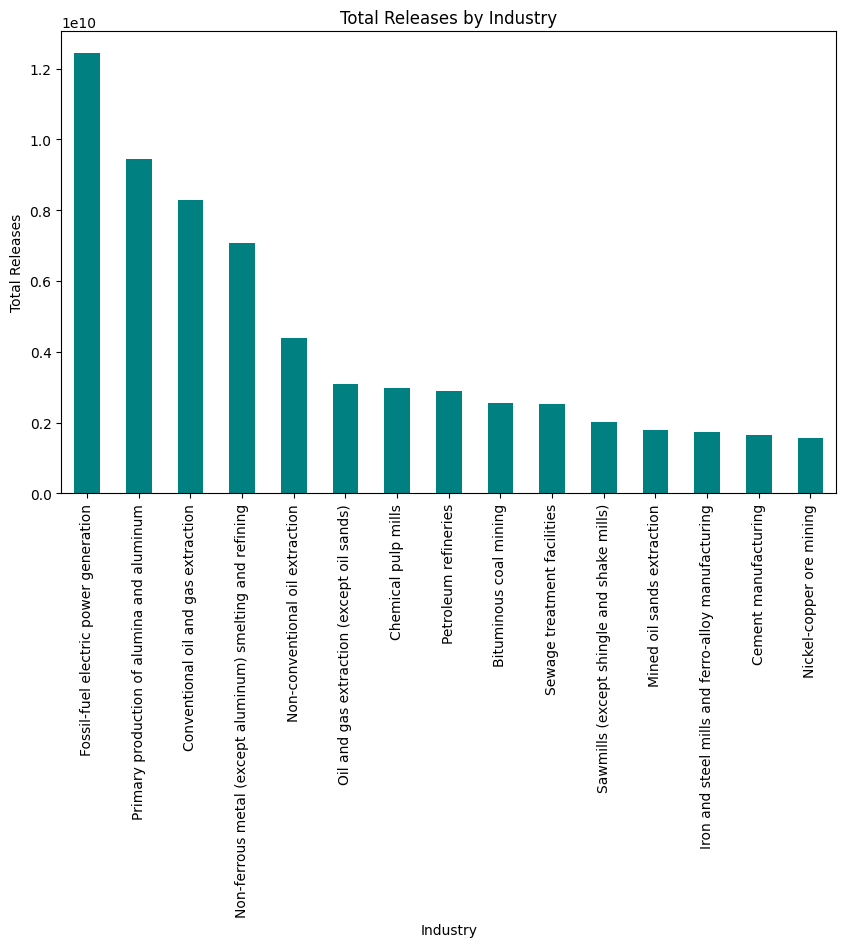

In [48]:
# Calculate total releases by industry and get top 15
industry_totals = df_releases_copy.groupby('NAICS Title / Titre Code_SCIAN')['total_releases'].sum().nlargest(15)

# Plot bar chart
plt.figure(figsize=(10, 6))
industry_totals.plot(kind='bar', color='teal')
plt.title("Total Releases by Industry")
plt.xlabel("Industry")
plt.ylabel("Total Releases")
plt.xticks(rotation=90)
plt.show()

Pollutant Releases by Province

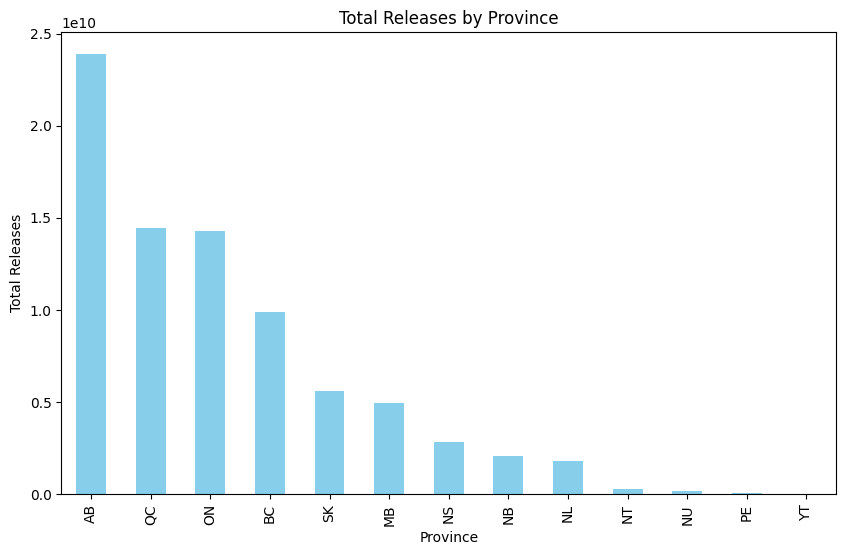

In [49]:
province_totals = df_releases_copy.groupby('PROVINCE')['total_releases'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
province_totals.plot(kind='bar', color='skyblue')
plt.title("Total Releases by Province")
plt.xlabel("Province")
plt.ylabel("Total Releases")
plt.xticks(rotation=90)
plt.show()

Total Releases by air over the years

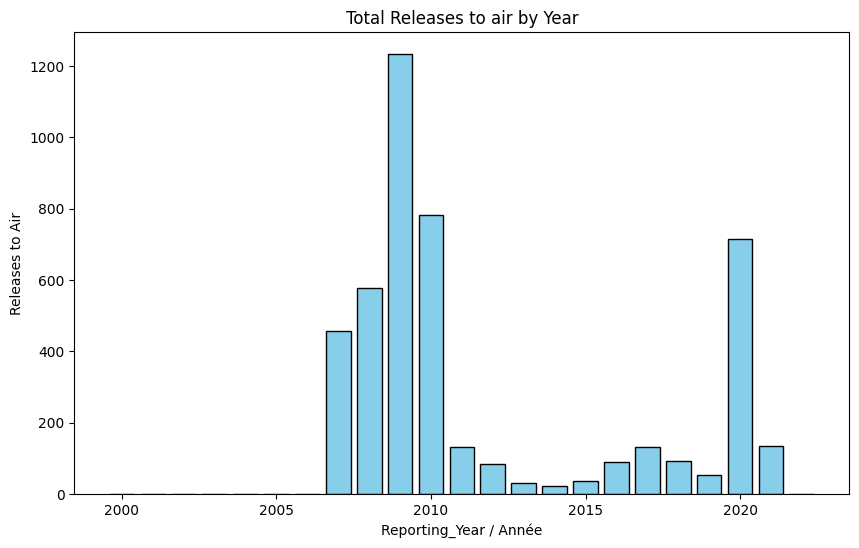

In [50]:
# Sum Releases to Air Columns
releases_to_air = (
    df_releases['Release to Air - Fugitive'] +
    df_releases['Release to Air - Other Non-Point '] +
    df_releases['Release to Air - Road dust  '] +
    df_releases['Release to Air - Spills '] +
    df_releases['Release to Air - Stack / Point  '] +
    df_releases['Release to Air - Storage / Handling ']
)

# Group by Year and Sum
Total_releases_air = releases_to_air.groupby(df_releases['Reporting_Year / Année']).sum()

# Plotting bar chart with Year
plt.figure(figsize=(10, 6))
plt.bar(Total_releases_air.index, Total_releases_air.values, color='skyblue', edgecolor='black')
plt.title("Total Releases to air by Year")
plt.xlabel("Reporting_Year / Année")
plt.ylabel("Releases to Air")
plt.show()

Total releases by air per industry

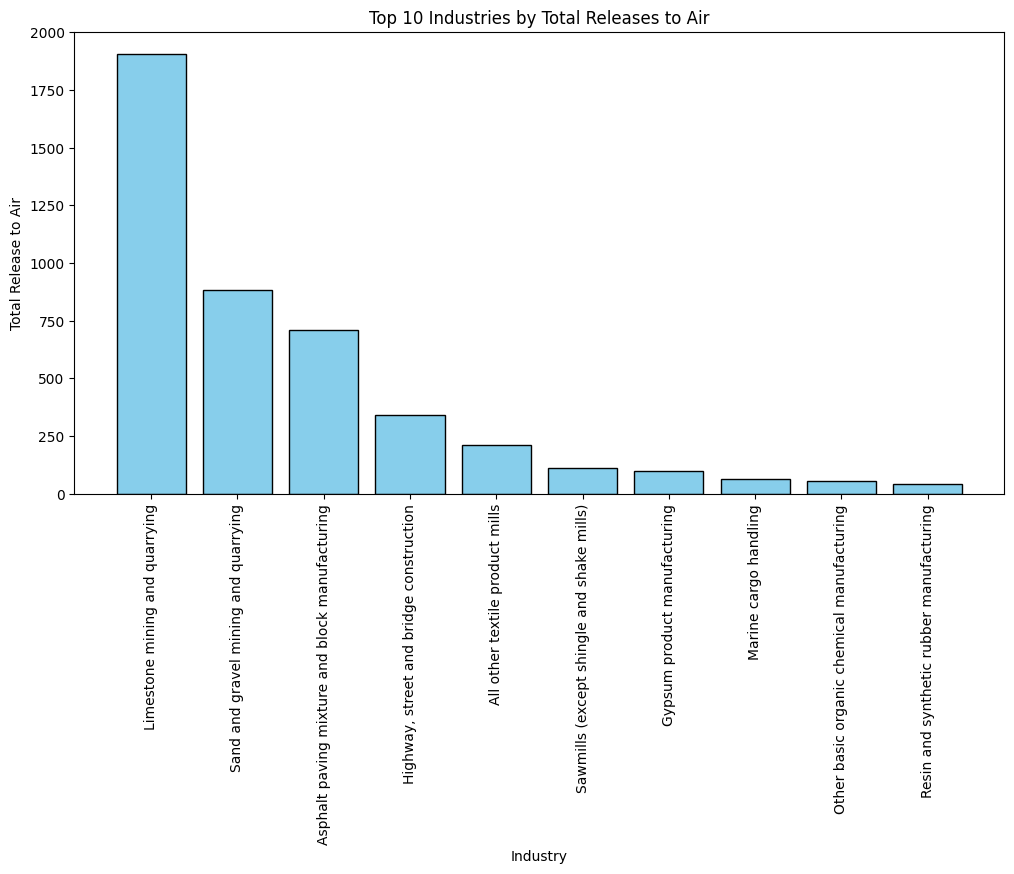

In [51]:
# Group by Industry and Sum, sort and select top 10
total_releases_by_industry = releases_to_air.groupby(df_releases['NAICS Title / Titre Code_SCIAN']).sum()
top_industries = total_releases_by_industry.sort_values(ascending=False).head(10)

# Plotting the bar plot with industries on the x-axis
plt.figure(figsize=(12, 6))
plt.bar(top_industries.index, top_industries.values, color='skyblue', edgecolor='black')
plt.title("Top 10 Industries by Total Releases to Air")
plt.xlabel("Industry")
plt.ylabel("Total Release to Air")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability if there are many industries
plt.show()

Total Releases by water over the years

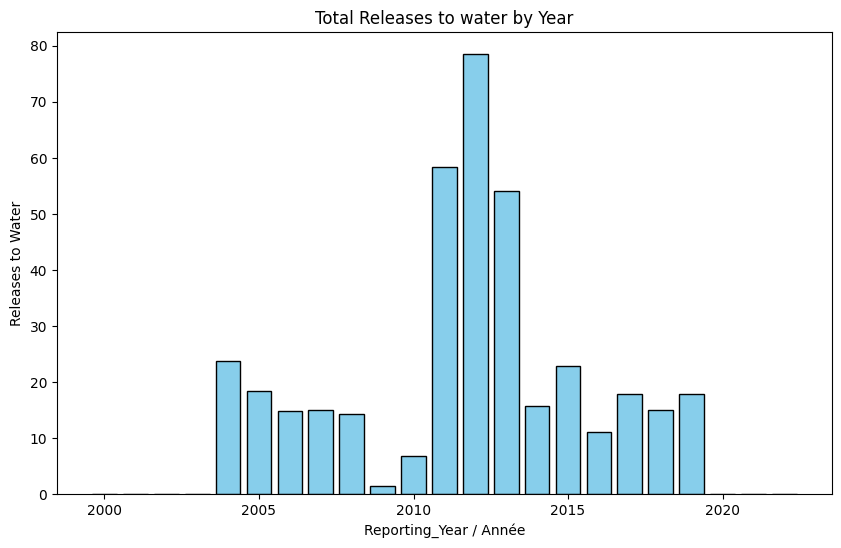

In [52]:
#sum releases to water columns
releases_to_water = (
    df_releases['Releases to Water Bodies - Direct Discharges '] +
      df_releases[ 'Releases to Water Bodies - Leaks'] +
       df_releases['Releases to Water Bodies - Spills ']
)

# Group by Year and Sum
Total_releases_water = releases_to_water.groupby(df_releases['Reporting_Year / Année']).sum()

# Plotting the bar plot with Year on the x-axis
plt.figure(figsize=(10, 6))
plt.bar(Total_releases_water.index, Total_releases_water.values, color='skyblue', edgecolor='black')
plt.title("Total Releases to water by Year")
plt.xlabel("Reporting_Year / Année")
plt.ylabel("Releases to Water")
plt.show()

Total releases by water for top 10 industries

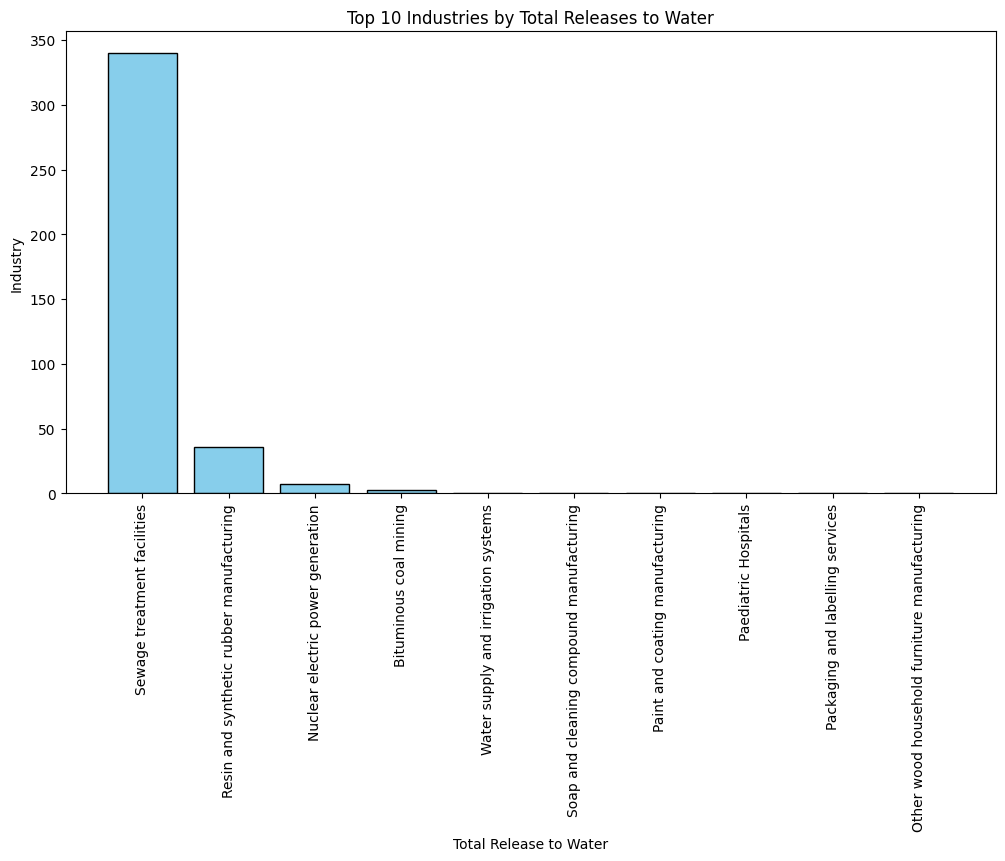

In [53]:
# Group by Industry and Sum, sort and select top 10
total_releases_by_industry = releases_to_water.groupby(df_releases['NAICS Title / Titre Code_SCIAN']).sum()
top_industries = total_releases_by_industry.sort_values(ascending=False).head(10)

# Plotting the bar plot with industries on the x-axis
plt.figure(figsize=(12, 6))
plt.bar(top_industries.index, top_industries.values, color='skyblue', edgecolor='black')
plt.title("Top 10 Industries by Total Releases to Water")
plt.xlabel("Total Release to Water")
plt.ylabel("Industry")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability if there are many industries
plt.show()

Total Releases by land over the years

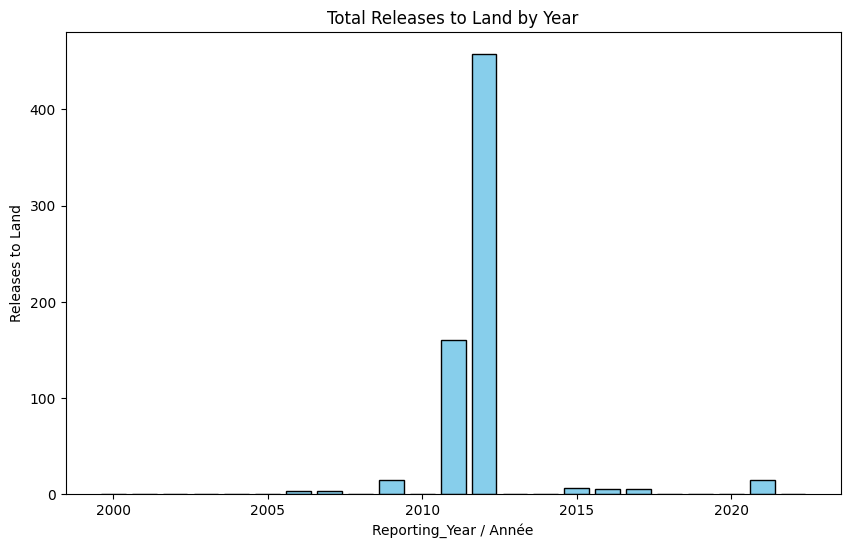

In [54]:
#sum releases to land columns
releases_to_land = (
      df_releases['Releases to Land - Leaks'] +
       df_releases['Releases to Land - Other '] +
       df_releases['Releases to Land - Spills ']
)

# Group by Year and Sum
Total_releases_land = releases_to_land.groupby(df_releases['Reporting_Year / Année']).sum()

# Plotting the bar plot with Year on the x-axis
plt.figure(figsize=(10, 6))
plt.bar(Total_releases_land.index, Total_releases_land.values, color='skyblue', edgecolor='black')
plt.title("Total Releases to Land by Year")
plt.xlabel("Reporting_Year / Année")
plt.ylabel("Releases to Land")
plt.show()

Total releases by land in top 10 industries

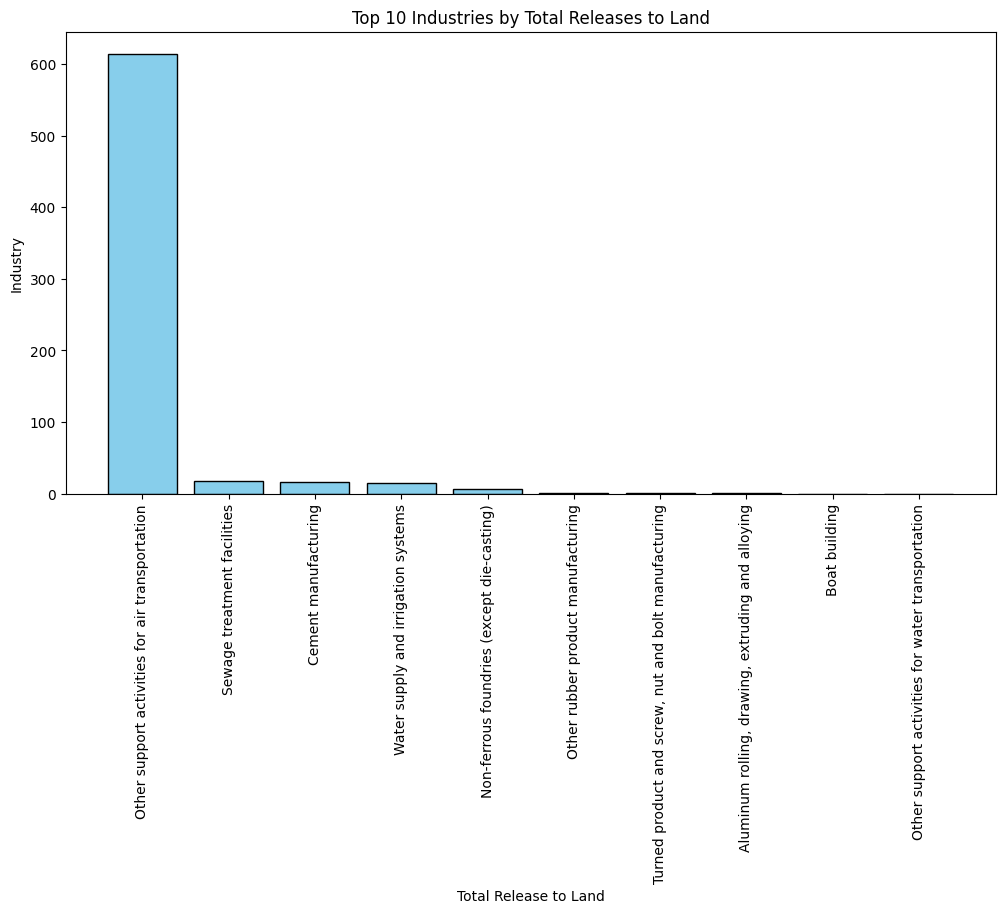

In [55]:
# Group by Industry and Sum, sort and select top 10
total_releases_by_industry = releases_to_land.groupby(df_releases['NAICS Title / Titre Code_SCIAN']).sum()
top_industries = total_releases_by_industry.sort_values(ascending=False).head(10)

# Plotting the bar plot with industries on the x-axis
plt.figure(figsize=(12, 6))
plt.bar(top_industries.index, top_industries.values, color='skyblue', edgecolor='black')
plt.title("Top 10 Industries by Total Releases to Land")
plt.xlabel("Total Release to Land")
plt.ylabel("Industry")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability if there are many industries
plt.show()

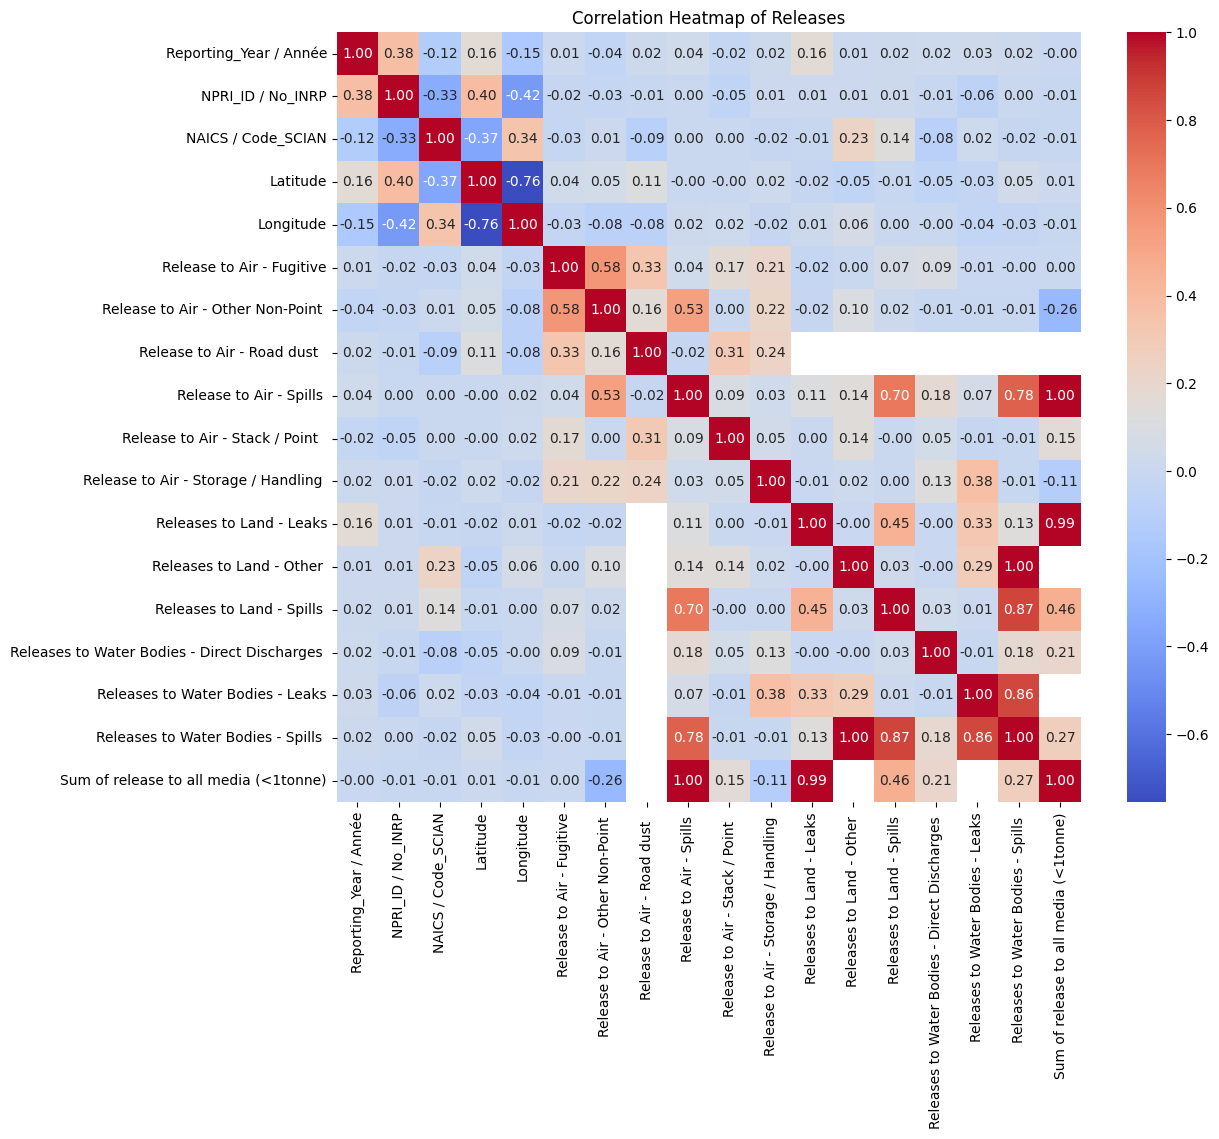

In [56]:
corr_data= df_releases.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Releases")
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap of Releases')

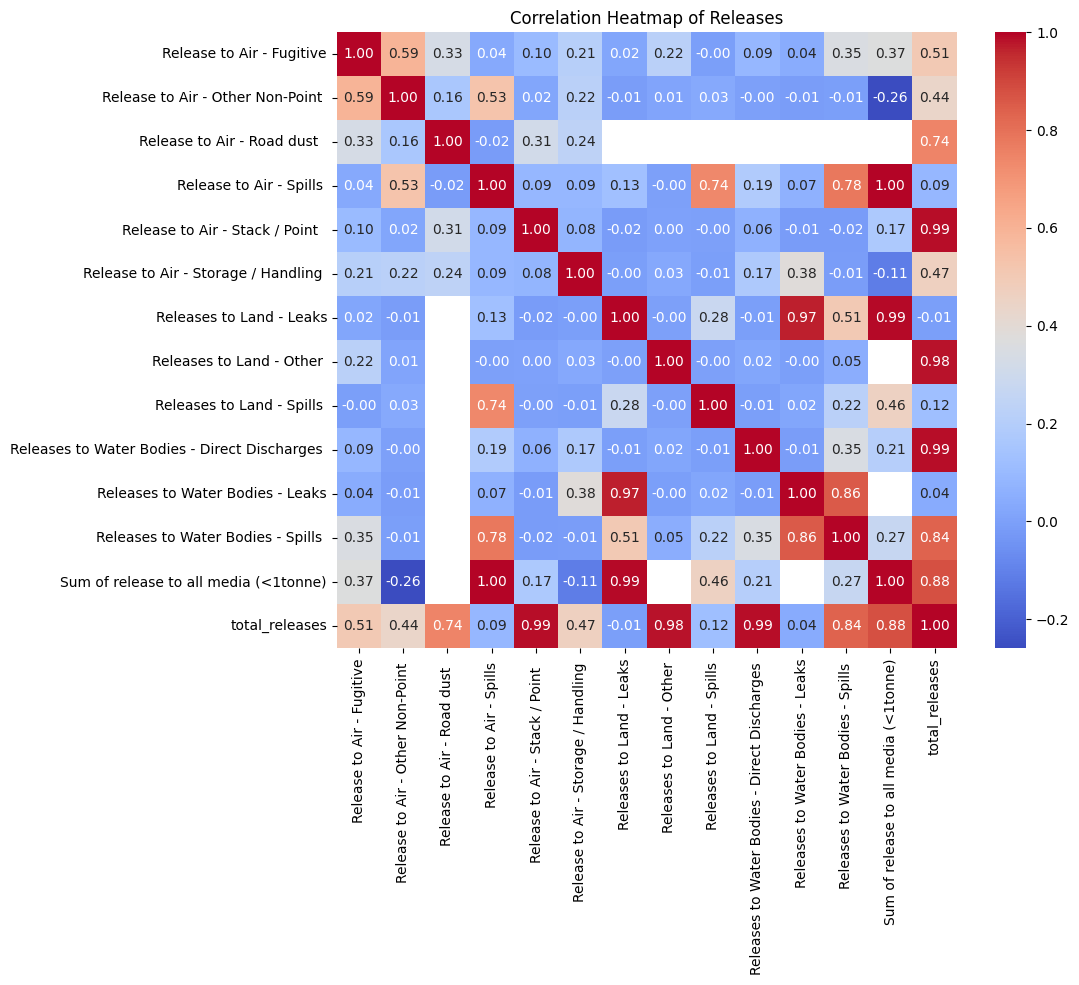

In [57]:
# Select columns from index 5 onwards
selected_columns = df_releases_copy.iloc[:, 12:]

# Calculate correlation matrix for selected columns
corr_data_releases = selected_columns.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data_releases, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Releases")

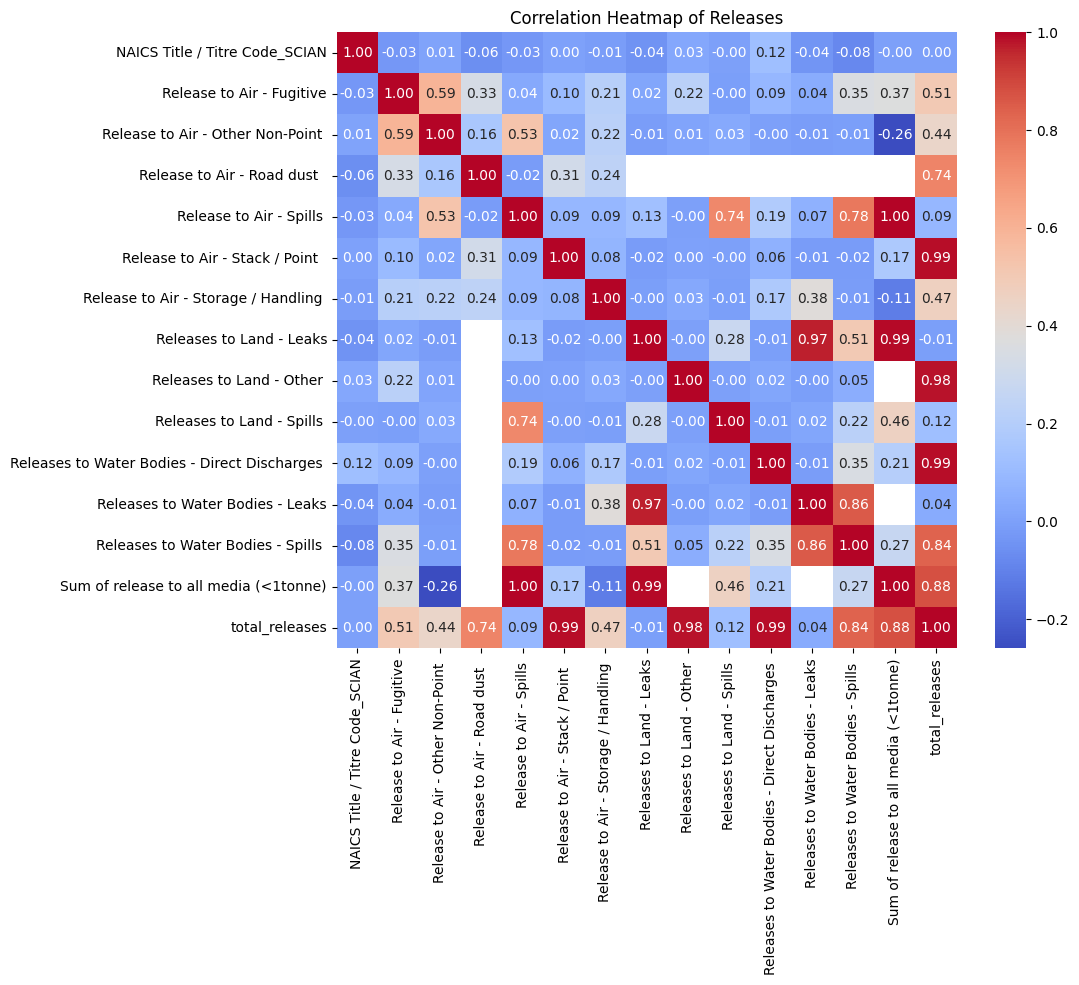

In [58]:
correlation_data = df_releases_copy[['NAICS Title / Titre Code_SCIAN']]

correlation_data = pd.concat([correlation_data, df_releases_copy.iloc[:, 12:]], axis=1)

# Convert 'NAICS Title / Titre Code_SCIAN' to numerical representations
# Label Encoding:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
correlation_data['NAICS Title / Titre Code_SCIAN'] = label_encoder.fit_transform(correlation_data['NAICS Title / Titre Code_SCIAN'])
# Calculate correlation matrix
correlation_matrix = correlation_data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Releases")
plt.show()


Correlation Heatmap between release amounts, industry types, provinces

<ipython-input-59-265408d81aaf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['NAICS Title / Titre Code_SCIAN'] = label_encoder.fit_transform(correlation_data['NAICS Title / Titre Code_SCIAN'])
<ipython-input-59-265408d81aaf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['PROVINCE'] = label_encoder.fit_transform(correlation_data['PROVINCE'])


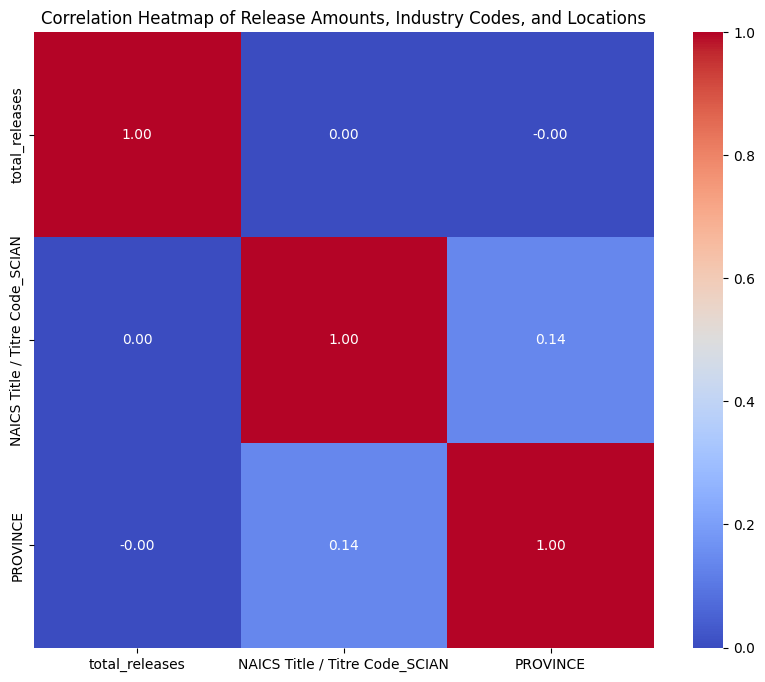

In [59]:
# Create a subset of the data with relevant numerical columns for correlation analysis
correlation_data = df_releases_copy[['total_releases','NAICS Title / Titre Code_SCIAN', 'PROVINCE']]

# Convert 'NAICS Title / Titre Code_SCIAN' and 'PROVINCE' to numerical representations
# Label Encoding:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
correlation_data['NAICS Title / Titre Code_SCIAN'] = label_encoder.fit_transform(correlation_data['NAICS Title / Titre Code_SCIAN'])
correlation_data['PROVINCE'] = label_encoder.fit_transform(correlation_data['PROVINCE'])

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Release Amounts, Industry Codes, and Locations")
plt.show()

Boxplot to identify outliers

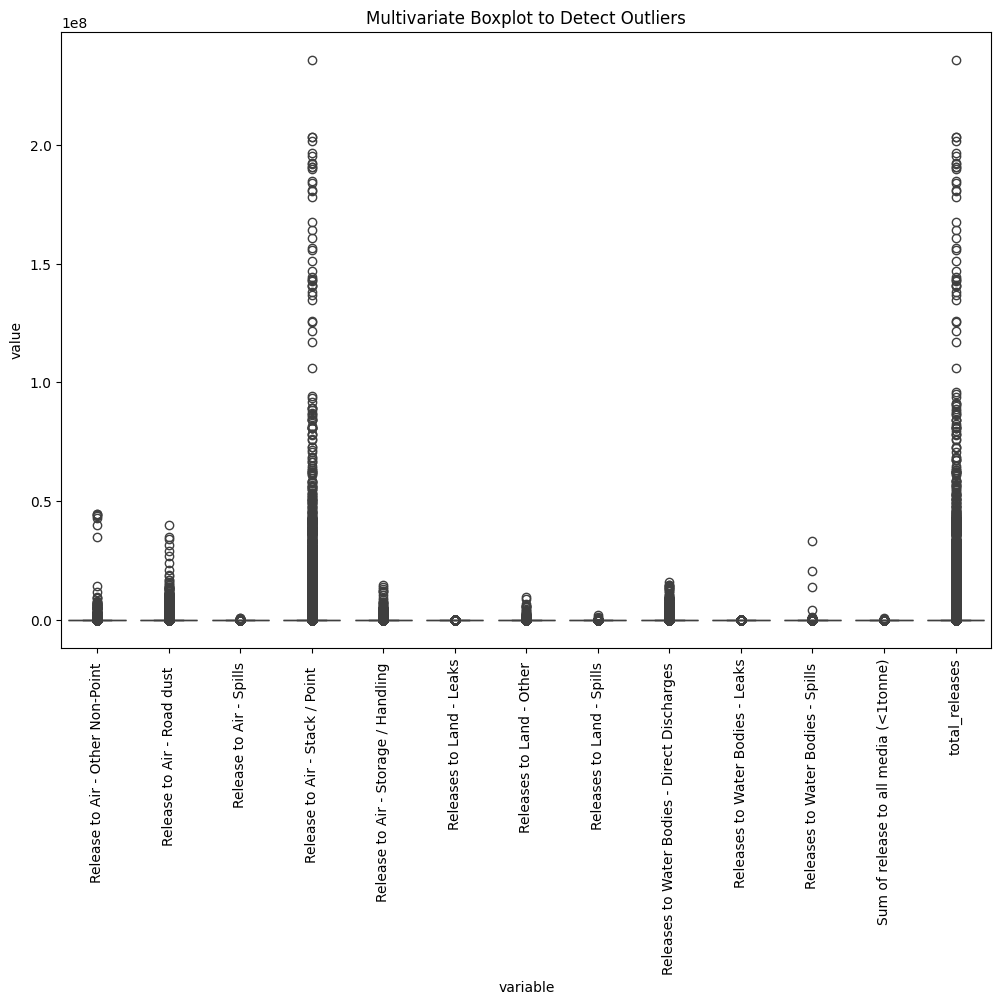

In [60]:
# 1. Melt the DataFrame to long format:
melted_df = pd.melt(df_releases_copy, id_vars=['Reporting_Year / Année'],
                   value_vars=df_releases_copy.select_dtypes(include=['number']).columns[6:]) # Selecting numeric columns from index 5 onwards


# 2. Create the boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Multivariate Boxplot to Detect Outliers')
plt.show()


([0], [Text(0, 0, '')])

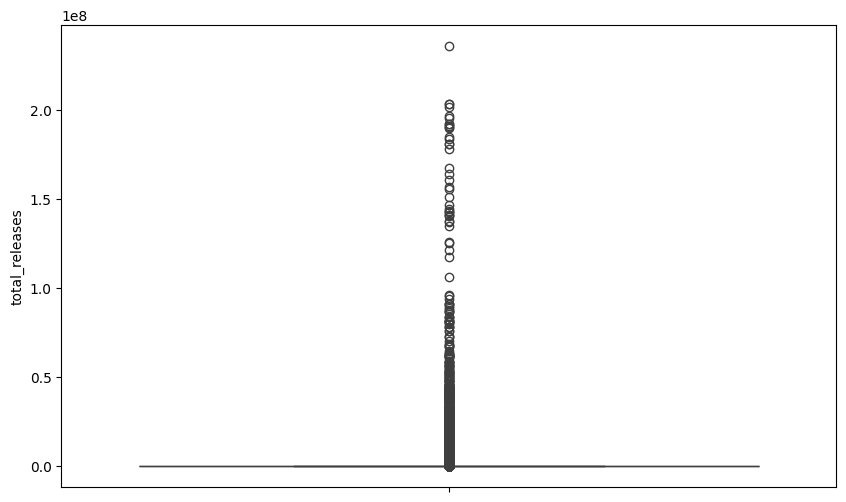

In [61]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='total_releases', data=df_releases_copy)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

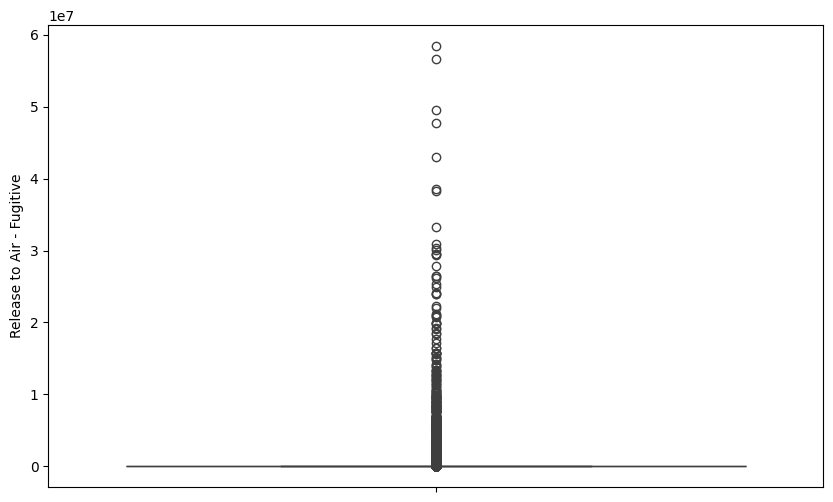

In [62]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Release to Air - Fugitive', data=df_releases_copy)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

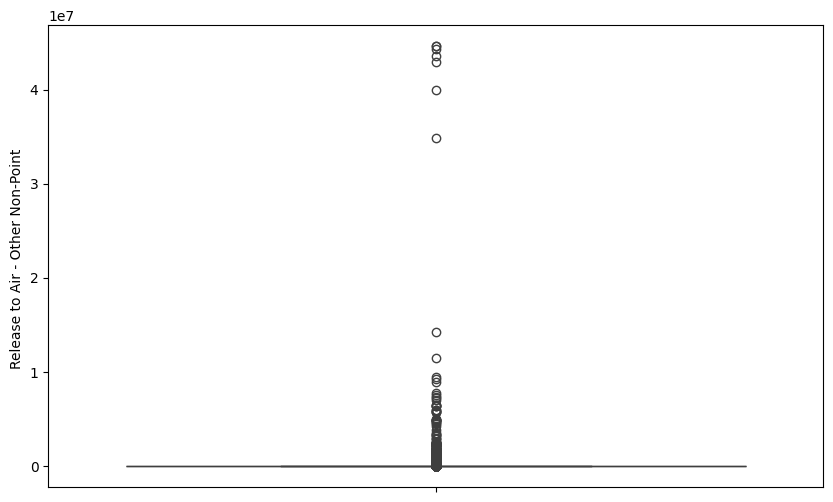

In [63]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Release to Air - Other Non-Point ', data=df_releases_copy)
plt.xticks(rotation=90)



([0], [Text(0, 0, '')])

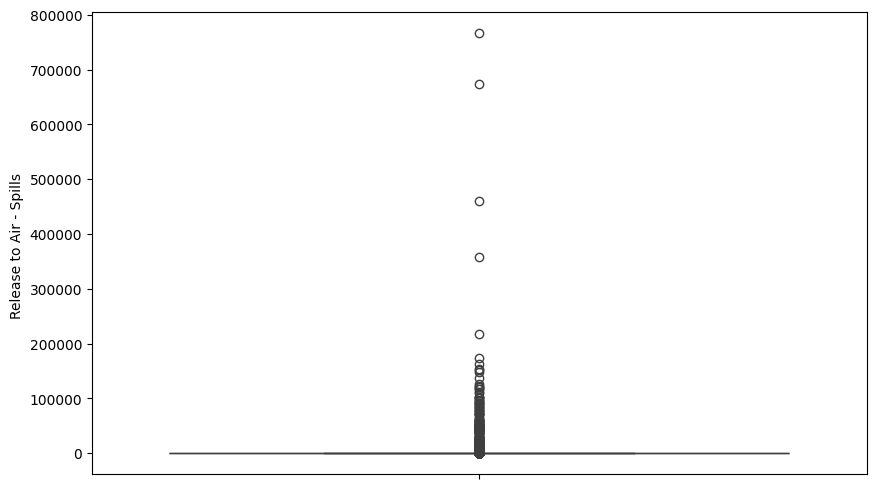

In [64]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Release to Air - Spills ', data=df_releases_copy)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

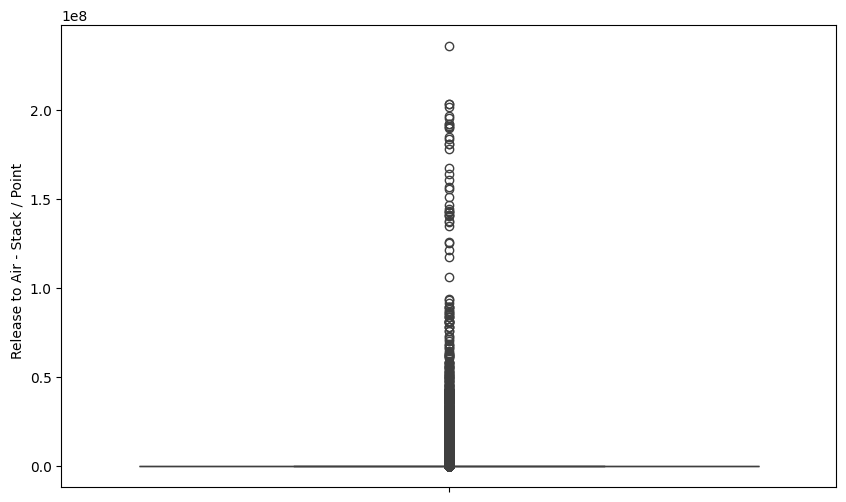

In [65]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Release to Air - Stack / Point  ', data=df_releases_copy)
plt.xticks(rotation=90)


([0], [Text(0, 0, '')])

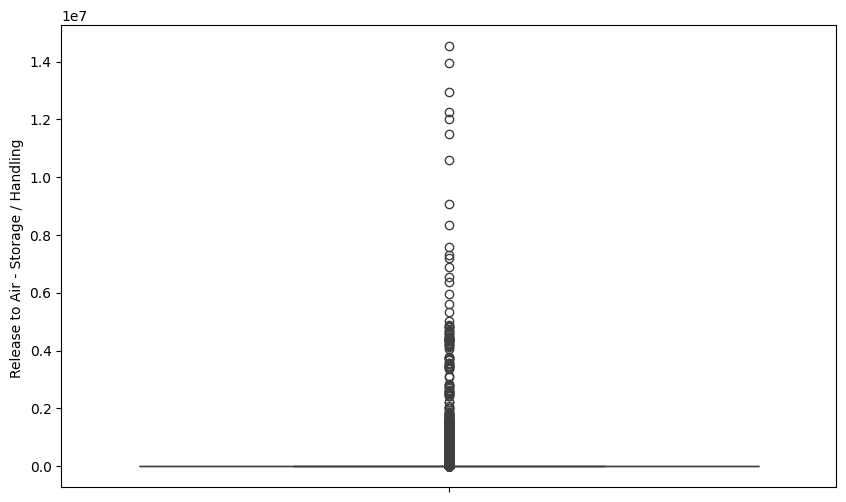

In [66]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Release to Air - Storage / Handling ', data=df_releases_copy)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

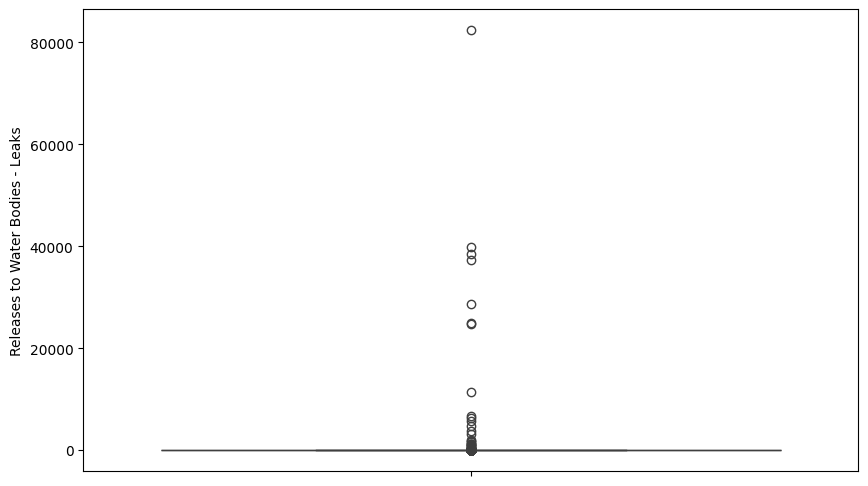

In [67]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Releases to Water Bodies - Leaks', data=df_releases_copy)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

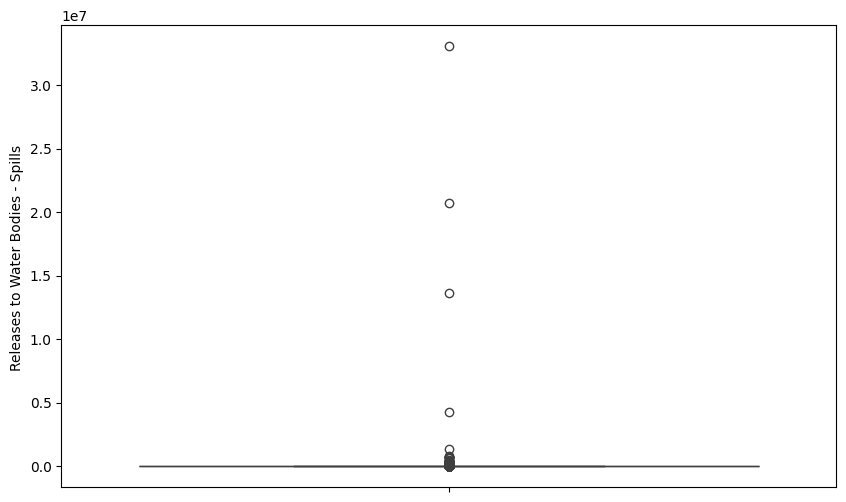

In [68]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Releases to Water Bodies - Spills ', data=df_releases_copy)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

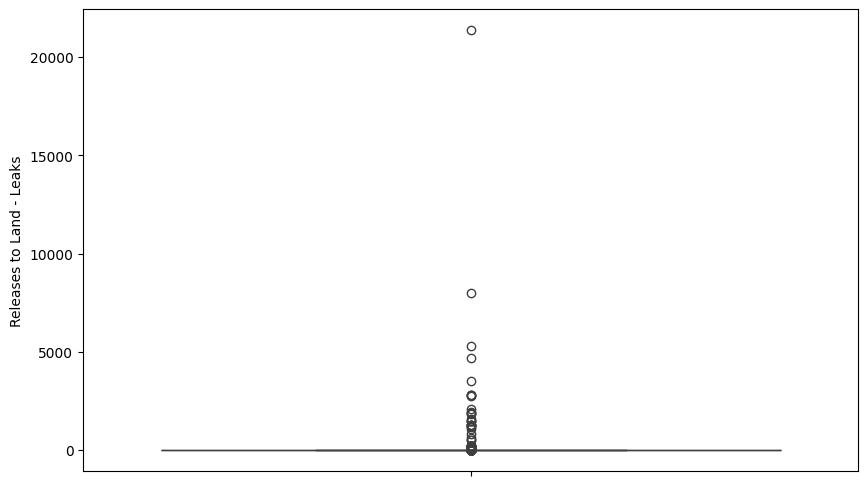

In [69]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Releases to Land - Leaks', data=df_releases_copy)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

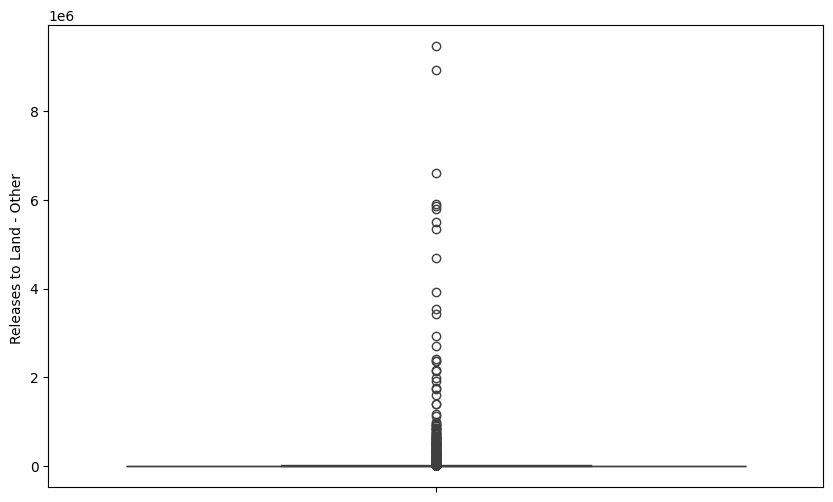

In [70]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Releases to Land - Other ', data=df_releases_copy)
plt.xticks(rotation=90)

([0], [Text(0, 0, '')])

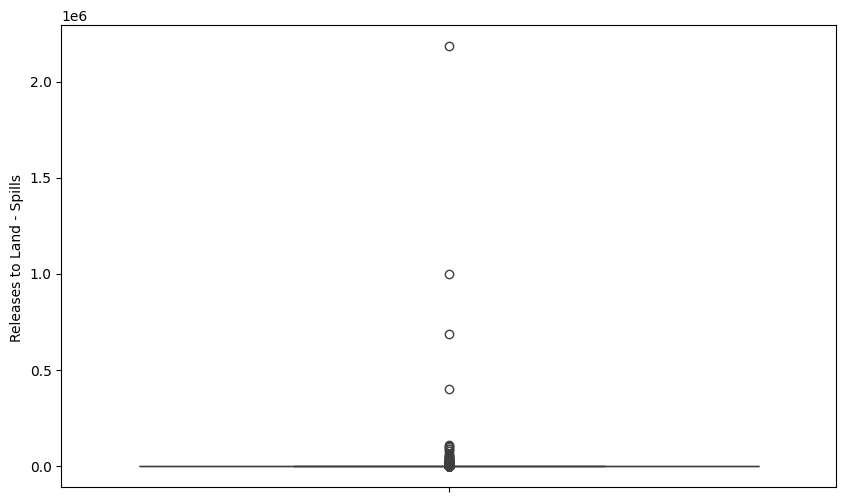

In [71]:
#identifying outliers in the release column
plt.figure(figsize=(10, 6))
sns.boxplot(y='Releases to Land - Spills ', data=df_releases_copy)
plt.xticks(rotation=90)

Handling Outliers

# DATA CLEANING

In [72]:
#Creating a copy for cleaning
df_analysis = df_releases.copy()

In [73]:
# making the column headings consistent
df_analysis.columns = [col.lower().split(' / ')[0].strip().replace(' ', '_') for col in df_analysis.columns]

In [74]:
df_analysis.columns

Index(['reporting_year', 'npri_id', 'number_of_employees', 'company_name',
       'facility_name', 'naics', 'naics_title', 'province', 'city', 'latitude',
       'longitude', 'cas_number', 'substance_name_(english)', 'units',
       'estimation_method', 'release_to_air_-_fugitive',
       'release_to_air_-_other_non-point', 'release_to_air_-_road_dust',
       'release_to_air_-_spills', 'release_to_air_-_stack',
       'release_to_air_-_storage', 'releases_to_land_-_leaks',
       'releases_to_land_-_other', 'releases_to_land_-_spills',
       'releases_to_water_bodies_-_direct_discharges',
       'releases_to_water_bodies_-_leaks', 'releases_to_water_bodies_-_spills',
       'sum_of_release_to_all_media_(<1tonne)'],
      dtype='object')

##Data type conversion

In [75]:
# Convert "Reporting_Year" to datetime format (using only the year)
df_analysis['reporting_year'] = pd.to_datetime(df_analysis['reporting_year'], format='%Y')

#Convert selected object columns to categorical type
categorical_columns = [
    'company_name', 'facility_name',
    'naics', 'province', 'city', 'cas_number',
    'substance_name_(english)', 'units',
    'estimation_method'
]
df_analysis[categorical_columns] = df_analysis[categorical_columns].astype('category')

# Check data types to confirm conversions
df_analysis.dtypes
df_analysis[categorical_columns] = df_analysis[categorical_columns].astype('category')

# Check data types to confirm conversions
df_analysis.dtypes

reporting_year                                  datetime64[ns]
npri_id                                                  int64
number_of_employees                                     object
company_name                                          category
facility_name                                         category
naics                                                 category
naics_title                                             object
province                                              category
city                                                  category
latitude                                               float64
longitude                                              float64
cas_number                                            category
substance_name_(english)                              category
units                                                 category
estimation_method                                     category
release_to_air_-_fugitive                              float64
release_to_air_-_other_non-point                       float64
release_to_air_-_road_dust                             float64
release_to_air_-_spills                                float64
release_to_air_-_stack                                 float64
release_to_air_-_storage                               float64
releases_to_land_-_leaks                               float64
releases_to_land_-_other                               float64
releases_to_land_-_spills                              float64
releases_to_water_bodies_-_direct_discharges           float64
releases_to_water_bodies_-_leaks                       float64
releases_to_water_bodies_-_spills                      float64
sum_of_release_to_all_media_(<1tonne)                  float64
dtype: object

In [76]:
df_analysis.isnull().sum()

reporting_year                                       0
npri_id                                              0
number_of_employees                                616
company_name                                         0
facility_name                                     1176
naics                                                0
naics_title                                          0
province                                             0
city                                             90764
latitude                                          4082
longitude                                         4082
cas_number                                           0
substance_name_(english)                             0
units                                                0
estimation_method                                    0
release_to_air_-_fugitive                       612484
release_to_air_-_other_non-point                706636
release_to_air_-_road_dust                      707655
release_to_air_-_spills                         728335
release_to_air_-_stack                          224234
release_to_air_-_storage                        657512
releases_to_land_-_leaks                        736606
releases_to_land_-_other                        731848
releases_to_land_-_spills                       733046
releases_to_water_bodies_-_direct_discharges    684328
releases_to_water_bodies_-_leaks                736774
releases_to_water_bodies_-_spills               734436
sum_of_release_to_all_media_(<1tonne)           687331
dtype: int64

In [77]:
releases = ['release_to_air_-_fugitive',
       'release_to_air_-_other_non-point', 'release_to_air_-_road_dust',
       'release_to_air_-_spills', 'release_to_air_-_stack',
       'release_to_air_-_storage', 'releases_to_land_-_leaks',
       'releases_to_land_-_other', 'releases_to_land_-_spills',
       'releases_to_water_bodies_-_direct_discharges',
       'releases_to_water_bodies_-_leaks', 'releases_to_water_bodies_-_spills',
       'sum_of_release_to_all_media_(<1tonne)'
]

# Make a copy of df_analysis to avoid modifying the original DataFrame
df_no_outliers = df_analysis.copy()

# Iterate over each column in the 'releases' list to apply the outlier filter
for col in releases:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

# Filter out outliers for the specific column
df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]



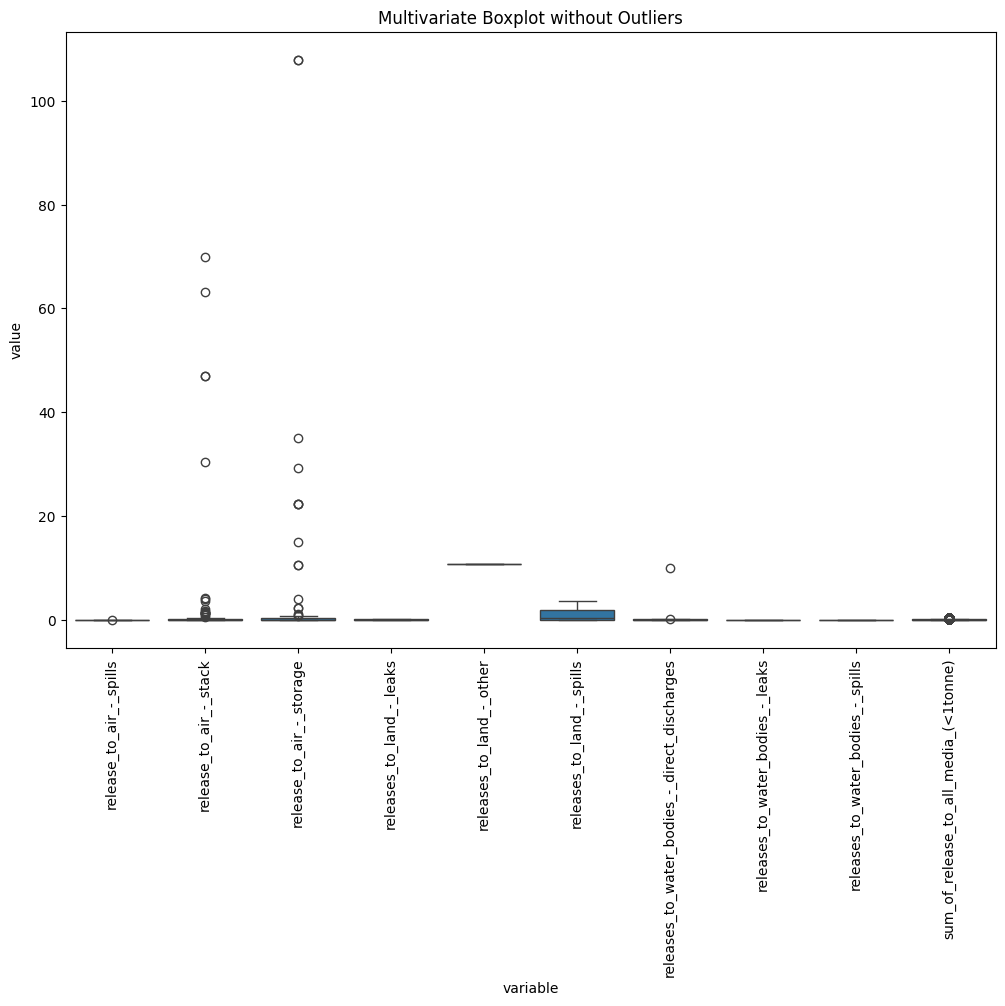

In [78]:
# Melt the updated DataFrame
melted_df = pd.melt(df_no_outliers, id_vars=['reporting_year'],
                    value_vars=df_no_outliers.select_dtypes(include=['number']).columns[6:])

# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xticks(rotation=90)
plt.title('Multivariate Boxplot without Outliers')
plt.show()

<Axes: ylabel='release_to_air_-_fugitive'>

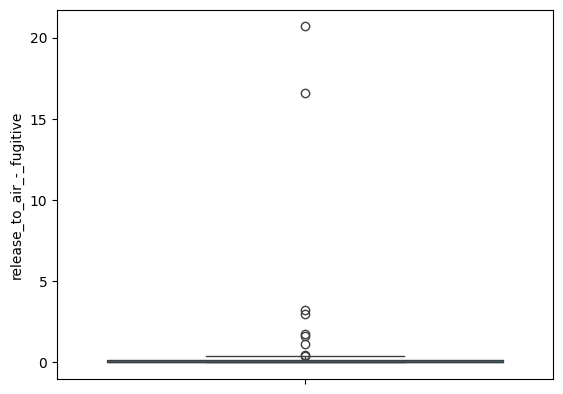

In [79]:
sns.boxplot(y='release_to_air_-_fugitive', data=df_no_outliers)

In [80]:
# handling outliers in releases_to_air_fugitive
Q1 = df_analysis['release_to_air_-_fugitive'].quantile(0.25)
Q3 = df_analysis['release_to_air_-_fugitive'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.0  # or try 0.75

# Removing the outliers
df_analysis = df_analysis[~((df_analysis['release_to_air_-_fugitive'] < (Q1 - threshold * IQR)) | (df_analysis['release_to_air_-_fugitive'] > (Q3 + threshold * IQR)))]

<Axes: ylabel='release_to_air_-_fugitive'>

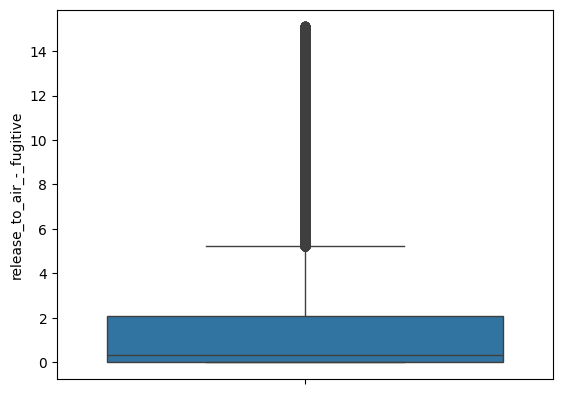

In [81]:
sns.boxplot(y='release_to_air_-_fugitive', data=df_analysis)

In [82]:

# handling outliers in releases_to_air_fugitive
Q1 = df_analysis['release_to_air_-_fugitive'].quantile(0.25)
Q3 = df_analysis['release_to_air_-_fugitive'].quantile(0.75)
IQR = Q3 - Q1

# Removing the outliers
df_analysis = df_analysis[~((df_analysis['release_to_air_-_fugitive'] < (Q1 - 1.5 * IQR)) | (df_analysis['release_to_air_-_fugitive'] > (Q3 + 1.5 * IQR)))]

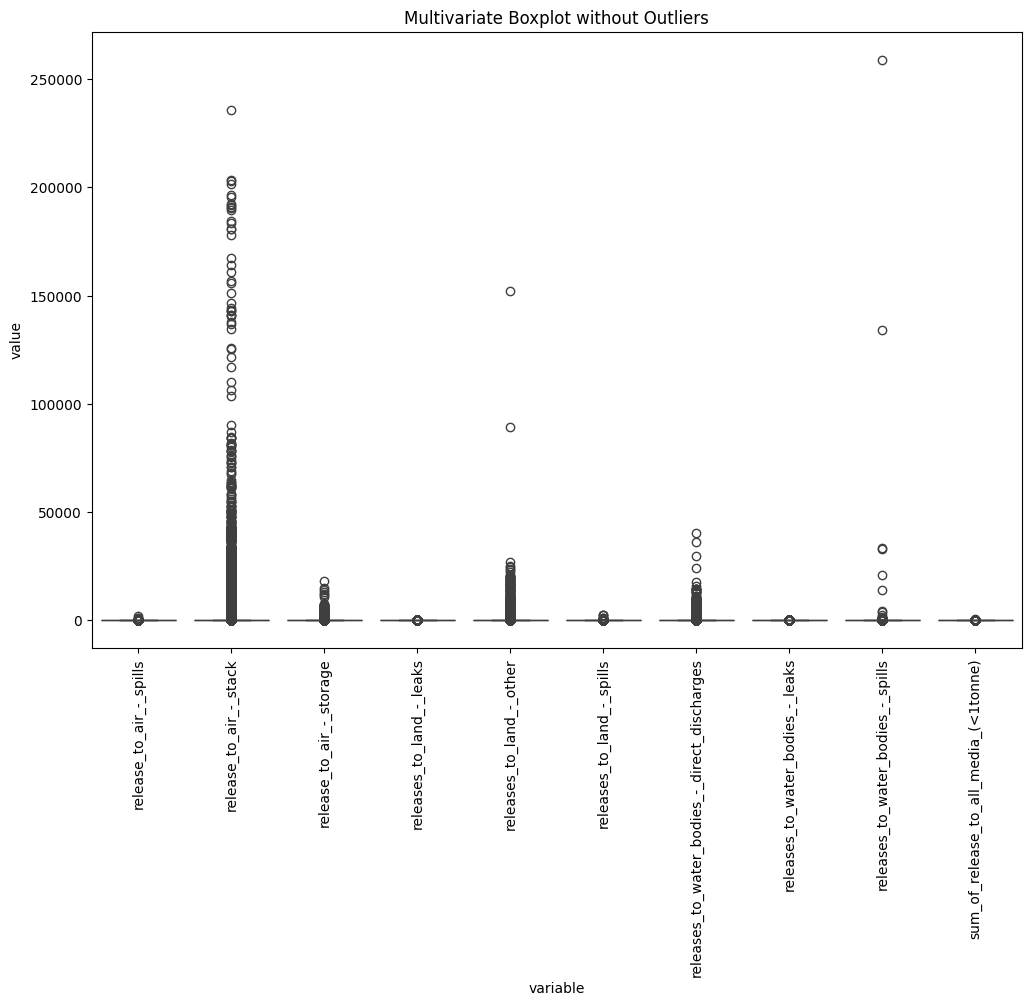

In [83]:
# Melt the updated DataFrame
melted_df = pd.melt(df_analysis, id_vars=['reporting_year'],
                    value_vars=df_analysis.select_dtypes(include=['number']).columns[6:])

# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=melted_df)
plt.xticks(rotation=90)
plt.title('Multivariate Boxplot without Outliers')
plt.show()

# DATA MERGING

In [84]:
# Load the green house emmissions dataset, specifying the encoding as 'latin-1'
df_emissions = pd.read_csv('GHGEmissionsGES-2004-Present.csv', encoding='latin-1')
#Setting up notebook so that all columns are displayed
pd.set_option('display.max_columns', None)

# Preview the dataset
df_emissions.head()

GHGRP ID No. / No d'identification du PDGES  \
0                                      G12721   
1                                      G10001   
2                                      G10003   
3                                      G10004   
4                                      G10006   

   Reference Year / Année de référence  \
0                                 2022   
1                                 2022   
2                                 2022   
3                                 2022   
4                                 2022   

               Facility Name / Nom de l'installation  \
0  Lieu d'enfouissement technique de Rivière-du-Loup   
1                                      Division Alma   
2                        Foothills Pipeline, Alberta   
3                                     Kingston CoGen   
4                     Redwater Fertilizer Operations   

  Facility Location / Emplacement de l'installation  \
0                          1707 du Patrimoine Route   
1                              1100 Melançon Street   
2                                               NaN   
3                        5146 Taylor-Kidd Boulevard   
4                                       56225 SH643   

  Facility City or District or Municipality / Ville ou District ou Municipalité de l'installation  \
0                                            Cacouna                                                
1                                               Alma                                                
2                                            AIRDRIE                                                
3                                               Bath                                                
4                                    Sturgeon County                                                

  Facility Province or Territory / Province ou territoire de l'installation  \
0                                             Quebec                          
1                                             Quebec                          
2                                            Alberta                          
3                                            Ontario                          
4                                            Alberta                          

  Facility Postal Code / Code postal de l'installation  Latitude  Longitude  \
0                                            G0L 1G0     47.9748  -69.43849   
1                                            G8B 5W2     48.5650  -71.65556   
2                                            T4A 2G7         NaN        NaN   
3                                            K0H 1G0     44.2095  -76.72460   
4                                            T0A 2W0     53.8420 -113.09300   

   Facility NPRI ID / Numéro d'identification de l'INRP  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                             5765.0      
4                                             2134.0      

   Facility NAICS Code / Code SCIAN de l'installation  \
0                                             562210    
1                                             322111    
2                                             486210    
3                                             221112    
4                                             325313    

  English Facility NAICS Code Description / Description du code SCIAN de l'installation en anglais  \
0                       Waste Treatment and Disposal                                                 
1                              Mechanical Pulp Mills                                                 
2             Pipeline Transportation of Natural Gas                                                 
3              Fossil-Fuel Electric Power Generation                                                 
4  Chemical Fertilize

In [85]:
df_emissions.shape

(16823, 81)

In [86]:
df_emissions.columns


Index(['GHGRP ID No. / No d'identification du PDGES',
       'Reference Year / Année de référence',
       'Facility Name / Nom de l'installation',
       'Facility Location / Emplacement de l'installation',
       'Facility City or District or Municipality / Ville ou District ou Municipalité de l'installation',
       'Facility Province or Territory / Province ou territoire de l'installation',
       'Facility Postal Code / Code postal de l'installation', 'Latitude',
       'Longitude', 'Facility NPRI ID / Numéro d'identification de l'INRP',
       'Facility NAICS Code / Code SCIAN de l'installation',
       'English Facility NAICS Code Description / Description du code SCIAN de l'installation en anglais',
       'French Facility NAICS Code Description / Description du code SCIAN de l'installation en français',
       'Reporting Company Legal Name / Dénomination sociale de la société déclarante',
       'Reporting Company Trade Name / Nom commercial de la société déclarante',
       '

In [87]:
df_emissions.isnull().sum()

GHGRP ID No. / No d'identification du PDGES                                                           0
Reference Year / Année de référence                                                                   0
Facility Name / Nom de l'installation                                                                 0
Facility Location / Emplacement de l'installation                                                  4738
Facility City or District or Municipality / Ville ou District ou Municipalité de l'installation    1678
                                                                                                   ... 
GHGRP Quantification Requirements / Exigences de quantification du PDGES                             43
Emission Factors / Coefficients d'émission                                                           43
Engineering Estimates / Estimations techniques                                                       43
Mass Balance / Bilan massique                                                                        43
Monitoring or Direct Measurement / Surveillance ou mesure directe                                    43
Length: 81, dtype: int64

In [88]:
pd.set_option('display.max_rows', None)
df_emissions.dtypes

GHGRP ID No. / No d'identification du PDGES                                                                                         object
Reference Year / Année de référence                                                                                                  int64
Facility Name / Nom de l'installation                                                                                               object
Facility Location / Emplacement de l'installation                                                                                   object
Facility City or District or Municipality / Ville ou District ou Municipalité de l'installation                                     object
Facility Province or Territory / Province ou territoire de l'installation                                                           object
Facility Postal Code / Code postal de l'installation                                                                                object
Latitude                                                                                                                           float64
Longitude                                                                                                                          float64
Facility NPRI ID / Numéro d'identification de l'INRP                                                                               float64
Facility NAICS Code / Code SCIAN de l'installation                                                                                   int64
English Facility NAICS Code Description / Description du code SCIAN de l'installation en anglais                                    object
French Facility NAICS Code Description / Description du code SCIAN de l'installation en français                                    object
Reporting Company Legal Name / Dénomination sociale de la société déclarante                                                        object
Reporting Company Trade Name / Nom commercial de la société déclarante                                                              object
Reporting Company Business Number / Numéro d'entreprise de la société déclarante                                                   float64
DUNS Number / Numéro DUNS                                                                                                            int64
Public Contact Name / Nom du responsable des renseignements au public                                                               object
Public Contact Position / Poste ou Titre du responsable des renseignements au public                                                object
Public Contact Telephone / Numéro de téléphone du responsable des renseignements au public                                         float64
Public Contact Extension / Poste téléphonique du responsable des renseignements au public                                          float64
Public Contact Email / Adresse électronique du responsable des renseignements au public                                             object
Public Contact Mailing Address / Adresse postale du responsable des renseignements au public                                        object
Public Contact City or District or Municipality / Ville ou District ou Municipalité du responsable des renseignements au public     object
Public Contact Province or Territory / Province ou Territoire du responsable des renseignements au public                           object
Public Contact Postal Code / Code postal du responsable des renseignement au public                                                 object
CO2 (tonnes)                                                                                                                       float64
CH4 (tonnes)                                                                                                                       float64
CH4 (tonnes CO2e / tonnes éq. CO2)                                                                          

In [89]:
df_emissions.describe()

Reference Year / Année de référence      Latitude     Longitude  \
count                         16823.000000  16457.000000  16457.000000   
mean                           2016.288652     50.150320    -99.209576   
std                               4.936021      4.768594     19.927313   
min                            2004.000000     42.039360   -137.150000   
25%                            2013.000000     45.636400   -115.666880   
50%                            2018.000000     50.522300   -109.951240   
75%                            2020.000000     53.778100    -79.645400   
max                            2022.000000     71.884440    -48.039300   

       Facility NPRI ID / Numéro d'identification de l'INRP  \
count                                       16734.000000      
mean                                        10388.203299      
std                                         24241.510732      
min                                             0.000000      
25%                                          1528.000000      
50%                                          5367.000000      
75%                                         16869.000000      
max                                        500540.000000      

       Facility NAICS Code / Code SCIAN de l'installation  \
count                                       16823.000000    
mean                                       292167.807942    
std                                        122189.044745    
min                                        111412.000000    
25%                                        211110.000000    
50%                                        221112.000000    
75%                                        325313.000000    
max                                        913910.000000    

       Reporting Company Business Number / Numéro d'entreprise de la société déclarante  \
count                                       1.571200e+04                                  
mean                                        5.176390e+08                                  
std                                         3.709124e+08                                  
min                                        -1.000000e+00                                  
25%                                         1.194298e+08                                  
50%                                         8.014242e+08                                  
75%                                         8.712538e+08                                  
max                                         1.000000e+09                                  

       DUNS Number / Numéro DUNS  \
count               1.682300e+04   
mean                1.051418e+08   
std                 1.868831e+08   
min                 0.000000e+00   
25%                 0.000000e+00   
50%                 0.000000e+00   
75%                 2.037407e+08   
max                 1.000000e+09   

       Public Contact Telephone / Numéro de téléphone du responsable des renseignements au public  \
count                                       9.462000e+03                                            
mean                                        5.198959e+09                                            
std                                         2.180410e+09                                            
min                                         0.000000e+00                                            
25%                                         4.035138e+09                                            
50%                                         4.188780e+09                                            
75%                                         6.048953e+09                                            
max                                         6.141985e+10                                            

       Public Contact Extension / Poste téléphonique du responsable des renseignements au public  \
count                                       2.445000e+03           

In [90]:
df_emissions.describe(include='object')

GHGRP ID No. / No d'identification du PDGES  \
count                                        16823   
unique                                        2629   
top                                         G10295   
freq                                            19   

       Facility Name / Nom de l'installation  \
count                                  16823   
unique                                  3376   
top                        Usine de Joliette   
freq                                      27   

       Facility Location / Emplacement de l'installation  \
count                                              12085   
unique                                              2530   
top                           37 Vic Turner Airport Road   
freq                                                  56   

       Facility City or District or Municipality / Ville ou District ou Municipalité de l'installation  \
count                                               15145                                                
unique                                               1605                                                
top                                               CALGARY                                                
freq                                                  418                                                

       Facility Province or Territory / Province ou territoire de l'installation  \
count                                               16822                          
unique                                                 13                          
top                                               Alberta                          
freq                                                 6197                          

       Facility Postal Code / Code postal de l'installation  \
count                                               12852     
unique                                               2371     
top                                                N0N1G0     
freq                                                   66     

       English Facility NAICS Code Description / Description du code SCIAN de l'installation en anglais  \
count                                               16823                                                 
unique                                                172                                                 
top             Oil and gas extraction (except oil sands)                                                 
freq                                                 4208                                                 

       French Facility NAICS Code Description / Description du code SCIAN de l'installation en français  \
count                                               16823                                                 
unique                                                172                                                 
top     Extraction de pétrole et de gaz (à l'exception...                                                 
freq                                                 4208                                                 

       Reporting Company Legal Name / Dénomination sociale de la société déclarante  \
count                                               16823                             
unique                                               1561                             
top                    Canadian Natural Resources Limited                             
freq                                                  624                             

       Reporting Company Trade Name / Nom commercial de la société déclarante  \
count                                                9637                       
unique                                                698                       
top                    Canadian Natural Resources Limited                       
freq                                                  624                       

       Publi

In [91]:
df_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16823 entries, 0 to 16822
Data columns (total 81 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   GHGRP ID No. / No d'identification du PDGES                                                                                      16823 non-null  object 
 1   Reference Year / Année de référence                                                                                              16823 non-null  int64  
 2   Facility Name / Nom de l'installation                                                                                            16823 non-null  object 
 3   Facility Location / Emplacement de l'installation                                               

In [92]:
df_emissions.nunique()

GHGRP ID No. / No d'identification du PDGES                                                                                         2629
Reference Year / Année de référence                                                                                                   19
Facility Name / Nom de l'installation                                                                                               3376
Facility Location / Emplacement de l'installation                                                                                   2530
Facility City or District or Municipality / Ville ou District ou Municipalité de l'installation                                     1605
Facility Province or Territory / Province ou territoire de l'installation                                                             13
Facility Postal Code / Code postal de l'installation                                                                                2371
Latitude                                                                                                                            2434
Longitude                                                                                                                           2454
Facility NPRI ID / Numéro d'identification de l'INRP                                                                                1898
Facility NAICS Code / Code SCIAN de l'installation                                                                                   172
English Facility NAICS Code Description / Description du code SCIAN de l'installation en anglais                                     172
French Facility NAICS Code Description / Description du code SCIAN de l'installation en français                                     172
Reporting Company Legal Name / Dénomination sociale de la société déclarante                                                        1561
Reporting Company Trade Name / Nom commercial de la société déclarante                                                               698
Reporting Company Business Number / Numéro d'entreprise de la société déclarante                                                    1527
DUNS Number / Numéro DUNS                                                                                                            336
Public Contact Name / Nom du responsable des renseignements au public                                                               2436
Public Contact Position / Poste ou Titre du responsable des renseignements au public                                                1830
Public Contact Telephone / Numéro de téléphone du responsable des renseignements au public                                          2155
Public Contact Extension / Poste téléphonique du responsable des renseignements au public                                            574
Public Contact Email / Adresse électronique du responsable des renseignements au public                                             2695
Public Contact Mailing Address / Adresse postale du responsable des renseignements au public                                        2053
Public Contact City or District or Municipality / Ville ou District ou Municipalité du responsable des renseignements au public      850
Public Contact Province or Territory / Province ou Territoire du responsable des renseignements au public                             33
Public Contact Postal Code / Code postal du responsable des renseignement au public                                                 1727
CO2 (tonnes)                                                                                                                       16388
CH4 (tonnes)                                                                                                                       15114
CH4 (tonnes CO2e / tonnes éq. CO2)                                                                                                 15114
N2O (tonnes)               

In [93]:
df_emissions.duplicated().sum()

0

In [94]:
df_emissions.drop_duplicates(inplace=True)

In [95]:
df_emissions['Total Emissions (tonnes CO2e) / Émissions totales (tonnes éq. CO2)']

0        2.702042e+04
1        3.907723e+04
2        3.526550e+05
3        1.011503e+03
4        1.226405e+06
5        2.991546e+05
6        5.596897e+05
7        1.650685e+05
8        4.203853e+05
9        3.936243e+06
10       1.140898e+06
11       5.346927e+05
12       8.215296e+05
13       1.108140e+05
14       2.043898e+04
15       8.757951e+05
16       3.150490e+04
17       4.067624e+05
18       2.381011e+06
19       3.712016e+06
20       2.118812e+05
21       5.878496e+05
22       6.159708e+04
23       1.959179e+04
24       1.389153e+05
25       5.773987e+04
26       2.577478e+05
27       5.429599e+04
28       1.853744e+05
29       4.857783e+05
30       1.193889e+06
31       2.328505e+05
32       7.694015e+05
33       5.430825e+03
34       1.324807e+05
35       1.618195e+06
36       1.781901e+05
37       4.943714e+06
38       5.417203e+04
39       1.244796e+05
40       3.050265e+04
41       4.340500e+05
42       3.851447e+05
43       8.260325e+05
44       4.765213e+05
45       3.591126e+05
46       3.601751e+04
47       1.312524e+05
48       3.167119e+05
49       4.948394e+04
50       1.741158e+06
51       1.276144e+05
52       2.087332e+05
53       3.876433e+06
54       7.697530e+05
55       7.271658e+05
56       5.833543e+05
57       3.390551e+05
58       1.970030e+03
59       5.337077e+05
60       5.855287e+06
61       8.305391e+05
62       1.310395e+05
63       9.829302e+05
64       3.279684e+04
65       5.270170e+05
66       1.932743e+05
67       7.231295e+05
68       1.662611e+05
69       8.282542e+04
70       2.843553e+04
71       3.960612e+06
72       2.309065e+05
73       3.969278e+04
74       6.129869e+04
75       2.527493e+04
76       1.303316e+06
77       4.853393e+04
78       1.835300e+05
79       1.648798e+05
80       1.211401e+05
81       4.006046e+05
82       4.906002e+05
83       1.833288e+05
84       7.448987e+04
85       2.296936e+05
86       1.797135e+05
87       1.176414e+06
88       1.067574e+05
89       4.202182e+05
90       8.059610e+05
91       3.868243e+05
92       1.958145e+05
93       2.834827e+05
94       4.510915e+05
95       6.702321e+05
96       1.109783e+05
97       7.096626e+04
98       1.144590e+05
99       8.739099e+06
100      1.240367e+05
101      1.602343e+05
102      4.956755e+05
103      2.020826e+05
104      2.069854e+05
105      1.535760e+05
106      1.434900e+05
107      3.709463e+05
108      6.524043e+04
109      3.711063e+04
110      2.973061e+04
111      1.135379e+04
112      4.556865e+05
113      5.989218e+03
114      2.289701e+05
115      6.553967e+05
116      1.129460e+05
117      1.108752e+06
118      1.055682e+05
119      8.835619e+04
120      2.432603e+05
121      1.635196e+03
122      1.136923e+05
123      1.002905e+04
124      5.471737e+04
125      9.945853e+04
126      7.792948e+04
127      1.734325e+05
128      3.143236e+05
129      5.248189e+05
130      2.677400e+06
131      1.051146e+06
132      3.081920e+04
133      4.455487e+04
134      1.876486e+05
135      6.178355e+04
136      4.706903e+05
137      6.466887e+05
138      5.317036e+05
139      1.024980e+05
140      2.111497e+06
141      8.369534e+05
142      4.199227e+05
143      8.425968e+04
144      1.920754e+05
145      5.329026e+05
146      1.244157e+05
147      8.975429e+05
148      1.331785e+07
149      2.930963e+05
150      4.749109e+05
151      9.969945e+05
152      1.436210e+05
153      7.174101e+05
154      1.414062e+06
155      1.152928e+06
156      1.956856e+03
157      7.001853e+04
158      4.798705e+04
159      2.287492e+05
160      7.510584e+05
161      1.005008e+05
162      6.353080e+04
163      3.317237e+06
164      9.200503e+04
165      2.997666e+04
166      5.058883e+04
167      1.831946e+05
168      2.026844e+05
169      7.286671e+04
170      6.735945e+05
171      4.308241e+05
172      1.105317e+06
173      9.793424e+05
174      6.129209e+05
175      3.697005e+06
176      6.750696e+03
177      1.496784e+05
178      1.357792e+05
179      3.091735e+04
180      1.235995e+06
181      8.177962e

In [96]:
df_analysis.head()

reporting_year  npri_id number_of_employees  \
0     2000-01-01        1                 440   
1     2000-01-01        1                 440   
2     2000-01-01        1                 440   
3     2000-01-01        1                 440   
4     2000-01-01        1                 440   

                             company_name facility_name   naics  \
0  Alberta-Pacific Forest Industries Inc.       (blank)  322112   
1  Alberta-Pacific Forest Industries Inc.       (blank)  322112   
2  Alberta-Pacific Forest Industries Inc.       (blank)  322112   
3  Alberta-Pacific Forest Industries Inc.       (blank)  322112   
4  Alberta-Pacific Forest Industries Inc.       (blank)  322112   

           naics_title province                 city   latitude   longitude  \
0  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867   
1  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867   
2  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867   
3  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867   
4  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867   

   cas_number substance_name_(english)   units  \
0  10049-04-4         Chlorine dioxide  tonnes   
1     67-56-1                 Methanol  tonnes   
2     67-66-3               Chloroform  tonnes   
3     75-07-0             Acetaldehyde  tonnes   
4   7647-01-0        Hydrochloric acid  tonnes   

                      estimation_method  release_to_air_-_fugitive  \
0  M - Monitoring or Direct Measurement                        NaN   
1                   E - Emission Factor                        NaN   
2  M - Monitoring or Direct Measurement                        NaN   
3                   E - Emission Factor                        NaN   
4  M - Monitoring or Direct Measurement                        NaN   

   release_to_air_-_other_non-point  release_to_air_-_road_dust  \
0                               NaN                         NaN   
1                               NaN                         NaN   
2                               NaN                         NaN   
3                               NaN                         NaN   
4                               NaN                         NaN   

   release_to_air_-_spills  release_to_air_-_stack  release_to_air_-_storage  \
0                      NaN                   5.200                       NaN   
1                      NaN                 113.000                       NaN   
2                      NaN                     NaN                       NaN   
3                      NaN                   7.670                       NaN   
4                      NaN                   0.665                       NaN   

   releases_to_land_-_leaks  releases_to_land_-_other  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   

   releases_to_land_-_spills  releases_to_water_bodies_-_direct_discharges  \
0                        NaN                                           NaN   
1                        NaN                                           NaN   
2                        NaN                                           0.0   
3                        NaN                                           NaN   
4                        NaN                                           NaN   

   releases_to_water_bodies_-_leaks  releases_to_water_bodies_-_spills  \
0                               NaN                                NaN   
1                               NaN                                NaN   
2                               NaN                                NaN   
3                               NaN                                NaN   
4                               NaN      

In [97]:
df_analysis.dtypes

reporting_year                                  datetime64[ns]
npri_id                                                  int64
number_of_employees                                     object
company_name                                          category
facility_name                                         category
naics                                                 category
naics_title                                             object
province                                              category
city                                                  category
latitude                                               float64
longitude                                              float64
cas_number                                            category
substance_name_(english)                              category
units                                                 category
estimation_method                                     category
release_to_air_-_fugitive                              float64
release_to_air_-_other_non-point                       float64
release_to_air_-_road_dust                             float64
release_to_air_-_spills                                float64
release_to_air_-_stack                                 float64
release_to_air_-_storage                               float64
releases_to_land_-_leaks                               float64
releases_to_land_-_other                               float64
releases_to_land_-_spills                              float64
releases_to_water_bodies_-_direct_discharges           float64
releases_to_water_bodies_-_leaks                       float64
releases_to_water_bodies_-_spills                      float64
sum_of_release_to_all_media_(<1tonne)                  float64
dtype: object

In [98]:
def units_kg(df_analysis):
  units_mapping = {
      'tonnes': 'kg',
      'gram': 'kg',
      'g TEQ': 'kg'
  }
  df_analysis['units'] = df_analysis['units'].map(units_mapping)
  return df_analysis

In [99]:
df_analysis = units_kg(df_analysis)

In [100]:
df_analysis['units'].unique()

array(['kg', nan], dtype=object)

##Data Alignment

In [101]:
# making the column headings consistent
df_analysis.columns = [col.lower().split(' / ')[0].strip().replace(' ', '_') for col in df_analysis.columns]
df_emissions.columns = [col.lower().split(' / ')[0].strip().replace(' ', '_') for col in df_emissions.columns]

In [102]:
#convert reference year in df_emmissions to datetime
df_emissions['reference_year'] = pd.to_datetime(df_emissions['reference_year'], format='%Y')

In [103]:
#convert emissions columns 26 to 75 from tonnes to kg
df_emissions.iloc[:,26:75] = df_emissions.iloc[:,26:75] * 1000

In [104]:
# Replace 'tonnes' with 'kg' in column headers
df_emissions.columns = df_emissions.columns.str.replace('tonnes', 'kg')

In [105]:
df_emissions.head(5)

ghgrp_id_no. reference_year  \
0       G12721     2022-01-01   
1       G10001     2022-01-01   
2       G10003     2022-01-01   
3       G10004     2022-01-01   
4       G10006     2022-01-01   

                                       facility_name  \
0  Lieu d'enfouissement technique de Rivière-du-Loup   
1                                      Division Alma   
2                        Foothills Pipeline, Alberta   
3                                     Kingston CoGen   
4                     Redwater Fertilizer Operations   

            facility_location facility_city_or_district_or_municipality  \
0    1707 du Patrimoine Route                                   Cacouna   
1        1100 Melançon Street                                      Alma   
2                         NaN                                   AIRDRIE   
3  5146 Taylor-Kidd Boulevard                                      Bath   
4                 56225 SH643                           Sturgeon County   

  facility_province_or_territory facility_postal_code  latitude  longitude  \
0                         Quebec              G0L 1G0   47.9748  -69.43849   
1                         Quebec              G8B 5W2   48.5650  -71.65556   
2                        Alberta              T4A 2G7       NaN        NaN   
3                        Ontario              K0H 1G0   44.2095  -76.72460   
4                        Alberta              T0A 2W0   53.8420 -113.09300   

   facility_npri_id  facility_naics_code  \
0               0.0               562210   
1               0.0               322111   
2               0.0               486210   
3            5765.0               221112   
4            2134.0               325313   

             english_facility_naics_code_description  \
0                       Waste Treatment and Disposal   
1                              Mechanical Pulp Mills   
2             Pipeline Transportation of Natural Gas   
3              Fossil-Fuel Electric Power Generation   
4  Chemical Fertilizer (except Potash) Manufacturing   

              french_facility_naics_code_description  \
0              Traitement et élimination des déchets   
1                           Usines de pâte mécanique   
2               Transport du gaz naturel par gazoduc   
3  Production d'électricité à partir de combustib...   
4   Fabrication d'engrais chimiques, sauf la potasse   

     reporting_company_legal_name reporting_company_trade_name  \
0        Ville de Rivière-du-Loup                          NaN   
1      Produits forestiers Résolu      Resolute FP Canada Inc.   
2       Foothills Pipe Lines Ltd.    Foothills Pipe Lines Ltd.   
3              Validus Power Corp                          NaN   
4  Nutrien (Canada) Holdings ULC.                      Nutrien   

   reporting_company_business_number  duns_number   public_contact_name  \
0                        108183039.0            0  Jean-Bernard Ouellet   
1                        144272010.0    249888900       Jean Gaudreault   
2                        101840080.0            0         Marline Smith   
3                        747594133.0            0           Derek Blais   
4                        134436260.0            0      Quinton Thiessen   

                      public_contact_position  public_contact_telephone  \
0               Gestionnaire en environnement              4.188622e+09   
1                 Coordonnateur environnement              4.186689e+09   
2  Manager - Air Emissions and Sustainability              5.879339e+09   
3                               Plant Manager              6.133844e+09   
4                        Advisor, Environment              7.809986e+09   

   public_contact_extension                public_contact_email  \
0                       NaN    jean-bernard.ouellet@villerdl.ca   
1                    9461.0  Jean.Gaudreault@abitibibowater.com   
2                       NaN          marline_smith@tcenergy.com   
3                     211.0        derek

In [106]:
#dropping unneccessary columns
df_emissions = df_emissions.drop(columns=['french_facility_naics_code_description','reporting_company_business_number','duns_number','public_contact_name','public_contact_position','public_contact_telephone','public_contact_extension',
                                          'public_contact_email','public_contact_mailing_address','public_contact_city_or_district_or_municipality',
                                          'public_contact_province_or_territory',	'public_contact_postal_code', 'engineering_estimates'])

In [107]:
def standardize_column_names(df_emissions):
   df_emissionscolumns = {
       'reference_year': 'reporting_year',
       'facility_city_or_district_or_municipality': 'city',
       'facility_province_or_territory': 'province',
       'facility_npri_id': 'npri_id',
       'facility_naics_code': 'naics',
       'english_facility_naics_code_description': 'naics_title',
       'faciltiy_postal_code': 'postal_code',
       'reporting_company_legal_name': 'company_name',
       'reporting_company_trade_name': 'company_trade_name',
       'reporting_company_business_number': 'company_business_number',
       'monitoring_or_direct_measurement':'estimation_method'
   }
   df_emissions.rename(columns=df_emissionscolumns, inplace=True)
   return df_emissions

In [108]:
def province_name(df_emissions):
  province_mapping = {
      'Alberta': 'AB',
      'British Columbia': 'BC',
      'Manitoba': 'MB',
      'New Brunswick': 'NB',
      'Newfoundland and Labrador': 'NL',
      'Northwest Territories': 'NT',
      'Nova Scotia': 'NS',
      'Nunavut': 'NU',
      'Ontario': 'ON',
      'Prince Edward Island': 'PE',
      'Quebec': 'QC',
      'Saskatchewan': 'SK',
      'Yukon': 'YT'
  }
  df_emissions['province'] = df_emissions['province'].map(province_mapping)
  return df_emissions


In [109]:
df_emissions = standardize_column_names(df_emissions)
df_emissions = province_name(df_emissions)
df_emissions.head(5)

ghgrp_id_no. reporting_year  \
0       G12721     2022-01-01   
1       G10001     2022-01-01   
2       G10003     2022-01-01   
3       G10004     2022-01-01   
4       G10006     2022-01-01   

                                       facility_name  \
0  Lieu d'enfouissement technique de Rivière-du-Loup   
1                                      Division Alma   
2                        Foothills Pipeline, Alberta   
3                                     Kingston CoGen   
4                     Redwater Fertilizer Operations   

            facility_location             city province facility_postal_code  \
0    1707 du Patrimoine Route          Cacouna       QC              G0L 1G0   
1        1100 Melançon Street             Alma       QC              G8B 5W2   
2                         NaN          AIRDRIE       AB              T4A 2G7   
3  5146 Taylor-Kidd Boulevard             Bath       ON              K0H 1G0   
4                 56225 SH643  Sturgeon County       AB              T0A 2W0   

   latitude  longitude  npri_id   naics  \
0   47.9748  -69.43849      0.0  562210   
1   48.5650  -71.65556      0.0  322111   
2       NaN        NaN      0.0  486210   
3   44.2095  -76.72460   5765.0  221112   
4   53.8420 -113.09300   2134.0  325313   

                                         naics_title  \
0                       Waste Treatment and Disposal   
1                              Mechanical Pulp Mills   
2             Pipeline Transportation of Natural Gas   
3              Fossil-Fuel Electric Power Generation   
4  Chemical Fertilizer (except Potash) Manufacturing   

                     company_name         company_trade_name      co2_(kg)  \
0        Ville de Rivière-du-Loup                        NaN  2.473800e+05   
1      Produits forestiers Résolu    Resolute FP Canada Inc.  3.887707e+07   
2       Foothills Pipe Lines Ltd.  Foothills Pipe Lines Ltd.  3.368673e+08   
3              Validus Power Corp                        NaN  9.980300e+05   
4  Nutrien (Canada) Holdings ULC.                    Nutrien  1.101755e+09   

      ch4_(kg)  ch4_(kg_co2e   n2o_(kg)  n2o_(kg_co2e  hfc-23_(kg)  \
0   956162.100  2.677254e+07      1.900       503.500          0.0   
1      760.073  2.128204e+04    675.020    178880.300          0.0   
2   482571.900  1.351201e+07   8587.500   2275687.500          0.0   
3      243.572  6.820016e+03     25.105      6652.825          0.0   
4  4295113.188  1.202632e+08  16554.313   4386892.945          0.0   

   hfc-23_(kg_co2e  hfc-32_(kg)  hfc-32_(kg_co2e  hfc-41_(kg)  \
0              0.0          0.0              0.0          0.0   
1              0.0          0.0              0.0          0.0   
2              0.0          0.0              0.0          0.0   
3              0.0          0.0              0.0          0.0   
4              0.0          0.0              0.0          0.0   

   hfc-41_(kg_co2e  hfc-43-10mee_(kg)  hfc-43-10mee_(kg_co2e  hfc-125_(kg)  \
0              0.0                0.0                    0.0           0.0   
1              0.0                0.0                    0.0           0.0   
2              0.0                0.0                    0.0           0.0   
3              0.0                0.0                    0.0           0.0   
4              0.0                0.0                    0.0           0.0   

   hfc-125_(kg_co2e  hfc-134_(kg)  hfc-134_(kg_co2e  hfc-134a_(kg)  \
0               0.0           0.0               0.0            0.0   
1               0.0           0.0               0.0            0.0   
2               0.0           0.0               0.0            0.0   
3               0.0           0.0               0.0            0.0   
4               0.0           0.0               0.0            0.0   

   hfc-134a_(kg_co2e  hfc-143_(kg)  hfc-143_(kg_co2e  hfc-143a_(kg)  \
0                0.0           0.0               0.0            0.0   
1                0.0           0.0               0.0            0.0   
2    

In [110]:
df_emissions.shape

(16823, 68)

In [111]:
df_emissions.dtypes

ghgrp_id_no.                                 object
reporting_year                       datetime64[ns]
facility_name                                object
facility_location                            object
city                                         object
province                                     object
facility_postal_code                         object
latitude                                    float64
longitude                                   float64
npri_id                                     float64
naics                                         int64
naics_title                                  object
company_name                                 object
company_trade_name                           object
co2_(kg)                                    float64
ch4_(kg)                                    float64
ch4_(kg_co2e                                float64
n2o_(kg)                                    float64
n2o_(kg_co2e                                float64
hfc-23_(kg)                                 float64
hfc-23_(kg_co2e                             float64
hfc-32_(kg)                                 float64
hfc-32_(kg_co2e                             float64
hfc-41_(kg)                                 float64
hfc-41_(kg_co2e                             float64
hfc-43-10mee_(kg)                           float64
hfc-43-10mee_(kg_co2e                       float64
hfc-125_(kg)                                float64
hfc-125_(kg_co2e                            float64
hfc-134_(kg)                                float64
hfc-134_(kg_co2e                            float64
hfc-134a_(kg)                               float64
hfc-134a_(kg_co2e                           float64
hfc-143_(kg)                                float64
hfc-143_(kg_co2e                            float64
hfc-143a_(kg)                               float64
hfc-143a_(kg_co2e                           float64
hfc-152a_(kg)                               float64
hfc-152a_(kg_co2e                           float64
hfc-227ea_(kg)                              float64
hfc-227ea_(kg_co2e                          float64
hfc-236fa_(kg)                              float64
hfc-236fa_(kg_co2e                          float64
hfc-245ca_(kg)                              float64
hfc-245ca_(kg_co2e                          float64
hfc_total_(kg_co2e                          float64
cf4_(kg)                                    float64
cf4_(kg_co2e                                float64
c2f6_(kg)                                   float64
c2f6_(kg_co2e                               float64
c3f8_(kg)                                     int64
c3f8_(kg_co2e                                 int64
c4f10_(kg)                                    int64
c4f10_(kg_co2e                                int64
c4f8_(kg)                                   float64
c4f8_(kg_co2e                               float64
c5f12_(kg)                                    int64
c5f12_(kg_co2e                                int64
c6f14_(kg)                                    int64
c6f14_(kg_co2e                                int64
pfc_total_(kg_co2e                          float64
sf6_(kg)                                    float64
sf6_(kg_co2e                                float64
total_emissions_(kg_co2e)                   float64
ghgrp_quantification_requirements            object
emission_factors                             object
mass_balance                                 object
estimation_method                            object
dtype: object

In [112]:
merged_df = pd.concat([df_emissions, df_analysis], axis=0)

# Display the first few rows of the merged dataset
merged_df.head(5)

ghgrp_id_no. reporting_year  \
0       G12721     2022-01-01   
1       G10001     2022-01-01   
2       G10003     2022-01-01   
3       G10004     2022-01-01   
4       G10006     2022-01-01   

                                       facility_name  \
0  Lieu d'enfouissement technique de Rivière-du-Loup   
1                                      Division Alma   
2                        Foothills Pipeline, Alberta   
3                                     Kingston CoGen   
4                     Redwater Fertilizer Operations   

            facility_location             city province facility_postal_code  \
0    1707 du Patrimoine Route          Cacouna       QC              G0L 1G0   
1        1100 Melançon Street             Alma       QC              G8B 5W2   
2                         NaN          AIRDRIE       AB              T4A 2G7   
3  5146 Taylor-Kidd Boulevard             Bath       ON              K0H 1G0   
4                 56225 SH643  Sturgeon County       AB              T0A 2W0   

   latitude  longitude  npri_id   naics  \
0   47.9748  -69.43849      0.0  562210   
1   48.5650  -71.65556      0.0  322111   
2       NaN        NaN      0.0  486210   
3   44.2095  -76.72460   5765.0  221112   
4   53.8420 -113.09300   2134.0  325313   

                                         naics_title  \
0                       Waste Treatment and Disposal   
1                              Mechanical Pulp Mills   
2             Pipeline Transportation of Natural Gas   
3              Fossil-Fuel Electric Power Generation   
4  Chemical Fertilizer (except Potash) Manufacturing   

                     company_name         company_trade_name      co2_(kg)  \
0        Ville de Rivière-du-Loup                        NaN  2.473800e+05   
1      Produits forestiers Résolu    Resolute FP Canada Inc.  3.887707e+07   
2       Foothills Pipe Lines Ltd.  Foothills Pipe Lines Ltd.  3.368673e+08   
3              Validus Power Corp                        NaN  9.980300e+05   
4  Nutrien (Canada) Holdings ULC.                    Nutrien  1.101755e+09   

      ch4_(kg)  ch4_(kg_co2e   n2o_(kg)  n2o_(kg_co2e  hfc-23_(kg)  \
0   956162.100  2.677254e+07      1.900       503.500          0.0   
1      760.073  2.128204e+04    675.020    178880.300          0.0   
2   482571.900  1.351201e+07   8587.500   2275687.500          0.0   
3      243.572  6.820016e+03     25.105      6652.825          0.0   
4  4295113.188  1.202632e+08  16554.313   4386892.945          0.0   

   hfc-23_(kg_co2e  hfc-32_(kg)  hfc-32_(kg_co2e  hfc-41_(kg)  \
0              0.0          0.0              0.0          0.0   
1              0.0          0.0              0.0          0.0   
2              0.0          0.0              0.0          0.0   
3              0.0          0.0              0.0          0.0   
4              0.0          0.0              0.0          0.0   

   hfc-41_(kg_co2e  hfc-43-10mee_(kg)  hfc-43-10mee_(kg_co2e  hfc-125_(kg)  \
0              0.0                0.0                    0.0           0.0   
1              0.0                0.0                    0.0           0.0   
2              0.0                0.0                    0.0           0.0   
3              0.0                0.0                    0.0           0.0   
4              0.0                0.0                    0.0           0.0   

   hfc-125_(kg_co2e  hfc-134_(kg)  hfc-134_(kg_co2e  hfc-134a_(kg)  \
0               0.0           0.0               0.0            0.0   
1               0.0           0.0               0.0            0.0   
2               0.0           0.0               0.0            0.0   
3               0.0           0.0               0.0            0.0   
4               0.0           0.0               0.0            0.0   

   hfc-134a_(kg_co2e  hfc-143_(kg)  hfc-143_(kg_co2e  hfc-143a_(kg)  \
0                0.0           0.0               0.0            0.0   
1                0.0           0.0               0.0            0.0   
2    

In [113]:
merged_df.shape

(718612, 85)

In [114]:
# Convert 'total_emissions_(tonnes_co2e)' column to kilograms
#merged_df['total_emissions_(kg_co2e)'] = merged_df['total_emissions_(tonnes_co2e)'] * 1000

# Preview the first few rows
#print(merged_df[['total_emissions_(tonnes_co2e)', 'total_emissions_(kg_co2e)']].head())

In [115]:
# Replace 'tonnes' with 'kg' in column headers
#merged_df.columns = merged_df.columns.str.replace('tonnes', 'kg')

##Feature Encoding

In [116]:
merged_df.dtypes

ghgrp_id_no.                                            object
reporting_year                                  datetime64[ns]
facility_name                                           object
facility_location                                       object
city                                                    object
province                                                object
facility_postal_code                                    object
latitude                                               float64
longitude                                              float64
npri_id                                                float64
naics                                                    int64
naics_title                                             object
company_name                                            object
company_trade_name                                      object
co2_(kg)                                               float64
ch4_(kg)                                               float64
ch4_(kg_co2e                                           float64
n2o_(kg)                                               float64
n2o_(kg_co2e                                           float64
hfc-23_(kg)                                            float64
hfc-23_(kg_co2e                                        float64
hfc-32_(kg)                                            float64
hfc-32_(kg_co2e                                        float64
hfc-41_(kg)                                            float64
hfc-41_(kg_co2e                                        float64
hfc-43-10mee_(kg)                                      float64
hfc-43-10mee_(kg_co2e                                  float64
hfc-125_(kg)                                           float64
hfc-125_(kg_co2e                                       float64
hfc-134_(kg)                                           float64
hfc-134_(kg_co2e                                       float64
hfc-134a_(kg)                                          float64
hfc-134a_(kg_co2e                                      float64
hfc-143_(kg)                                           float64
hfc-143_(kg_co2e                                       float64
hfc-143a_(kg)                                          float64
hfc-143a_(kg_co2e                                      float64
hfc-152a_(kg)                                          float64
hfc-152a_(kg_co2e                                      float64
hfc-227ea_(kg)                                         float64
hfc-227ea_(kg_co2e                                     float64
hfc-236fa_(kg)                                         float64
hfc-236fa_(kg_co2e                                     float64
hfc-245ca_(kg)                                         float64
hfc-245ca_(kg_co2e                                     float64
hfc_total_(kg_co2e                                     float64
cf4_(kg)                                               float64
cf4_(kg_co2e                                           float64
c2f6_(kg)                                              float64
c2f6_(kg_co2e                                          float64
c3f8_(kg)                                              float64
c3f8_(kg_co2e                                          float64
c4f10_(kg)                                             float64
c4f10_(kg_co2e                                         float64
c4f8_(kg)                                              float64
c4f8_(kg_co2e                                          float64
c5f12_(kg)                                             float64
c5f12_(kg_co2e                                         float64
c6f14_(kg)                                             float64
c6f14_(kg_co2e                                         float64
pfc_total_(kg_co2e                                     float64
sf6_(kg)                                               float64
sf6_(kg_co2e                                           float64
total_emissions_(kg_co2e)      

In [117]:
merged_df.shape

(718612, 85)

In [118]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718612 entries, 0 to 737515
Data columns (total 85 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   ghgrp_id_no.                                  16823 non-null   object        
 1   reporting_year                                718612 non-null  datetime64[ns]
 2   facility_name                                 717542 non-null  object        
 3   facility_location                             12085 non-null   object        
 4   city                                          627322 non-null  object        
 5   province                                      718611 non-null  object        
 6   facility_postal_code                          12852 non-null   object        
 7   latitude                                      714376 non-null  float64       
 8   longitude                                     714376 non-nu

In [119]:
#check for missing values
merged_df.isnull().sum()

ghgrp_id_no.                                    701789
reporting_year                                       0
facility_name                                     1070
facility_location                               706527
city                                             91290
province                                             1
facility_postal_code                            705760
latitude                                          4236
longitude                                         4236
npri_id                                             89
naics                                                0
naics_title                                          0
company_name                                         0
company_trade_name                              708975
co2_(kg)                                        701789
ch4_(kg)                                        701953
ch4_(kg_co2e                                    701789
n2o_(kg)                                        702052
n2o_(kg_co2e                                    701789
hfc-23_(kg)                                     701804
hfc-23_(kg_co2e                                 701804
hfc-32_(kg)                                     701804
hfc-32_(kg_co2e                                 701804
hfc-41_(kg)                                     701804
hfc-41_(kg_co2e                                 701804
hfc-43-10mee_(kg)                               701804
hfc-43-10mee_(kg_co2e                           701804
hfc-125_(kg)                                    701804
hfc-125_(kg_co2e                                701804
hfc-134_(kg)                                    701804
hfc-134_(kg_co2e                                701804
hfc-134a_(kg)                                   701804
hfc-134a_(kg_co2e                               701804
hfc-143_(kg)                                    701804
hfc-143_(kg_co2e                                701804
hfc-143a_(kg)                                   701804
hfc-143a_(kg_co2e                               701804
hfc-152a_(kg)                                   701804
hfc-152a_(kg_co2e                               701804
hfc-227ea_(kg)                                  701804
hfc-227ea_(kg_co2e                              701804
hfc-236fa_(kg)                                  701804
hfc-236fa_(kg_co2e                              701804
hfc-245ca_(kg)                                  701804
hfc-245ca_(kg_co2e                              701804
hfc_total_(kg_co2e                              701789
cf4_(kg)                                        701789
cf4_(kg_co2e                                    701789
c2f6_(kg)                                       701789
c2f6_(kg_co2e                                   701789
c3f8_(kg)                                       701789
c3f8_(kg_co2e                                   701789
c4f10_(kg)                                      701789
c4f10_(kg_co2e                                  701789
c4f8_(kg)                                       701789
c4f8_(kg_co2e                                   701789
c5f12_(kg)                                      701789
c5f12_(kg_co2e                                  701789
c6f14_(kg)                                      701789
c6f14_(kg_co2e                                  701789
pfc_total_(kg_co2e                              701789
sf6_(kg)                                        701789
sf6_(kg_co2e                                    701789
total_emissions_(kg_co2e)                       701789
ghgrp_quantification_requirements               701832
emission_factors                                701832
mass_balance                                    701832
estimation_method                                   43
number_of_employees                              17425
cas_number                                       16823
substance_name_(english)                         16823
units                                            86027
release_to_air_-_fugitive               

In [120]:
#converting object columns to category
categorical_columns = merged_df.select_dtypes(include=['object']).columns
merged_df[categorical_columns] = merged_df[categorical_columns].astype('category')

In [121]:
merged_df.dtypes

ghgrp_id_no.                                          category
reporting_year                                  datetime64[ns]
facility_name                                         category
facility_location                                     category
city                                                  category
province                                              category
facility_postal_code                                  category
latitude                                               float64
longitude                                              float64
npri_id                                                float64
naics                                                    int64
naics_title                                           category
company_name                                          category
company_trade_name                                    category
co2_(kg)                                               float64
ch4_(kg)                                               float64
ch4_(kg_co2e                                           float64
n2o_(kg)                                               float64
n2o_(kg_co2e                                           float64
hfc-23_(kg)                                            float64
hfc-23_(kg_co2e                                        float64
hfc-32_(kg)                                            float64
hfc-32_(kg_co2e                                        float64
hfc-41_(kg)                                            float64
hfc-41_(kg_co2e                                        float64
hfc-43-10mee_(kg)                                      float64
hfc-43-10mee_(kg_co2e                                  float64
hfc-125_(kg)                                           float64
hfc-125_(kg_co2e                                       float64
hfc-134_(kg)                                           float64
hfc-134_(kg_co2e                                       float64
hfc-134a_(kg)                                          float64
hfc-134a_(kg_co2e                                      float64
hfc-143_(kg)                                           float64
hfc-143_(kg_co2e                                       float64
hfc-143a_(kg)                                          float64
hfc-143a_(kg_co2e                                      float64
hfc-152a_(kg)                                          float64
hfc-152a_(kg_co2e                                      float64
hfc-227ea_(kg)                                         float64
hfc-227ea_(kg_co2e                                     float64
hfc-236fa_(kg)                                         float64
hfc-236fa_(kg_co2e                                     float64
hfc-245ca_(kg)                                         float64
hfc-245ca_(kg_co2e                                     float64
hfc_total_(kg_co2e                                     float64
cf4_(kg)                                               float64
cf4_(kg_co2e                                           float64
c2f6_(kg)                                              float64
c2f6_(kg_co2e                                          float64
c3f8_(kg)                                              float64
c3f8_(kg_co2e                                          float64
c4f10_(kg)                                             float64
c4f10_(kg_co2e                                         float64
c4f8_(kg)                                              float64
c4f8_(kg_co2e                                          float64
c5f12_(kg)                                             float64
c5f12_(kg_co2e                                         float64
c6f14_(kg)                                             float64
c6f14_(kg_co2e                                         float64
pfc_total_(kg_co2e                                     float64
sf6_(kg)                                               float64
sf6_(kg_co2e                                           float64
total_emissions_(kg_co2e)      

In [122]:
merged_df.head(5)

ghgrp_id_no. reporting_year  \
0       G12721     2022-01-01   
1       G10001     2022-01-01   
2       G10003     2022-01-01   
3       G10004     2022-01-01   
4       G10006     2022-01-01   

                                       facility_name  \
0  Lieu d'enfouissement technique de Rivière-du-Loup   
1                                      Division Alma   
2                        Foothills Pipeline, Alberta   
3                                     Kingston CoGen   
4                     Redwater Fertilizer Operations   

            facility_location             city province facility_postal_code  \
0    1707 du Patrimoine Route          Cacouna       QC              G0L 1G0   
1        1100 Melançon Street             Alma       QC              G8B 5W2   
2                         NaN          AIRDRIE       AB              T4A 2G7   
3  5146 Taylor-Kidd Boulevard             Bath       ON              K0H 1G0   
4                 56225 SH643  Sturgeon County       AB              T0A 2W0   

   latitude  longitude  npri_id   naics  \
0   47.9748  -69.43849      0.0  562210   
1   48.5650  -71.65556      0.0  322111   
2       NaN        NaN      0.0  486210   
3   44.2095  -76.72460   5765.0  221112   
4   53.8420 -113.09300   2134.0  325313   

                                         naics_title  \
0                       Waste Treatment and Disposal   
1                              Mechanical Pulp Mills   
2             Pipeline Transportation of Natural Gas   
3              Fossil-Fuel Electric Power Generation   
4  Chemical Fertilizer (except Potash) Manufacturing   

                     company_name         company_trade_name      co2_(kg)  \
0        Ville de Rivière-du-Loup                        NaN  2.473800e+05   
1      Produits forestiers Résolu    Resolute FP Canada Inc.  3.887707e+07   
2       Foothills Pipe Lines Ltd.  Foothills Pipe Lines Ltd.  3.368673e+08   
3              Validus Power Corp                        NaN  9.980300e+05   
4  Nutrien (Canada) Holdings ULC.                    Nutrien  1.101755e+09   

      ch4_(kg)  ch4_(kg_co2e   n2o_(kg)  n2o_(kg_co2e  hfc-23_(kg)  \
0   956162.100  2.677254e+07      1.900       503.500          0.0   
1      760.073  2.128204e+04    675.020    178880.300          0.0   
2   482571.900  1.351201e+07   8587.500   2275687.500          0.0   
3      243.572  6.820016e+03     25.105      6652.825          0.0   
4  4295113.188  1.202632e+08  16554.313   4386892.945          0.0   

   hfc-23_(kg_co2e  hfc-32_(kg)  hfc-32_(kg_co2e  hfc-41_(kg)  \
0              0.0          0.0              0.0          0.0   
1              0.0          0.0              0.0          0.0   
2              0.0          0.0              0.0          0.0   
3              0.0          0.0              0.0          0.0   
4              0.0          0.0              0.0          0.0   

   hfc-41_(kg_co2e  hfc-43-10mee_(kg)  hfc-43-10mee_(kg_co2e  hfc-125_(kg)  \
0              0.0                0.0                    0.0           0.0   
1              0.0                0.0                    0.0           0.0   
2              0.0                0.0                    0.0           0.0   
3              0.0                0.0                    0.0           0.0   
4              0.0                0.0                    0.0           0.0   

   hfc-125_(kg_co2e  hfc-134_(kg)  hfc-134_(kg_co2e  hfc-134a_(kg)  \
0               0.0           0.0               0.0            0.0   
1               0.0           0.0               0.0            0.0   
2               0.0           0.0               0.0            0.0   
3               0.0           0.0               0.0            0.0   
4               0.0           0.0               0.0            0.0   

   hfc-134a_(kg_co2e  hfc-143_(kg)  hfc-143_(kg_co2e  hfc-143a_(kg)  \
0                0.0           0.0               0.0            0.0   
1                0.0           0.0               0.0            0.0   
2    

Handle Missing Values

In [123]:
#Fill missing values in categorical column with mode
#fill missing values in numerical column with median
for col in merged_df.columns:
  if col == 'reporting_year':
    continue
  if merged_df[col].dtype == 'category':
    merged_df[col].fillna(merged_df[col].mode()[0], inplace= True)
  elif merged_df[col].dtype == 'float64':
    merged_df[col].fillna(merged_df[col].median(), inplace= True)

<ipython-input-123-35e89590bb11>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(merged_df[col].mode()[0], inplace= True)
<ipython-input-123-35e89590bb11>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [124]:
merged_df.isnull().sum()

ghgrp_id_no.                                    0
reporting_year                                  0
facility_name                                   0
facility_location                               0
city                                            0
province                                        0
facility_postal_code                            0
latitude                                        0
longitude                                       0
npri_id                                         0
naics                                           0
naics_title                                     0
company_name                                    0
company_trade_name                              0
co2_(kg)                                        0
ch4_(kg)                                        0
ch4_(kg_co2e                                    0
n2o_(kg)                                        0
n2o_(kg_co2e                                    0
hfc-23_(kg)                                     0
hfc-23_(kg_co2e                                 0
hfc-32_(kg)                                     0
hfc-32_(kg_co2e                                 0
hfc-41_(kg)                                     0
hfc-41_(kg_co2e                                 0
hfc-43-10mee_(kg)                               0
hfc-43-10mee_(kg_co2e                           0
hfc-125_(kg)                                    0
hfc-125_(kg_co2e                                0
hfc-134_(kg)                                    0
hfc-134_(kg_co2e                                0
hfc-134a_(kg)                                   0
hfc-134a_(kg_co2e                               0
hfc-143_(kg)                                    0
hfc-143_(kg_co2e                                0
hfc-143a_(kg)                                   0
hfc-143a_(kg_co2e                               0
hfc-152a_(kg)                                   0
hfc-152a_(kg_co2e                               0
hfc-227ea_(kg)                                  0
hfc-227ea_(kg_co2e                              0
hfc-236fa_(kg)                                  0
hfc-236fa_(kg_co2e                              0
hfc-245ca_(kg)                                  0
hfc-245ca_(kg_co2e                              0
hfc_total_(kg_co2e                              0
cf4_(kg)                                        0
cf4_(kg_co2e                                    0
c2f6_(kg)                                       0
c2f6_(kg_co2e                                   0
c3f8_(kg)                                       0
c3f8_(kg_co2e                                   0
c4f10_(kg)                                      0
c4f10_(kg_co2e                                  0
c4f8_(kg)                                       0
c4f8_(kg_co2e                                   0
c5f12_(kg)                                      0
c5f12_(kg_co2e                                  0
c6f14_(kg)                                      0
c6f14_(kg_co2e                                  0
pfc_total_(kg_co2e                              0
sf6_(kg)                                        0
sf6_(kg_co2e                                    0
total_emissions_(kg_co2e)                       0
ghgrp_quantification_requirements               0
emission_factors                                0
mass_balance                                    0
estimation_method                               0
number_of_employees                             0
cas_number                                      0
substance_name_(english)                        0
units                                           0
release_to_air_-_fugitive                       0
release_to_air_-_other_non-point                0
release_to_air_-_road_dust                      0
release_to_air_-_spills                         0
release_to_air_-_stack                          0
release_to_air_-_storage                        0
releases_to_land_-_leaks                        0
releases_to_land_-_other                        0


In [125]:
#check unique values in each column
merged_df.nunique()

ghgrp_id_no.                                      2629
reporting_year                                      23
facility_name                                    32905
facility_location                                 2530
city                                              4501
province                                            13
facility_postal_code                              2371
latitude                                         20530
longitude                                        21585
npri_id                                          21802
naics                                              406
naics_title                                        575
company_name                                     10177
company_trade_name                                 698
co2_(kg)                                         16388
ch4_(kg)                                         15114
ch4_(kg_co2e                                     15114
n2o_(kg)                                         12193
n2o_(kg_co2e                                     12192
hfc-23_(kg)                                         24
hfc-23_(kg_co2e                                     24
hfc-32_(kg)                                        227
hfc-32_(kg_co2e                                    227
hfc-41_(kg)                                          5
hfc-41_(kg_co2e                                      5
hfc-43-10mee_(kg)                                    5
hfc-43-10mee_(kg_co2e                                5
hfc-125_(kg)                                       313
hfc-125_(kg_co2e                                   313
hfc-134_(kg)                                        39
hfc-134_(kg_co2e                                    39
hfc-134a_(kg)                                      521
hfc-134a_(kg_co2e                                  521
hfc-143_(kg)                                         6
hfc-143_(kg_co2e                                     6
hfc-143a_(kg)                                      103
hfc-143a_(kg_co2e                                  103
hfc-152a_(kg)                                       18
hfc-152a_(kg_co2e                                   18
hfc-227ea_(kg)                                       8
hfc-227ea_(kg_co2e                                   8
hfc-236fa_(kg)                                       1
hfc-236fa_(kg_co2e                                   1
hfc-245ca_(kg)                                       3
hfc-245ca_(kg_co2e                                   3
hfc_total_(kg_co2e                                 741
cf4_(kg)                                           227
cf4_(kg_co2e                                       227
c2f6_(kg)                                          207
c2f6_(kg_co2e                                      207
c3f8_(kg)                                            1
c3f8_(kg_co2e                                        1
c4f10_(kg)                                           1
c4f10_(kg_co2e                                       1
c4f8_(kg)                                           12
c4f8_(kg_co2e                                       12
c5f12_(kg)                                           1
c5f12_(kg_co2e                                       1
c6f14_(kg)                                           1
c6f14_(kg_co2e                                       1
pfc_total_(kg_co2e                                 233
sf6_(kg)                                           319
sf6_(kg_co2e                                       319
total_emissions_(kg_co2e)                        16799
ghgrp_quantification_requirements                    2
emission_factors                                     2
mass_balance                                         2
estimation_method                                   16
number_of_employees                               2592
cas_number                                         257
substance_name_(english)                           261
units                                                1
release_to_air_-_fugitive               

In [126]:
merged_df['units'].unique()

['kg']
Categories (1, object): ['kg']

In [127]:
merged_df.columns

Index(['ghgrp_id_no.', 'reporting_year', 'facility_name', 'facility_location',
       'city', 'province', 'facility_postal_code', 'latitude', 'longitude',
       'npri_id', 'naics', 'naics_title', 'company_name', 'company_trade_name',
       'co2_(kg)', 'ch4_(kg)', 'ch4_(kg_co2e', 'n2o_(kg)', 'n2o_(kg_co2e',
       'hfc-23_(kg)', 'hfc-23_(kg_co2e', 'hfc-32_(kg)', 'hfc-32_(kg_co2e',
       'hfc-41_(kg)', 'hfc-41_(kg_co2e', 'hfc-43-10mee_(kg)',
       'hfc-43-10mee_(kg_co2e', 'hfc-125_(kg)', 'hfc-125_(kg_co2e',
       'hfc-134_(kg)', 'hfc-134_(kg_co2e', 'hfc-134a_(kg)',
       'hfc-134a_(kg_co2e', 'hfc-143_(kg)', 'hfc-143_(kg_co2e',
       'hfc-143a_(kg)', 'hfc-143a_(kg_co2e', 'hfc-152a_(kg)',
       'hfc-152a_(kg_co2e', 'hfc-227ea_(kg)', 'hfc-227ea_(kg_co2e',
       'hfc-236fa_(kg)', 'hfc-236fa_(kg_co2e', 'hfc-245ca_(kg)',
       'hfc-245ca_(kg_co2e', 'hfc_total_(kg_co2e', 'cf4_(kg)', 'cf4_(kg_co2e',
       'c2f6_(kg)', 'c2f6_(kg_co2e', 'c3f8_(kg)', 'c3f8_(kg_co2e',
       'c4f10_(kg)',

In [128]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718612 entries, 0 to 737515
Data columns (total 85 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   ghgrp_id_no.                                  718612 non-null  category      
 1   reporting_year                                718612 non-null  datetime64[ns]
 2   facility_name                                 718612 non-null  category      
 3   facility_location                             718612 non-null  category      
 4   city                                          718612 non-null  category      
 5   province                                      718612 non-null  category      
 6   facility_postal_code                          718612 non-null  category      
 7   latitude                                      718612 non-null  float64       
 8   longitude                                     718612 non-nu

In [129]:
merged_df.head()

ghgrp_id_no. reporting_year  \
0       G12721     2022-01-01   
1       G10001     2022-01-01   
2       G10003     2022-01-01   
3       G10004     2022-01-01   
4       G10006     2022-01-01   

                                       facility_name  \
0  Lieu d'enfouissement technique de Rivière-du-Loup   
1                                      Division Alma   
2                        Foothills Pipeline, Alberta   
3                                     Kingston CoGen   
4                     Redwater Fertilizer Operations   

            facility_location             city province facility_postal_code  \
0    1707 du Patrimoine Route          Cacouna       QC              G0L 1G0   
1        1100 Melançon Street             Alma       QC              G8B 5W2   
2  37 Vic Turner Airport Road          AIRDRIE       AB              T4A 2G7   
3  5146 Taylor-Kidd Boulevard             Bath       ON              K0H 1G0   
4                 56225 SH643  Sturgeon County       AB              T0A 2W0   

   latitude  longitude  npri_id   naics  \
0   47.9748  -69.43849      0.0  562210   
1   48.5650  -71.65556      0.0  322111   
2   49.8930 -106.59500      0.0  486210   
3   44.2095  -76.72460   5765.0  221112   
4   53.8420 -113.09300   2134.0  325313   

                                         naics_title  \
0                       Waste Treatment and Disposal   
1                              Mechanical Pulp Mills   
2             Pipeline Transportation of Natural Gas   
3              Fossil-Fuel Electric Power Generation   
4  Chemical Fertilizer (except Potash) Manufacturing   

                     company_name                  company_trade_name  \
0        Ville de Rivière-du-Loup  Canadian Natural Resources Limited   
1      Produits forestiers Résolu             Resolute FP Canada Inc.   
2       Foothills Pipe Lines Ltd.           Foothills Pipe Lines Ltd.   
3              Validus Power Corp  Canadian Natural Resources Limited   
4  Nutrien (Canada) Holdings ULC.                             Nutrien   

       co2_(kg)     ch4_(kg)  ch4_(kg_co2e   n2o_(kg)  n2o_(kg_co2e  \
0  2.473800e+05   956162.100  2.677254e+07      1.900       503.500   
1  3.887707e+07      760.073  2.128204e+04    675.020    178880.300   
2  3.368673e+08   482571.900  1.351201e+07   8587.500   2275687.500   
3  9.980300e+05      243.572  6.820016e+03     25.105      6652.825   
4  1.101755e+09  4295113.188  1.202632e+08  16554.313   4386892.945   

   hfc-23_(kg)  hfc-23_(kg_co2e  hfc-32_(kg)  hfc-32_(kg_co2e  hfc-41_(kg)  \
0          0.0              0.0          0.0              0.0          0.0   
1          0.0              0.0          0.0              0.0          0.0   
2          0.0              0.0          0.0              0.0          0.0   
3          0.0              0.0          0.0              0.0          0.0   
4          0.0              0.0          0.0              0.0          0.0   

   hfc-41_(kg_co2e  hfc-43-10mee_(kg)  hfc-43-10mee_(kg_co2e  hfc-125_(kg)  \
0              0.0                0.0                    0.0           0.0   
1              0.0                0.0                    0.0           0.0   
2              0.0                0.0                    0.0           0.0   
3              0.0                0.0                    0.0           0.0   
4              0.0                0.0                    0.0           0.0   

   hfc-125_(kg_co2e  hfc-134_(kg)  hfc-134_(kg_co2e  hfc-134a_(kg)  \
0               0.0           0.0               0.0            0.0   
1               0.0           0.0               0.0            0.0   
2               0.0           0.0               0.0            0.0   
3               0.0           0.0               0.0            0.0   
4               0.0           0.0               0.0            0.0   

   hfc-134a_(kg_co2e  hfc-143_(kg)  hfc-143_(kg_co2e  hfc-143a_(kg)  \
0                0.0           0.0               0.0            0.0   
1                0.0  

# Feature Engineering

A feature - "total_releases" column created with the total of all realeases and emissions. The individual columns for the releases were then dropped.
This new column will help predict the industry with the largest decline and growth of releases in 2023.

In [130]:
#creating a new columnn for the sum of all releases and emissions
total_releases_columns = [
       'release_to_air_-_fugitive', 'release_to_air_-_other_non-point',
       'release_to_air_-_road_dust', 'release_to_air_-_spills',
       'release_to_air_-_stack', 'release_to_air_-_storage',
       'releases_to_land_-_leaks', 'releases_to_land_-_other',
       'releases_to_land_-_spills',
       'releases_to_water_bodies_-_direct_discharges',
       'releases_to_water_bodies_-_leaks', 'releases_to_water_bodies_-_spills',
       'sum_of_release_to_all_media_(<1tonne)',
       'total_emissions_(kg_co2e)'
]


In [131]:
merged_df['total_releases'] = merged_df[total_releases_columns].sum(axis=1)

In [132]:
merged_df.head(5)

ghgrp_id_no. reporting_year  \
0       G12721     2022-01-01   
1       G10001     2022-01-01   
2       G10003     2022-01-01   
3       G10004     2022-01-01   
4       G10006     2022-01-01   

                                       facility_name  \
0  Lieu d'enfouissement technique de Rivière-du-Loup   
1                                      Division Alma   
2                        Foothills Pipeline, Alberta   
3                                     Kingston CoGen   
4                     Redwater Fertilizer Operations   

            facility_location             city province facility_postal_code  \
0    1707 du Patrimoine Route          Cacouna       QC              G0L 1G0   
1        1100 Melançon Street             Alma       QC              G8B 5W2   
2  37 Vic Turner Airport Road          AIRDRIE       AB              T4A 2G7   
3  5146 Taylor-Kidd Boulevard             Bath       ON              K0H 1G0   
4                 56225 SH643  Sturgeon County       AB              T0A 2W0   

   latitude  longitude  npri_id   naics  \
0   47.9748  -69.43849      0.0  562210   
1   48.5650  -71.65556      0.0  322111   
2   49.8930 -106.59500      0.0  486210   
3   44.2095  -76.72460   5765.0  221112   
4   53.8420 -113.09300   2134.0  325313   

                                         naics_title  \
0                       Waste Treatment and Disposal   
1                              Mechanical Pulp Mills   
2             Pipeline Transportation of Natural Gas   
3              Fossil-Fuel Electric Power Generation   
4  Chemical Fertilizer (except Potash) Manufacturing   

                     company_name                  company_trade_name  \
0        Ville de Rivière-du-Loup  Canadian Natural Resources Limited   
1      Produits forestiers Résolu             Resolute FP Canada Inc.   
2       Foothills Pipe Lines Ltd.           Foothills Pipe Lines Ltd.   
3              Validus Power Corp  Canadian Natural Resources Limited   
4  Nutrien (Canada) Holdings ULC.                             Nutrien   

       co2_(kg)     ch4_(kg)  ch4_(kg_co2e   n2o_(kg)  n2o_(kg_co2e  \
0  2.473800e+05   956162.100  2.677254e+07      1.900       503.500   
1  3.887707e+07      760.073  2.128204e+04    675.020    178880.300   
2  3.368673e+08   482571.900  1.351201e+07   8587.500   2275687.500   
3  9.980300e+05      243.572  6.820016e+03     25.105      6652.825   
4  1.101755e+09  4295113.188  1.202632e+08  16554.313   4386892.945   

   hfc-23_(kg)  hfc-23_(kg_co2e  hfc-32_(kg)  hfc-32_(kg_co2e  hfc-41_(kg)  \
0          0.0              0.0          0.0              0.0          0.0   
1          0.0              0.0          0.0              0.0          0.0   
2          0.0              0.0          0.0              0.0          0.0   
3          0.0              0.0          0.0              0.0          0.0   
4          0.0              0.0          0.0              0.0          0.0   

   hfc-41_(kg_co2e  hfc-43-10mee_(kg)  hfc-43-10mee_(kg_co2e  hfc-125_(kg)  \
0              0.0                0.0                    0.0           0.0   
1              0.0                0.0                    0.0           0.0   
2              0.0                0.0                    0.0           0.0   
3              0.0                0.0                    0.0           0.0   
4              0.0                0.0                    0.0           0.0   

   hfc-125_(kg_co2e  hfc-134_(kg)  hfc-134_(kg_co2e  hfc-134a_(kg)  \
0               0.0           0.0               0.0            0.0   
1               0.0           0.0               0.0            0.0   
2               0.0           0.0               0.0            0.0   
3               0.0           0.0               0.0            0.0   
4               0.0           0.0               0.0            0.0   

   hfc-134a_(kg_co2e  hfc-143_(kg)  hfc-143_(kg_co2e  hfc-143a_(kg)  \
0                0.0           0.0               0.0            0.0   
1                0.0  

In [133]:
merged_df = merged_df.drop(columns=['release_to_air_-_fugitive', 'release_to_air_-_other_non-point',
       'release_to_air_-_road_dust', 'release_to_air_-_spills',
       'release_to_air_-_stack', 'release_to_air_-_storage',
       'releases_to_land_-_leaks', 'releases_to_land_-_other',
       'releases_to_land_-_spills',
       'releases_to_water_bodies_-_direct_discharges',
       'releases_to_water_bodies_-_leaks', 'releases_to_water_bodies_-_spills',
       'sum_of_release_to_all_media_(<1tonne)', 'co2_(kg)', 'ch4_(kg)', 'ch4_(kg_co2e', 'n2o_(kg)', 'n2o_(kg_co2e',
       'hfc-23_(kg)', 'hfc-23_(kg_co2e', 'hfc-32_(kg)', 'hfc-32_(kg_co2e',
       'hfc-41_(kg)', 'hfc-41_(kg_co2e', 'hfc-43-10mee_(kg)',
       'hfc-43-10mee_(kg_co2e', 'hfc-125_(kg)', 'hfc-125_(kg_co2e',
       'hfc-134_(kg)', 'hfc-134_(kg_co2e', 'hfc-134a_(kg)',
       'hfc-134a_(kg_co2e', 'hfc-143_(kg)', 'hfc-143_(kg_co2e',
       'hfc-143a_(kg)', 'hfc-143a_(kg_co2e', 'hfc-152a_(kg)',
       'hfc-152a_(kg_co2e', 'hfc-227ea_(kg)', 'hfc-227ea_(kg_co2e',
       'hfc-236fa_(kg)', 'hfc-236fa_(kg_co2e', 'hfc-245ca_(kg)',
       'hfc-245ca_(kg_co2e', 'hfc_total_(kg_co2e', 'cf4_(kg)', 'cf4_(kg_co2e',
       'c2f6_(kg)', 'c2f6_(kg_co2e', 'c3f8_(kg)', 'c3f8_(kg_co2e',
       'c4f10_(kg)', 'c4f10_(kg_co2e', 'c4f8_(kg)', 'c4f8_(kg_co2e',
       'c5f12_(kg)', 'c5f12_(kg_co2e', 'c6f14_(kg)', 'c6f14_(kg_co2e',
       'pfc_total_(kg_co2e', 'sf6_(kg)', 'sf6_(kg_co2e','ghgrp_id_no.','units',
                                    'total_emissions_(kg_co2e)'])

In [134]:
merged_df.shape

(718612, 21)

In [135]:
import pandas as pd
merged_df = pd.get_dummies(merged_df, columns=['ghgrp_quantification_requirements', 'emission_factors', 'mass_balance'], dtype=int, drop_first=True)

In [136]:
def target_encode_multiple(df, target_col, categorical_cols):
    """
    Perform target encoding on multiple categorical columns.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        target_col (str): The name of the target column.
        categorical_cols (list): List of categorical columns to encode.

    Returns:
        pd.DataFrame: A DataFrame with new target-encoded columns.
    """
    merged_df_encoded = df.copy()
    for col in categorical_cols:
        # Calculate the mean of the target column for each category
        encoding_map = df.groupby(col)[target_col].mean()
        # Map the mean values to the categorical column
        merged_df_encoded[f"{col}_encoded"] = df[col].map(encoding_map)
    return merged_df_encoded

In [137]:
# Target column
target_col = 'total_releases'

# List of categorical columns to encode
categorical_cols = [
    'facility_name', 'facility_location', 'city', 'province',
    'facility_postal_code', 'naics_title', 'company_name', 'company_trade_name',
    'estimation_method', 'cas_number', 'number_of_employees', 'substance_name_(english)'
]

# Apply target encoding on merged_df
merged_df = target_encode_multiple(merged_df, target_col, categorical_cols)

# Display the first few rows of the encoded DataFrame
merged_df.head(10)

<ipython-input-136-1fc7e3213d9a>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  encoding_map = df.groupby(col)[target_col].mean()
<ipython-input-136-1fc7e3213d9a>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  encoding_map = df.groupby(col)[target_col].mean()
<ipython-input-136-1fc7e3213d9a>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  encoding_map = df.groupby(col)[target_col].mean()
<ipython-input-136-1fc7e3

reporting_year                                      facility_name  \
0     2022-01-01  Lieu d'enfouissement technique de Rivière-du-Loup   
1     2022-01-01                                      Division Alma   
2     2022-01-01                        Foothills Pipeline, Alberta   
3     2022-01-01                                     Kingston CoGen   
4     2022-01-01                     Redwater Fertilizer Operations   
5     2022-01-01                                Alberta Envirofuels   
6     2022-01-01        Alliance Pipeline Ltd. - AB Pipeline System   
7     2022-01-01             Alberta-Pacific Forest Industries Inc.   
8     2022-01-01                               Rio Tinto Alcan Inc.   
9     2022-01-01                                   Algoma Steel Inc   

              facility_location                 city province  \
0      1707 du Patrimoine Route              Cacouna       QC   
1          1100 Melançon Street                 Alma       QC   
2    37 Vic Turner Airport Road              AIRDRIE       AB   
3    5146 Taylor-Kidd Boulevard                 Bath       ON   
4                   56225 SH643      Sturgeon County       AB   
5      9511 17 Street Northwest             Edmonton       AB   
6  200 425 1st Street Southwest              CALGARY       AB   
7    37 Vic Turner Airport Road  COUNTY OF ATHABASCA       AB   
8            1 Smeltersite Road              Kitimat       BC   
9         105 West Street North     Sault Ste. Marie       ON   

  facility_postal_code  latitude  longitude  npri_id   naics  \
0              G0L 1G0  47.97480  -69.43849      0.0  562210   
1              G8B 5W2  48.56500  -71.65556      0.0  322111   
2              T4A 2G7  49.89300 -106.59500      0.0  486210   
3              K0H 1G0  44.20950  -76.72460   5765.0  221112   
4              T0A 2W0  53.84200 -113.09300   2134.0  325313   
5              T6P 1Y3  53.53199 -113.36492   3974.0  325110   
6              T2P 3L8  51.04900 -114.06700      0.0  486210   
7              T0A 0M0  54.92312 -112.86187      1.0  322112   
8              V8C 2H2  54.00286 -128.69531   2788.0  331313   
9              P6A 7B4  46.52170  -84.36370   1070.0  331110   

                                         naics_title  \
0                       Waste Treatment and Disposal   
1                              Mechanical Pulp Mills   
2             Pipeline Transportation of Natural Gas   
3              Fossil-Fuel Electric Power Generation   
4  Chemical Fertilizer (except Potash) Manufacturing   
5                        Petrochemical Manufacturing   
6             Pipeline Transportation of Natural Gas   
7                                Chemical Pulp Mills   
8         Primary Production of Alumina and Aluminum   
9  Iron and Steel Mills and Ferro-Alloy Manufactu...   

                             company_name  \
0                Ville de Rivière-du-Loup   
1              Produits forestiers Résolu   
2               Foothills Pipe Lines Ltd.   
3                      Validus Power Corp   
4          Nutrien (Canada) Holdings ULC.   
5                             Keyera Corp   
6      Alliance Pipeline Ltd. Partnership   
7  Alberta-Pacific Forest Industries Inc.   
8                     Rio Tinto Alcan Inc   
9                       Algoma Steel Inc.   

                       company_trade_name            estimation_method  \
0      Canadian Natural Resources Limited  Not applicable / Sans Objet   
1                 Resolute FP Canada Inc.  Not applicable / Sans Objet   
2               Foothills Pipe Lines Ltd.                   Applicable   
3      Canadian Natural Resources Limited  Not applicable / Sans Objet   
4                                 Nutrien  Not applicable / Sans Objet   
5                             Keyera Corp                   Applicable   
6                       Alliance Pipeline                   Applicable   
7  Alberta-Pacific Forest Industries Inc.                   Applicable   
8                   

In [138]:
merged_df.shape

(718612, 33)

In [139]:
merged_df.dtypes

reporting_year                                                   datetime64[ns]
facility_name                                                          category
facility_location                                                      category
city                                                                   category
province                                                               category
facility_postal_code                                                   category
latitude                                                                float64
longitude                                                               float64
npri_id                                                                 float64
naics                                                                     int64
naics_title                                                            category
company_name                                                           category
company_trade_name                                                     category
estimation_method                                                      category
number_of_employees                                                    category
cas_number                                                             category
substance_name_(english)                                               category
total_releases                                                          float64
ghgrp_quantification_requirements_Not applicable / Sans Objet             int64
emission_factors_Not applicable / Sans Objet                              int64
mass_balance_Not applicable / Sans Objet                                  int64
facility_name_encoded                                                   float64
facility_location_encoded                                               float64
city_encoded                                                            float64
province_encoded                                                       category
facility_postal_code_encoded                                           category
naics_title_encoded                                                     float64
company_name_encoded                                                    float64
company_trade_name_encoded                                             category
estimation_method_encoded                                              category
cas_number_encoded                                                      float64
number_of_employees_encoded                                             float64
substance_name_(english)_encoded                                        float64
dtype: object

In [140]:
# List of columns that were encoded and should be numeric
encoded_columns = ['province_encoded', 'facility_postal_code_encoded',
                   'company_trade_name_encoded', 'estimation_method_encoded'
]

# Convert encoded columns to float64
merged_df[encoded_columns] = merged_df[encoded_columns].astype('float64')

# Verify the data types of the columns
print(merged_df[encoded_columns].dtypes)


province_encoded                float64
facility_postal_code_encoded    float64
company_trade_name_encoded      float64
estimation_method_encoded       float64
dtype: object


In [141]:
merged_df = merged_df.drop(columns=['facility_name', 'facility_location', 'city', 'province',
    'facility_postal_code', 'naics_title', 'company_name', 'company_trade_name',
    'estimation_method', 'cas_number', 'number_of_employees', 'substance_name_(english)'], axis=1)

In [142]:
merged_df.head(10)

reporting_year  latitude  longitude  npri_id   naics  total_releases  \
0     2022-01-01  47.97480  -69.43849      0.0  562210    2.703508e+04   
1     2022-01-01  48.56500  -71.65556      0.0  322111    3.909189e+04   
2     2022-01-01  49.89300 -106.59500      0.0  486210    3.526697e+05   
3     2022-01-01  44.20950  -76.72460   5765.0  221112    1.026157e+03   
4     2022-01-01  53.84200 -113.09300   2134.0  325313    1.226420e+06   
5     2022-01-01  53.53199 -113.36492   3974.0  325110    2.991693e+05   
6     2022-01-01  51.04900 -114.06700      0.0  486210    5.597044e+05   
7     2022-01-01  54.92312 -112.86187      1.0  322112    1.650832e+05   
8     2022-01-01  54.00286 -128.69531   2788.0  331313    4.204000e+05   
9     2022-01-01  46.52170  -84.36370   1070.0  331110    3.936257e+06   

   ghgrp_quantification_requirements_Not applicable / Sans Objet  \
0                                                  1               
1                                                  0               
2                                                  1               
3                                                  0               
4                                                  0               
5                                                  1               
6                                                  1               
7                                                  1               
8                                                  1               
9                                                  0               

   emission_factors_Not applicable / Sans Objet  \
0                                             0   
1                                             1   
2                                             0   
3                                             1   
4                                             0   
5                                             0   
6                                             0   
7                                             0   
8                                             0   
9                                             1   

   mass_balance_Not applicable / Sans Objet  facility_name_encoded  \
0                                         1           27035.076950   
1                                         1           56237.315267   
2                                         1          288124.990531   
3                                         1           76308.584917   
4                                         0           78166.658406   
5                                         1           74909.686158   
6                                         1          551628.907358   
7                                         1           57461.546224   
8                                         0           93725.761525   
9                                         1          273213.768949   

   facility_location_encoded   city_encoded  province_encoded  \
0               2.703508e+04   27035.076950      59411.242906   
1               3.909189e+04   60433.379094      59411.242906   
2               5.699988e+04   94258.053624      64750.967558   
3               1.827844e+05   61106.577523      60280.165898   
4               1.237034e+06   58861.671093      64750.967558   
5               2.954870e+05   56459.794201      64750.967558   
6               3.188527e+05   65269.477499      64750.967558   
7               5.699988e+04  121857.542827      64750.967558   
8               8.178147e+05   64877.694513      58127.873014   
9               2.489509e+06   61492.648240      60280.165898   

   facility_postal_code_encoded  naics_title_encoded  company_name_encoded  \
0                  2.703508e+04         9.896245e+04          54656.199220   
1                  4.638318e+05         5.684230e+04          56248.298222   
2                  3.327951e+05         6.280958e+05          79218.389787   
3                  3.601482e+05         1.086006e+06          33920.945156   

# Normalization

Normalization done using the MinMaxScaler to scale numerical features to a range of 0 -1. This ensures equal contribution of each feature to the model.

In [143]:
from sklearn.preprocessing import StandardScaler

numerical_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

merged_df[numerical_columns] = scaler.fit_transform(merged_df[numerical_columns])

# FEATURE SELECTION

Using Correlation and Pvalue

In [144]:
merged_df = merged_df.copy()

In [145]:
corr = merged_df.corr()
corr.head(10)

reporting_year  latitude  \
reporting_year                                            1.000000  0.162013   
latitude                                                  0.162013  1.000000   
longitude                                                -0.156721 -0.756264   
npri_id                                                   0.353587  0.368917   
naics                                                    -0.120623 -0.369095   
total_releases                                            0.000165  0.007083   
ghgrp_quantification_requirements_Not applicabl...       -0.061134  0.013860   
emission_factors_Not applicable / Sans Objet              0.003469 -0.014588   
mass_balance_Not applicable / Sans Objet                 -0.058159 -0.030241   
facility_name_encoded                                     0.000491  0.013055   

                                                    longitude   npri_id  \
reporting_year                                      -0.156721  0.353587   
latitude                                            -0.756264  0.368917   
longitude                                            1.000000 -0.392182   
npri_id                                             -0.392182  1.000000   
naics                                                0.342467 -0.304674   
total_releases                                      -0.001782 -0.024745   
ghgrp_quantification_requirements_Not applicabl...  -0.012855  0.014562   
emission_factors_Not applicable / Sans Objet         0.016621 -0.029714   
mass_balance_Not applicable / Sans Objet             0.025838 -0.008615   
facility_name_encoded                               -0.003274 -0.045957   

                                                       naics  total_releases  \
reporting_year                                     -0.120623        0.000165   
latitude                                           -0.369095        0.007083   
longitude                                           0.342467       -0.001782   
npri_id                                            -0.304674       -0.024745   
naics                                               1.000000       -0.010354   
total_releases                                     -0.010354        1.000000   
ghgrp_quantification_requirements_Not applicabl...  0.002749       -0.037808   
emission_factors_Not applicable / Sans Objet        0.012899        0.188309   
mass_balance_Not applicable / Sans Objet            0.021867       -0.176674   
facility_name_encoded                              -0.019058        0.543243   

                                                    ghgrp_quantification_requirements_Not applicable / Sans Objet  \
reporting_year                                                                              -0.061134               
latitude                                                                                     0.013860               
longitude                                                                                   -0.012855               
npri_id                                                                                      0.014562               
naics                                                                                        0.002749               
total_releases                                                                              -0.037808               
ghgrp_quantification_requirements_Not applicabl...                                           1.000000               
emission_factors_Not applicable / Sans Objet                                                -0.393819               
mass_balance_Not applicable / Sans Objet                                                     0.077072               
facility_name_encoded                                                                       -0.001633               

                                                    emission_factors_Not applicable / Sans Objet  \
reporting_year                                                              

<Axes: >

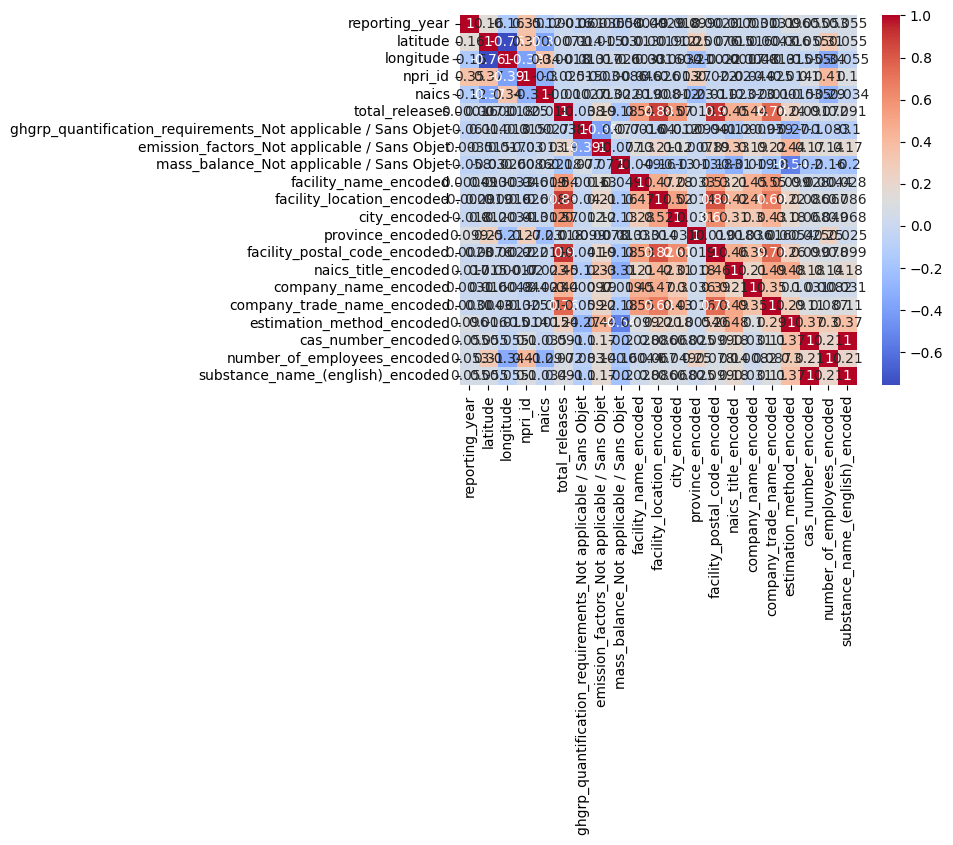

In [146]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [147]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [148]:
selected_columns = merged_df.columns[columns]
selected_columns.shape

(19,)

In [149]:
merged_df_pvalue = merged_df[selected_columns]

In [150]:
merged_df_pvalue.head(5)

reporting_year  latitude  longitude   npri_id     naics  total_releases  \
0     2022-01-01 -0.341271   1.412580 -1.140738  2.830433       -0.219612   
1     2022-01-01 -0.226320   1.302283 -1.140738  0.342058       -0.143690   
2     2022-01-01  0.032330  -0.435911 -1.140738  2.042773        1.830910   
3     2022-01-01 -1.074625   1.050105 -0.564221 -0.704691       -0.383390   
4     2022-01-01  0.801463  -0.759178 -0.927332  0.375243        7.332916   

   ghgrp_quantification_requirements_Not applicable / Sans Objet  \
0                                           0.042931               
1                                         -23.293334               
2                                           0.042931               
3                                         -23.293334               
4                                         -23.293334               

   emission_factors_Not applicable / Sans Objet  \
0                                     -0.070560   
1                                     14.172413   
2                                     -0.070560   
3                                     14.172413   
4                                     -0.070560   

   mass_balance_Not applicable / Sans Objet  facility_name_encoded  \
0                                  0.081156              -0.404261   
1                                  0.081156              -0.065763   
2                                  0.081156               2.622165   
3                                  0.081156               0.166893   
4                                -12.321978               0.188431   

   facility_location_encoded  city_encoded  province_encoded  \
0                  -0.249288     -0.385184         -0.873738   
1                  -0.163107     -0.016317         -0.873738   
2                  -0.035102      0.357260          0.992855   
3                   0.863994     -0.008881         -0.569991   
4                   8.399674     -0.033675          0.992855   

   naics_title_encoded  company_name_encoded  company_trade_name_encoded  \
0             0.515416             -0.104764                   -0.045011   
1            -0.070506             -0.081772                    0.077159   
2             7.876046              0.249943                    1.834127   
3            14.245916             -0.404205                   -0.045011   
4             8.771772              0.395741                    4.453922   

   estimation_method_encoded  cas_number_encoded  number_of_employees_encoded  
0                   6.072269            2.437587                     1.922133  
1                   6.072269            2.437587                     1.922133  
2                   7.833165            2.437587                     1.922133  
3                   6.072269            2.437587                     1.922133  
4                   6.072269            2.437587                     1.922133

In [151]:
merged_df_pvalue.dtypes

reporting_year                                                   datetime64[ns]
latitude                                                                float64
longitude                                                               float64
npri_id                                                                 float64
naics                                                                   float64
total_releases                                                          float64
ghgrp_quantification_requirements_Not applicable / Sans Objet           float64
emission_factors_Not applicable / Sans Objet                            float64
mass_balance_Not applicable / Sans Objet                                float64
facility_name_encoded                                                   float64
facility_location_encoded                                               float64
city_encoded                                                            float64
province_encoded                                                        float64
naics_title_encoded                                                     float64
company_name_encoded                                                    float64
company_trade_name_encoded                                              float64
estimation_method_encoded                                               float64
cas_number_encoded                                                      float64
number_of_employees_encoded                                             float64
dtype: object

In [152]:
merged_df_pvalue['reporting_year'] = merged_df_pvalue['reporting_year'].astype(int)

<ipython-input-152-7b9e2c8938ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_pvalue['reporting_year'] = merged_df_pvalue['reporting_year'].astype(int)


selecting based on p value

In [153]:
#dropping the total_releases column as it is target variable
#this is the last column in the dataframe
selected_columns = selected_columns[: -1].values

In [154]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = OLS(Y, sm.add_constant(x)).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)

    regressor_OLS.summary()
    return x, columns

In [155]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(merged_df_pvalue.iloc[:, 1:].values, merged_df_pvalue.iloc[:, -1].values, SL, selected_columns)

In [156]:
df_selected_by_pvalue = pd.DataFrame(data = data_modeled, columns=selected_columns)
df_selected_by_pvalue['total_releases'] = merged_df_pvalue.iloc[:, -1].values
df_selected_by_pvalue['reporting_year'] = pd.to_datetime(merged_df_pvalue.iloc[:, 0].values)

In [157]:
df_selected_by_pvalue.head(5)

reporting_year  latitude  longitude   npri_id     naics  total_releases  \
0     2022-01-01  1.412580  -1.140738  2.830433 -0.219612        1.922133   
1     2022-01-01  1.302283  -1.140738  0.342058 -0.143690        1.922133   
2     2022-01-01 -0.435911  -1.140738  2.042773  1.830910        1.922133   
3     2022-01-01  1.050105  -0.564221 -0.704691 -0.383390        1.922133   
4     2022-01-01 -0.759178  -0.927332  0.375243  7.332916        1.922133   

   ghgrp_quantification_requirements_Not applicable / Sans Objet  \
0                                          -0.070560               
1                                          14.172413               
2                                          -0.070560               
3                                          14.172413               
4                                          -0.070560               

   emission_factors_Not applicable / Sans Objet  \
0                                      0.081156   
1                                      0.081156   
2                                      0.081156   
3                                      0.081156   
4                                    -12.321978   

   mass_balance_Not applicable / Sans Objet  facility_name_encoded  \
0                                 -0.404261              -0.249288   
1                                 -0.065763              -0.163107   
2                                  2.622165              -0.035102   
3                                  0.166893               0.863994   
4                                  0.188431               8.399674   

   facility_location_encoded  city_encoded  province_encoded  \
0                  -0.385184     -0.873738          0.515416   
1                  -0.016317     -0.873738         -0.070506   
2                   0.357260      0.992855          7.876046   
3                  -0.008881     -0.569991         14.245916   
4                  -0.033675      0.992855          8.771772   

   naics_title_encoded  company_name_encoded  company_trade_name_encoded  \
0            -0.104764             -0.045011                    6.072269   
1            -0.081772              0.077159                    6.072269   
2             0.249943              1.834127                    7.833165   
3            -0.404205             -0.045011                    6.072269   
4             0.395741              4.453922                    6.072269   

   estimation_method_encoded  cas_number_encoded  
0                   2.437587            1.922133  
1                   2.437587            1.922133  
2                   2.437587            1.922133  
3                   2.437587            1.922133  
4                   2.437587            1.922133

In [158]:
df_selected_by_pvalue.shape

(718612, 18)

Pearson Correlation

In [159]:
def correlation(df, threshold):
    df = merged_df.copy()
    col_corr = set()  # For storing unique value
    correlation_matrix = merged_df_pearson.corr(method='pearson')
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: # absolute values to handle positive and negative correlations
                colname = correlation_matrix.columns[i]
                col_corr.add(colname)

    df.drop(col_corr,axis = 1,inplace = True)
    return df

In [160]:
#creating copy of the dataframe
merged_df_pearson = merged_df.copy()

#setting threshold to 0.9 which is industry standard
threshold = 0.9

#creating a new dataframe to store selected features
df_selected_by_pearson = correlation(merged_df_pearson, threshold)

In [161]:
df_selected_by_pearson.head()

reporting_year  latitude  longitude   npri_id     naics  total_releases  \
0     2022-01-01 -0.341271   1.412580 -1.140738  2.830433       -0.219612   
1     2022-01-01 -0.226320   1.302283 -1.140738  0.342058       -0.143690   
2     2022-01-01  0.032330  -0.435911 -1.140738  2.042773        1.830910   
3     2022-01-01 -1.074625   1.050105 -0.564221 -0.704691       -0.383390   
4     2022-01-01  0.801463  -0.759178 -0.927332  0.375243        7.332916   

   ghgrp_quantification_requirements_Not applicable / Sans Objet  \
0                                           0.042931               
1                                         -23.293334               
2                                           0.042931               
3                                         -23.293334               
4                                         -23.293334               

   emission_factors_Not applicable / Sans Objet  \
0                                     -0.070560   
1                                     14.172413   
2                                     -0.070560   
3                                     14.172413   
4                                     -0.070560   

   mass_balance_Not applicable / Sans Objet  facility_name_encoded  \
0                                  0.081156              -0.404261   
1                                  0.081156              -0.065763   
2                                  0.081156               2.622165   
3                                  0.081156               0.166893   
4                                -12.321978               0.188431   

   facility_location_encoded  city_encoded  province_encoded  \
0                  -0.249288     -0.385184         -0.873738   
1                  -0.163107     -0.016317         -0.873738   
2                  -0.035102      0.357260          0.992855   
3                   0.863994     -0.008881         -0.569991   
4                   8.399674     -0.033675          0.992855   

   naics_title_encoded  company_name_encoded  company_trade_name_encoded  \
0             0.515416             -0.104764                   -0.045011   
1            -0.070506             -0.081772                    0.077159   
2             7.876046              0.249943                    1.834127   
3            14.245916             -0.404205                   -0.045011   
4             8.771772              0.395741                    4.453922   

   estimation_method_encoded  cas_number_encoded  number_of_employees_encoded  
0                   6.072269            2.437587                     1.922133  
1                   6.072269            2.437587                     1.922133  
2                   7.833165            2.437587                     1.922133  
3                   6.072269            2.437587                     1.922133  
4                   6.072269            2.437587                     1.922133

In [162]:
df_selected_by_pearson.shape

(718612, 19)